In [1]:
# import necessary libraries

import torch
from torch import nn
from torchvision import transforms
import numpy as np
import matplotlib.pyplot as plt

In [2]:
# check the version of pytorch
torch.__version__

'2.4.1'

In [3]:
%config InlineBackend.figure_format='retina'

In [4]:
# set the random seed
torch.manual_seed(316)

# 1. Build Network

In [5]:
# Use smae architecture with trained model 

class Network(nn.Module):
    def __init__(self):
        super().__init__()

        self.fc1 = nn.Linear(784, 512)
        self.fc2 = nn.Linear(512, 10)
        self.relu = nn.ReLU()

    def forward(self, x):
        x = x.view(-1, 28 * 28)
        out = self.relu(self.fc1(x))
        out = self.fc2(out)

        return out

model = Network()
print(model)

Network(
  (fc1): Linear(in_features=784, out_features=512, bias=True)
  (fc2): Linear(in_features=512, out_features=10, bias=True)
  (relu): ReLU()
)


# 2. Use trained model's weight

In [6]:
# set the file name that contain the weights
file_name = "model_state_dict.pth"

# load the weight and apply to the Neural Network
model.load_state_dict(torch.load(file_name, map_location = torch.device("cpu")))

# set model to evaluation mode
model.eval()

/var/folders/12/d4mjw2q15bl70mzs4czmwlwm0000gn/T/ipykernel_52863/2706242919.py:5: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  model.load_state_dict(torch.load(file_name, m

Network(
  (fc1): Linear(in_features=784, out_features=512, bias=True)
  (fc2): Linear(in_features=512, out_features=10, bias=True)
  (relu): ReLU()
)

# 3. Check GPU state

In [7]:
torch.cuda.is_available()

False

In [8]:
torch.cuda.device_count()

0

In [9]:
if torch.cuda.is_available():
    print(torch.cuda.current_device())

In [10]:
if torch.cuda.is_available():
    print(torch.cuda.get_device_name(0))

In [11]:
device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")
device

device(type='cpu')

# 4. Load images and labels

## 4-1. Load images and labels

In [12]:
import os
from PIL import Image

# set the folder's path
folder_path = "./originals"

# get the name of image files as list
image_names = [file for file in os.listdir(folder_path) if file.endswith(('.jpg', '.png'))]

# check the file lists
image_names

['7_ eunseo.png',
 '4_chosb.png',
 '6_jiwon.png',
 '0_hchoi.png',
 '8_jiwon2.png',
 '9_chosb.png',
 '6_hwangss.png',
 '1_jisu.png',
 '0_jisu.png',
 '5_jiwon2.png',
 '3_joohwan.png',
 '3_hwangss.png',
 '0_jiwon.png',
 '0_jiwon2.png',
 '2_chosb.png',
 '6_joohwan.png',
 '6_hchoi.png',
 '2_ eunseo.png',
 '1_hchoi.png',
 '5_chosb.png',
 '7_jiwon.png',
 '1_ eunseo.png',
 '9_hwangss.png',
 '7_jiwon2.png',
 '8_chosb.png',
 '5_joohwan.png',
 '8_ eunseo.png',
 '0_hwangss.png',
 '0_joohwan.png',
 '2_jiwon2.png',
 '7_hchoi.png',
 '5_hwangss.png',
 '1_jiwon.png',
 '3_chosb.png',
 '9_joohwan.png',
 '6_jisu.png',
 '7_jisu.png',
 '4_ eunseo.png',
 '6_chosb.png',
 '4_jiwon.png',
 '3_ eunseo.png',
 '1_jiwon2.png',
 '2_hchoi.png',
 '7_joohwan.png',
 '9_jiwon.png',
 '2_hwangss.png',
 '2_jiwon.png',
 '0_chosb.png',
 '4_hchoi.png',
 '2_jisu.png',
 '3_jisu.png',
 '2_joohwan.png',
 '7_hwangss.png',
 '9_jiwon2.png',
 '8_jisu.png',
 '9_jisu.png',
 '9_hchoi.png',
 '4_jiwon2.png',
 '6_ eunseo.png',
 '5_jisu.png',

In [13]:
# get the labels of inputs
# file format : '0_jiwon.png'
labels = [int(file.split('_')[0]) for file in image_names]

# check the labels
labels

[7,
 4,
 6,
 0,
 8,
 9,
 6,
 1,
 0,
 5,
 3,
 3,
 0,
 0,
 2,
 6,
 6,
 2,
 1,
 5,
 7,
 1,
 9,
 7,
 8,
 5,
 8,
 0,
 0,
 2,
 7,
 5,
 1,
 3,
 9,
 6,
 7,
 4,
 6,
 4,
 3,
 1,
 2,
 7,
 9,
 2,
 2,
 0,
 4,
 2,
 3,
 2,
 7,
 9,
 8,
 9,
 9,
 4,
 6,
 5,
 4,
 3,
 5,
 8,
 3,
 7,
 5,
 4,
 1,
 8,
 5,
 9,
 3,
 1,
 1,
 4,
 6,
 0,
 8,
 8]

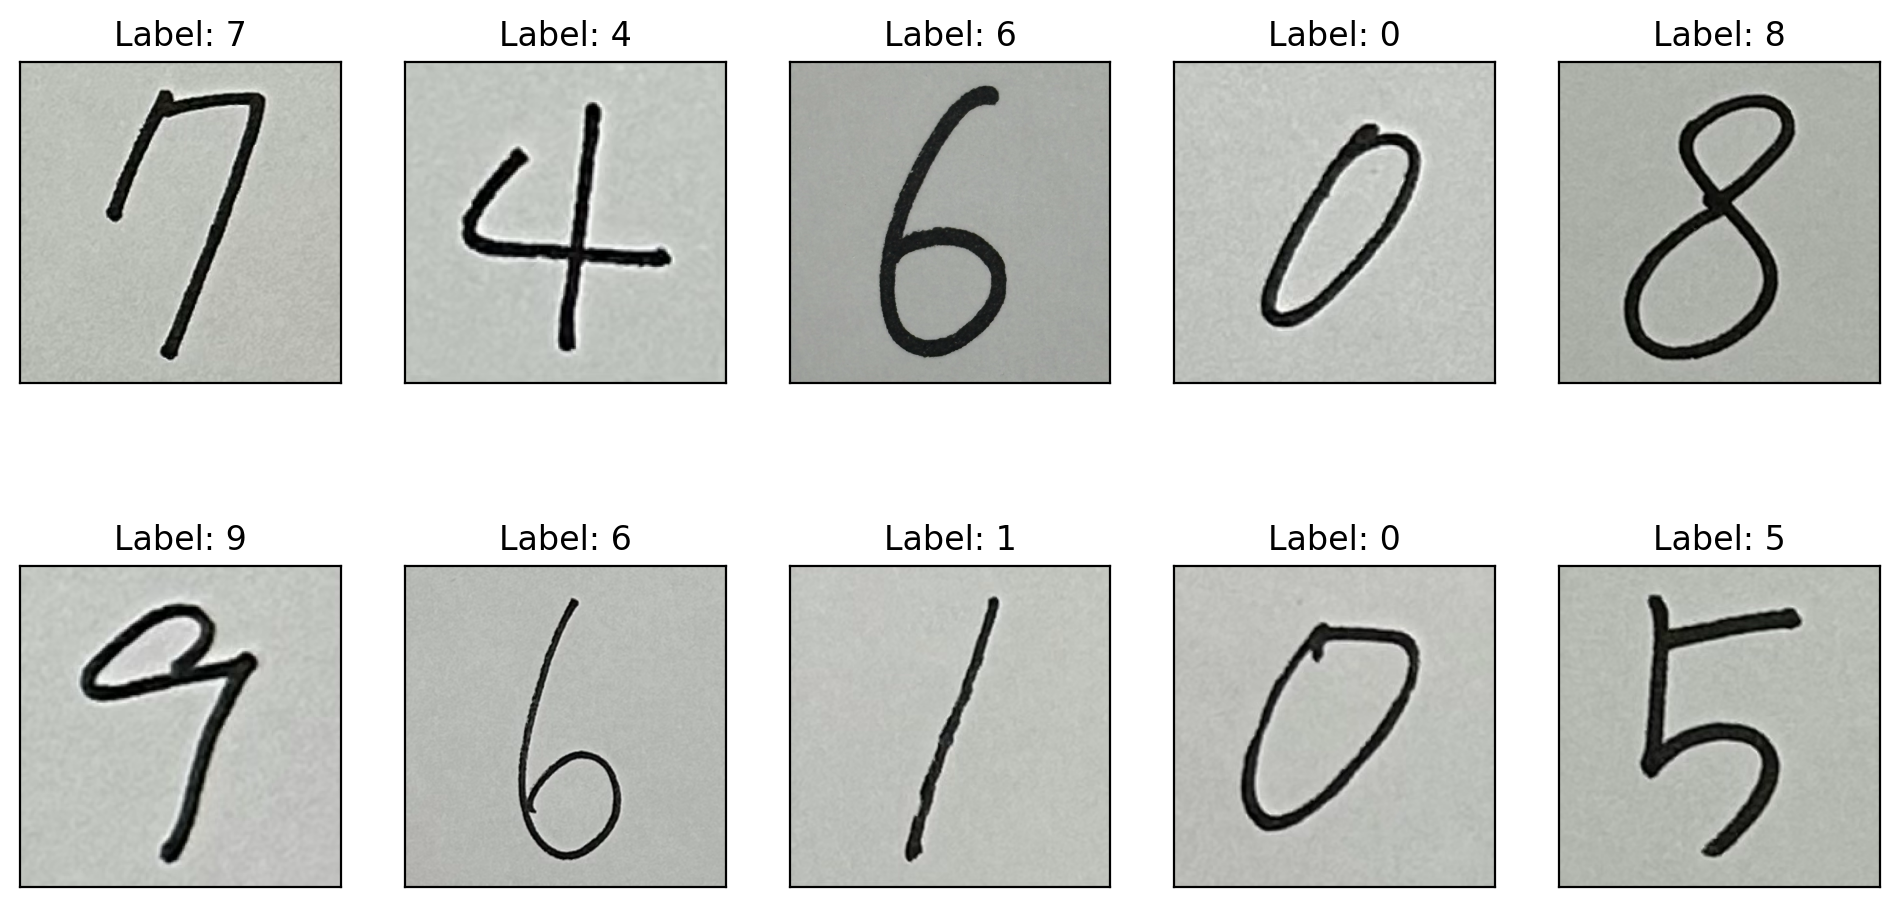

In [14]:
# plot the first 10 original images with labels
fig, ax = plt.subplots(ncols=5, nrows=2, figsize=(12,6))
ax = np.ravel(ax)

for index in range(10):
    image = Image.open(os.path.join(folder_path, image_names[index]))
    ax[index].imshow(image, cmap="gray")
    label = labels[index]
    ax[index].set_title(f"Label: {label}")
    ax[index].set_xticks([])
    ax[index].set_yticks([])

plt.show()

# 5. Preprocessing Images

In [15]:
# import necessary library
import cv2

In [16]:
# read image as grayscale and convert to binary image
def cvtToBinary(folder_path, filename):

    # read image as grayscale
    src = cv2.imread(folder_path + '/' + filename, cv2.IMREAD_GRAYSCALE)

    # 이미지 이진화 (threshold는 125를 사용)
    # 픽셀 값이 125보다 크면 0, 아니면 255의 값을 할당
    _, binary = cv2.threshold(src, 125, 255, cv2.THRESH_BINARY_INV)

    # remove noise in binary image
    binary = cv2.morphologyEx(binary , cv2.MORPH_OPEN , cv2.getStructuringElement(cv2.MORPH_ELLIPSE, (3,3)), iterations = 3)

    # return the final clear binary image
    return binary

# create the set of binary images
binaryImages = [cvtToBinary(folder_path, filename) for filename in image_names]

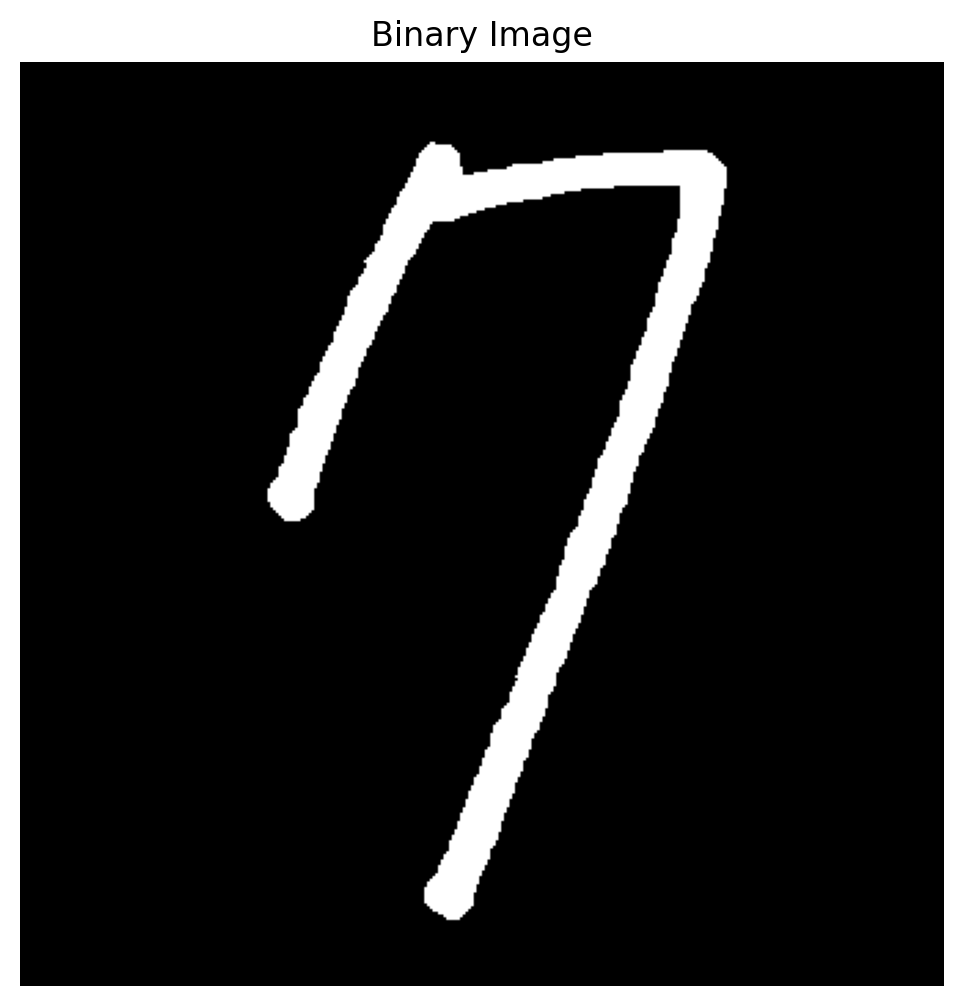

In [17]:
# check one result of binary image
plt.figure(figsize=(6, 6))
plt.imshow(binaryImages[0], cmap="gray")
plt.title("Binary Image")
plt.axis("off")
plt.show()

In [18]:
# resize the image to 28 * 28 image
# convert image to tensor image
transform = transforms.Compose(
    [
        transforms.Resize((28, 28)),
        transforms.ToTensor(),
    ]
)

# apply transform to binary images
inputs = [transform(Image.fromarray(image)) for image in binaryImages]

# list to tensor
inputs_tensor = torch.stack(inputs)

In [19]:
# Save the input images
from torchvision.transforms import ToPILImage
import os

# set the folder path(name)
input_folder_path = './inputs'

# create ToPILImage object
# 'input' is tensor, so it must be convert to PIL image
to_pil_image = ToPILImage()

for input, img_name in zip(inputs, image_names):
    # convert to PIL image and save in './inputs' folder
    img = to_pil_image(input)
    img.save(os.path.join(input_folder_path, img_name))

# 6. Inference

In [20]:
# send model, inputs_tensor and labels to device
model.to(device)
inputs_tensor = inputs_tensor.to(device)
labels = torch.tensor(labels, dtype=torch.long).to(device)

# lists for checking the results
correct_inputs = []    # 정답인 input 저장
fail_inputs = []        # 오답인 input 저장

correct_preds = []      # 정답의 예측값(라벨) 저장
fail_preds = []         # 오답으로 예측한 값 저장

correct_probs = []      # 정답 예측의 확률 저장
fail_probs = []         # 오답의 예측 확률 저장

with torch.no_grad():

    # model에 손글씨 이미지 전달
    outputs = model(inputs_tensor)

    # 모델의 예측을 확률로 바꿈
    probabilities = outputs.softmax(dim=1)

    # 모델이 가장 높은 확률로 예측한 값(확률, 해당 클래스) 구함
    top_probs, top_classes = probabilities.topk(k=1, dim=1)

    # 제대로 예측한 갯수 확인
    corrects = (top_classes.squeeze() == labels)
    corrects_cnt = int(corrects.squeeze().sum().item())

    # 정답 및 오답의 inputs을 각각 저장
    # 저장 시, 이미지의 차원 및 cpu와 numpy로 변환하여 저장함
    correct_inputs.extend(inputs_tensor.squeeze()[corrects].cpu().numpy())
    fail_inputs.extend(inputs_tensor.squeeze()[~corrects].cpu().numpy())

    # 모델이 최종적으로 예측한 라벨값 저장
    correct_preds.extend(top_classes.squeeze()[corrects].cpu().numpy())
    fail_preds.extend(top_classes.squeeze()[~corrects].cpu().numpy())

    # 모델이 각 입력마다 각 클래스에 대해 몇 퍼센트로 예측했는지에 대한 값 저장
    correct_probs.extend(probabilities[corrects].cpu().numpy())
    fail_probs.extend(probabilities[~corrects].cpu().numpy())

# 정확도 계산
accuracy = corrects_cnt / len(inputs_tensor) * 100.0

# 정확도 확인
print(accuracy)

80.0


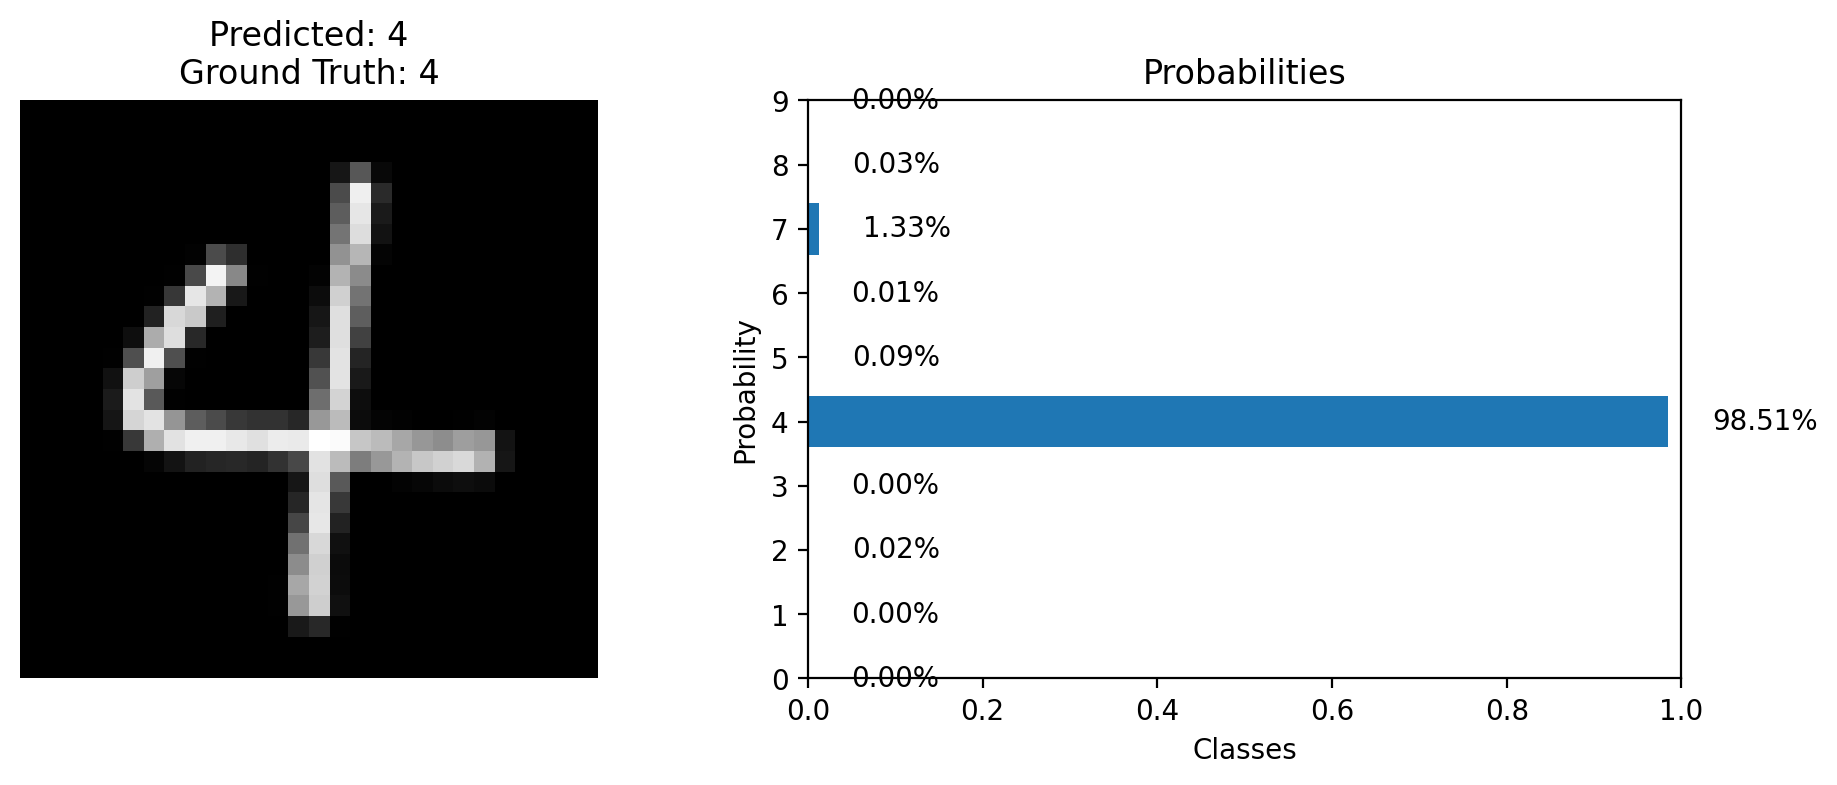

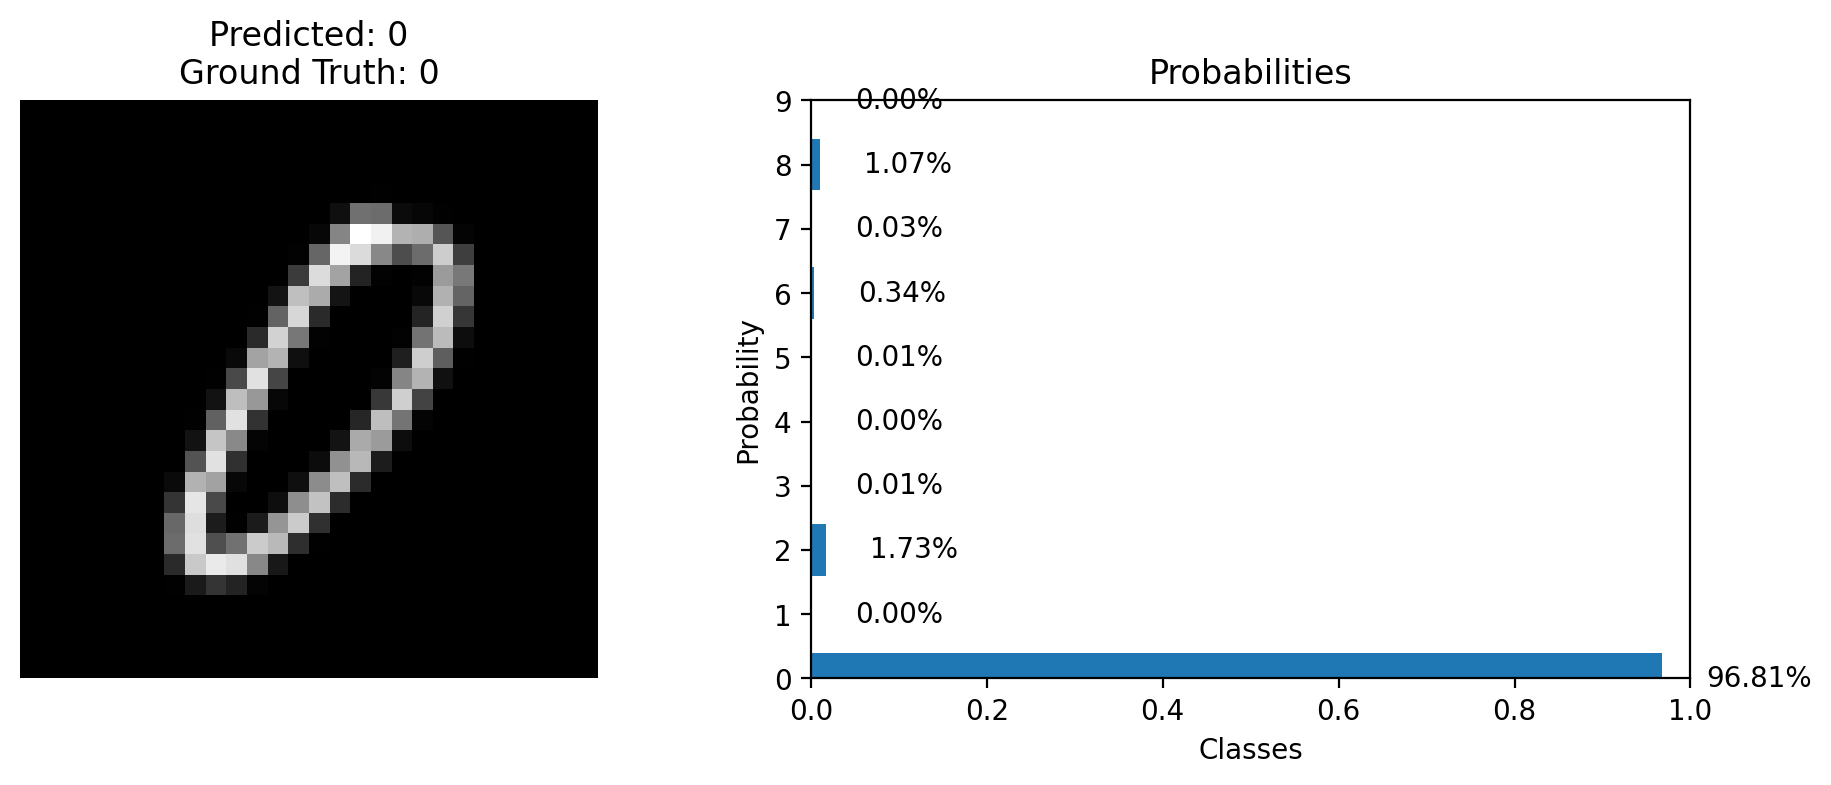

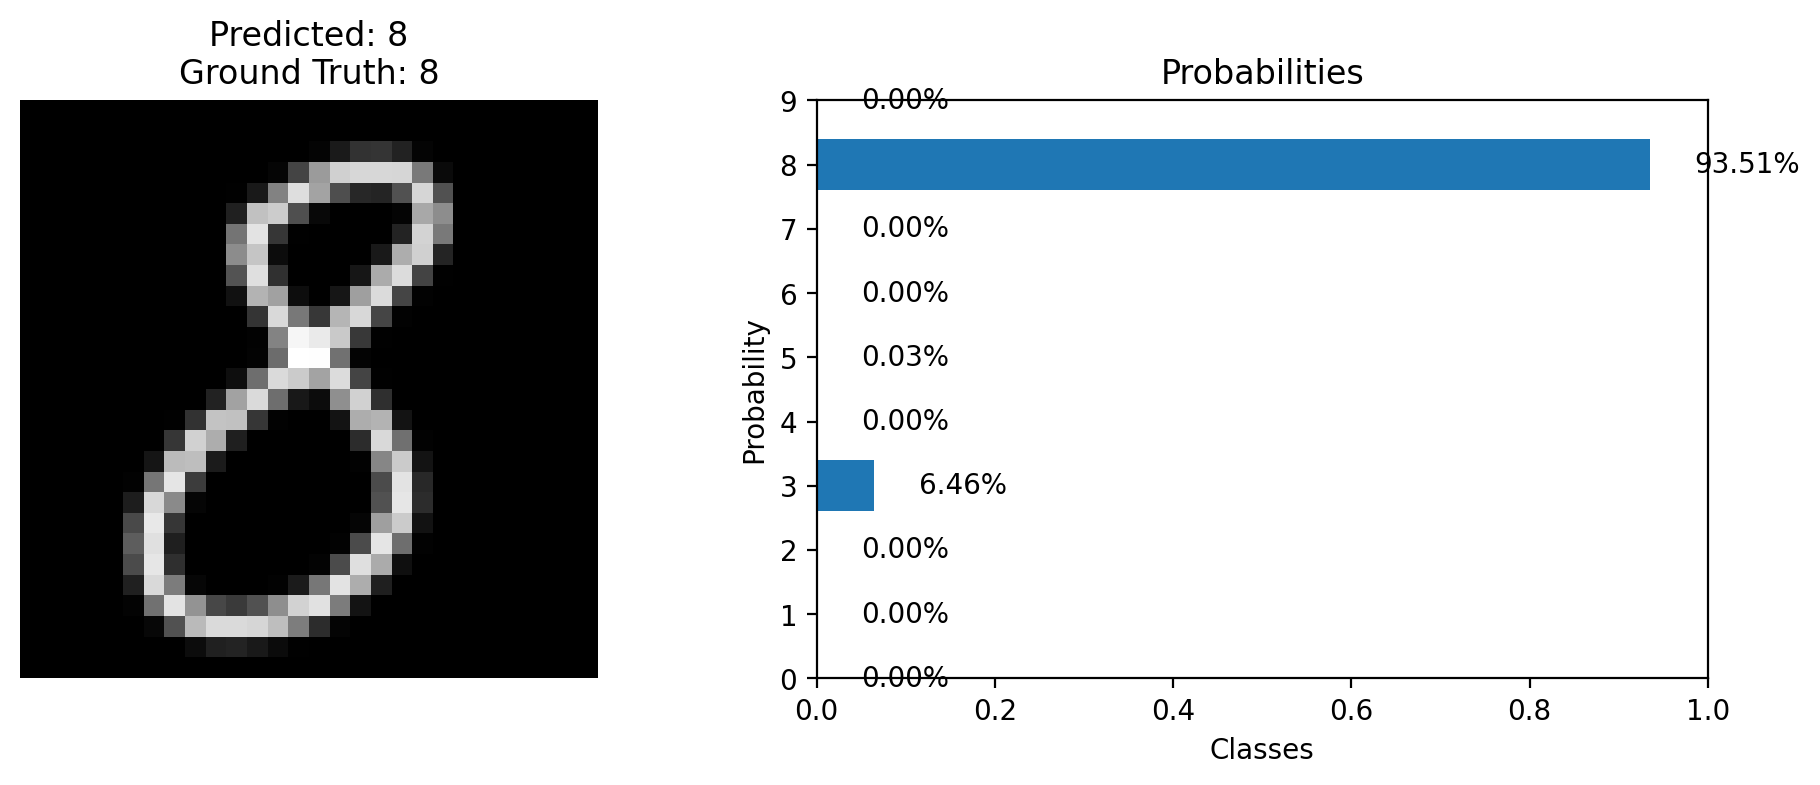

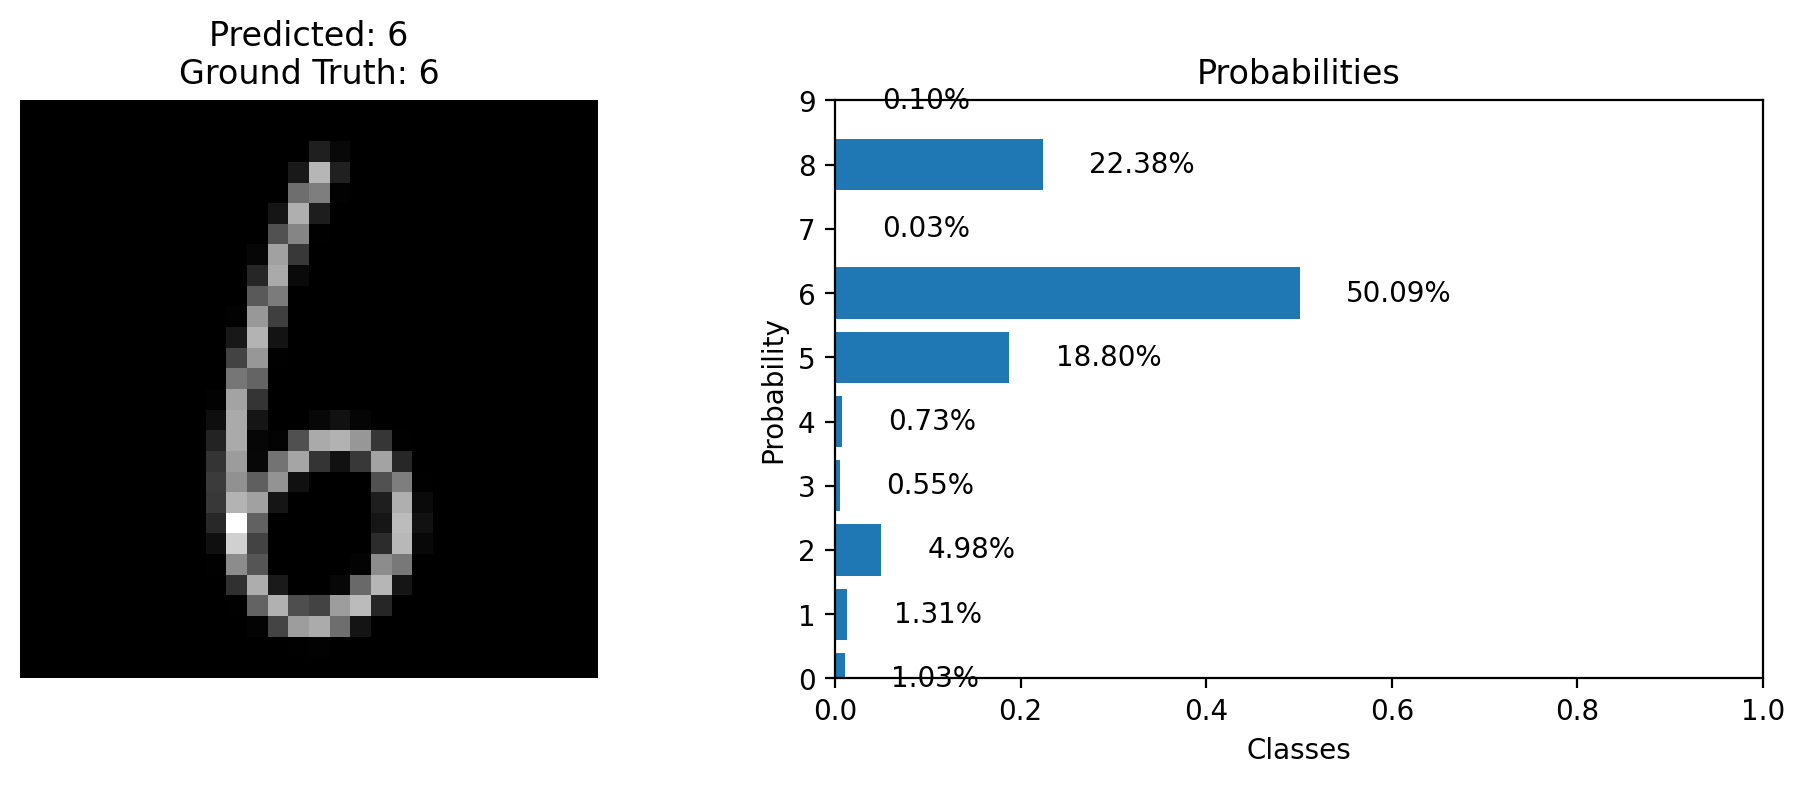

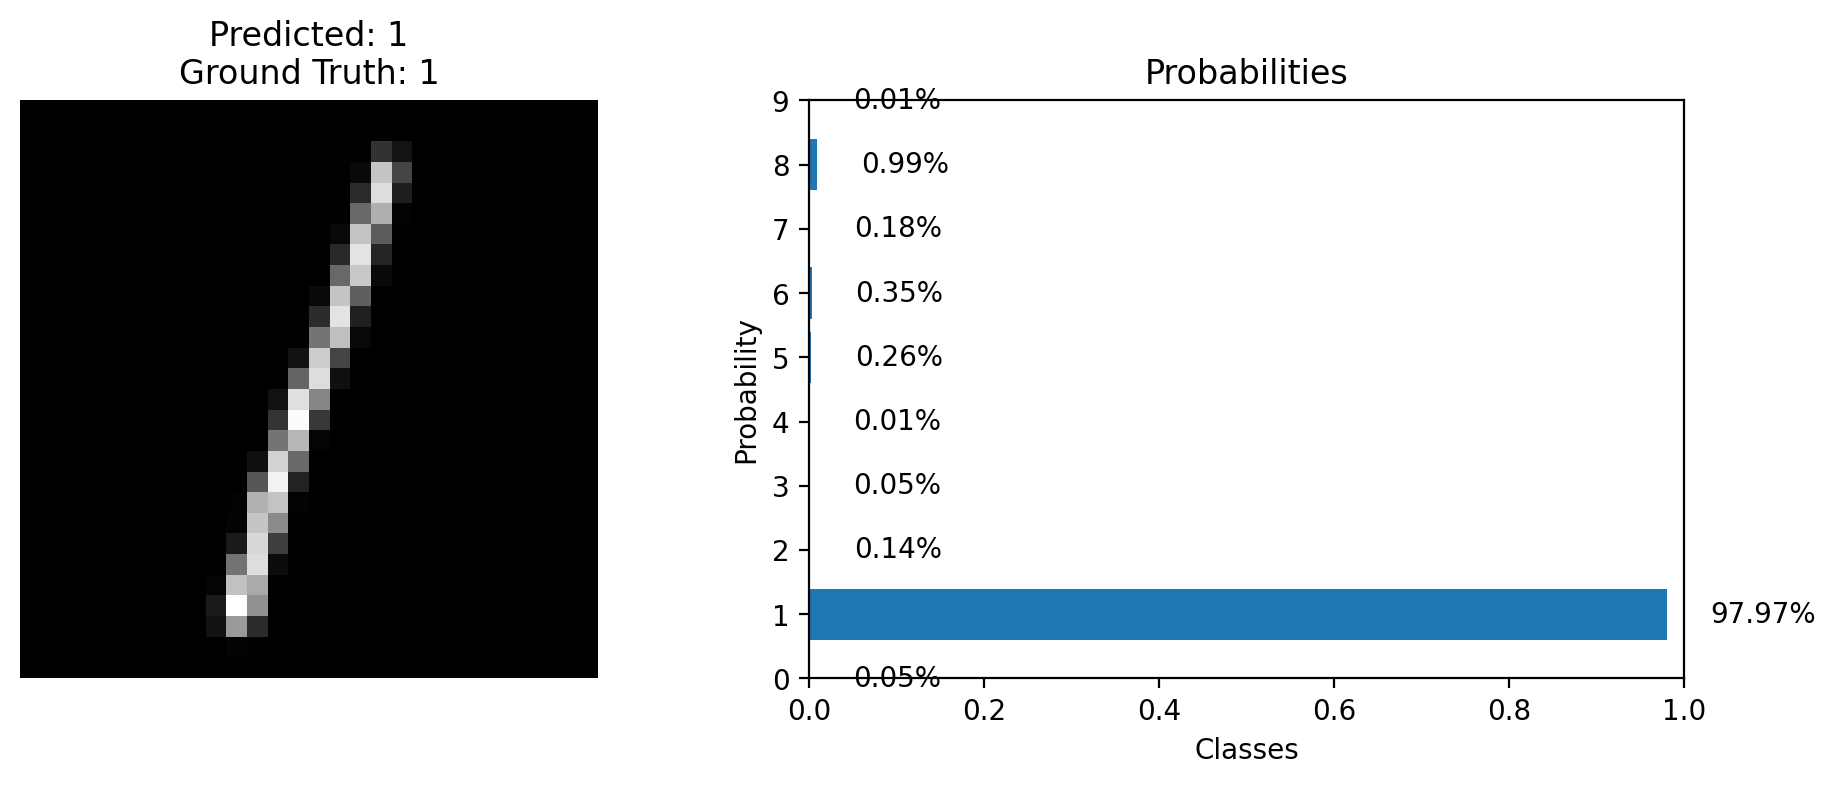

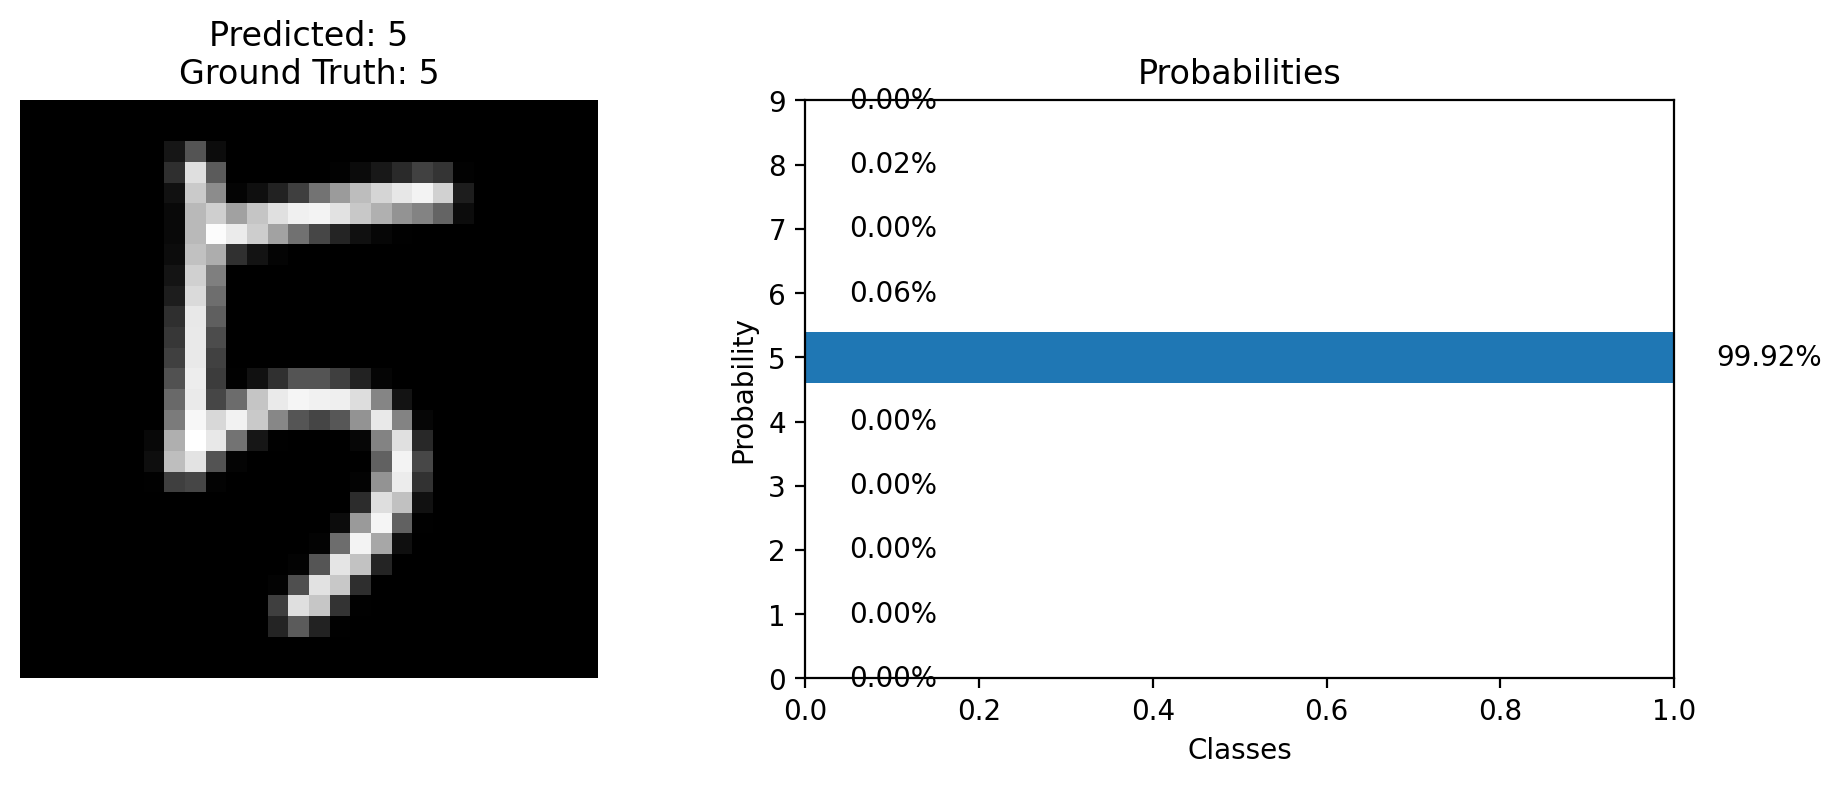

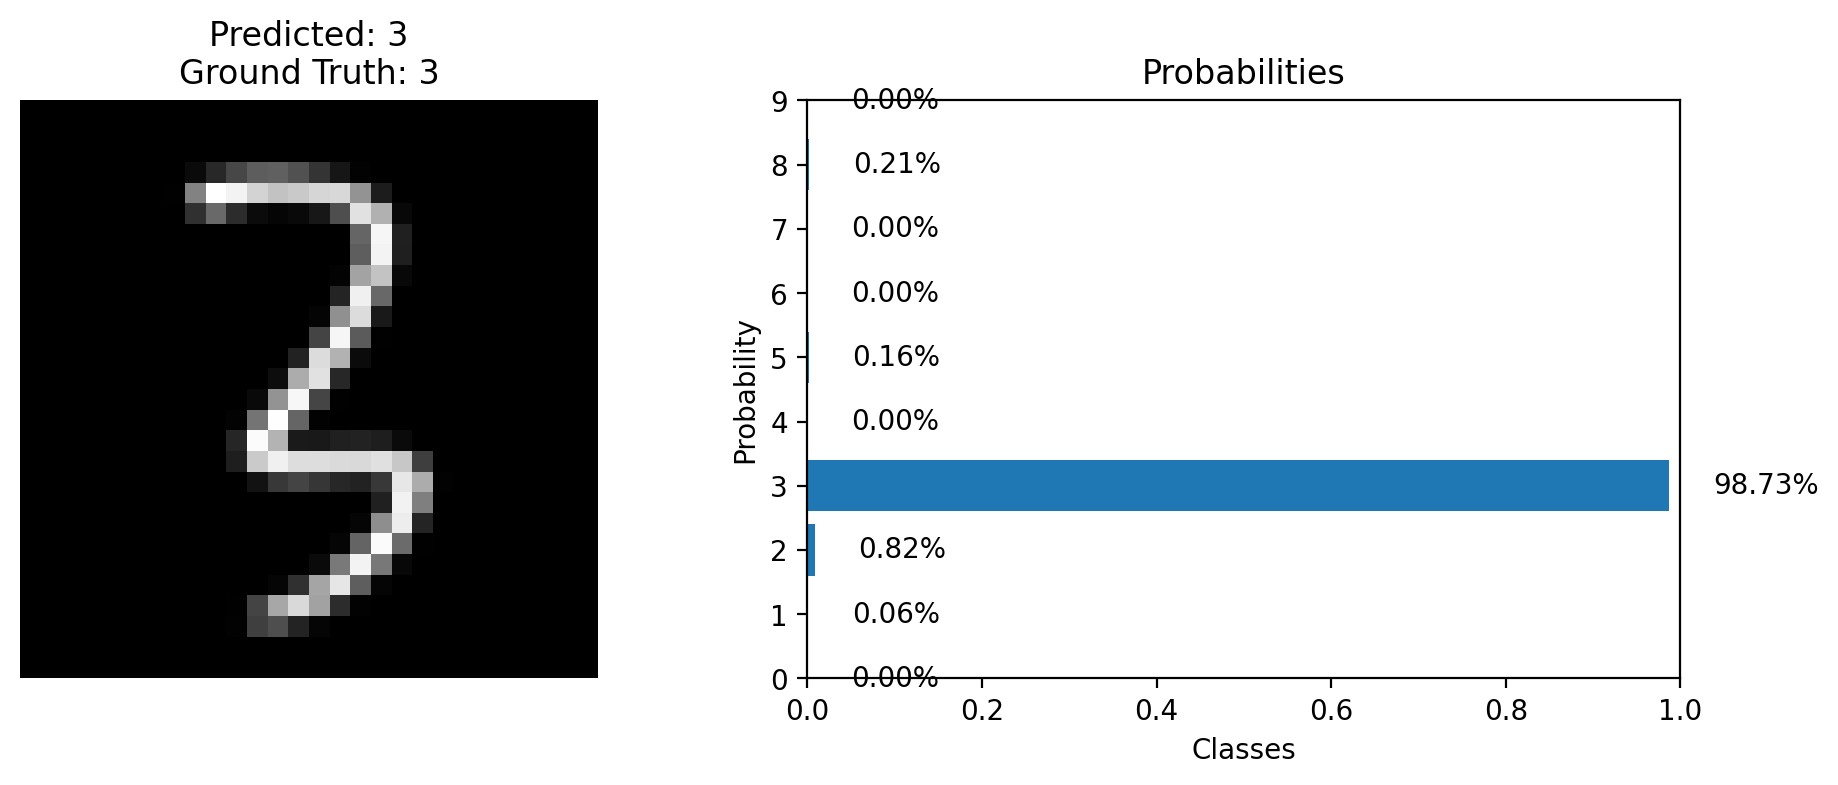

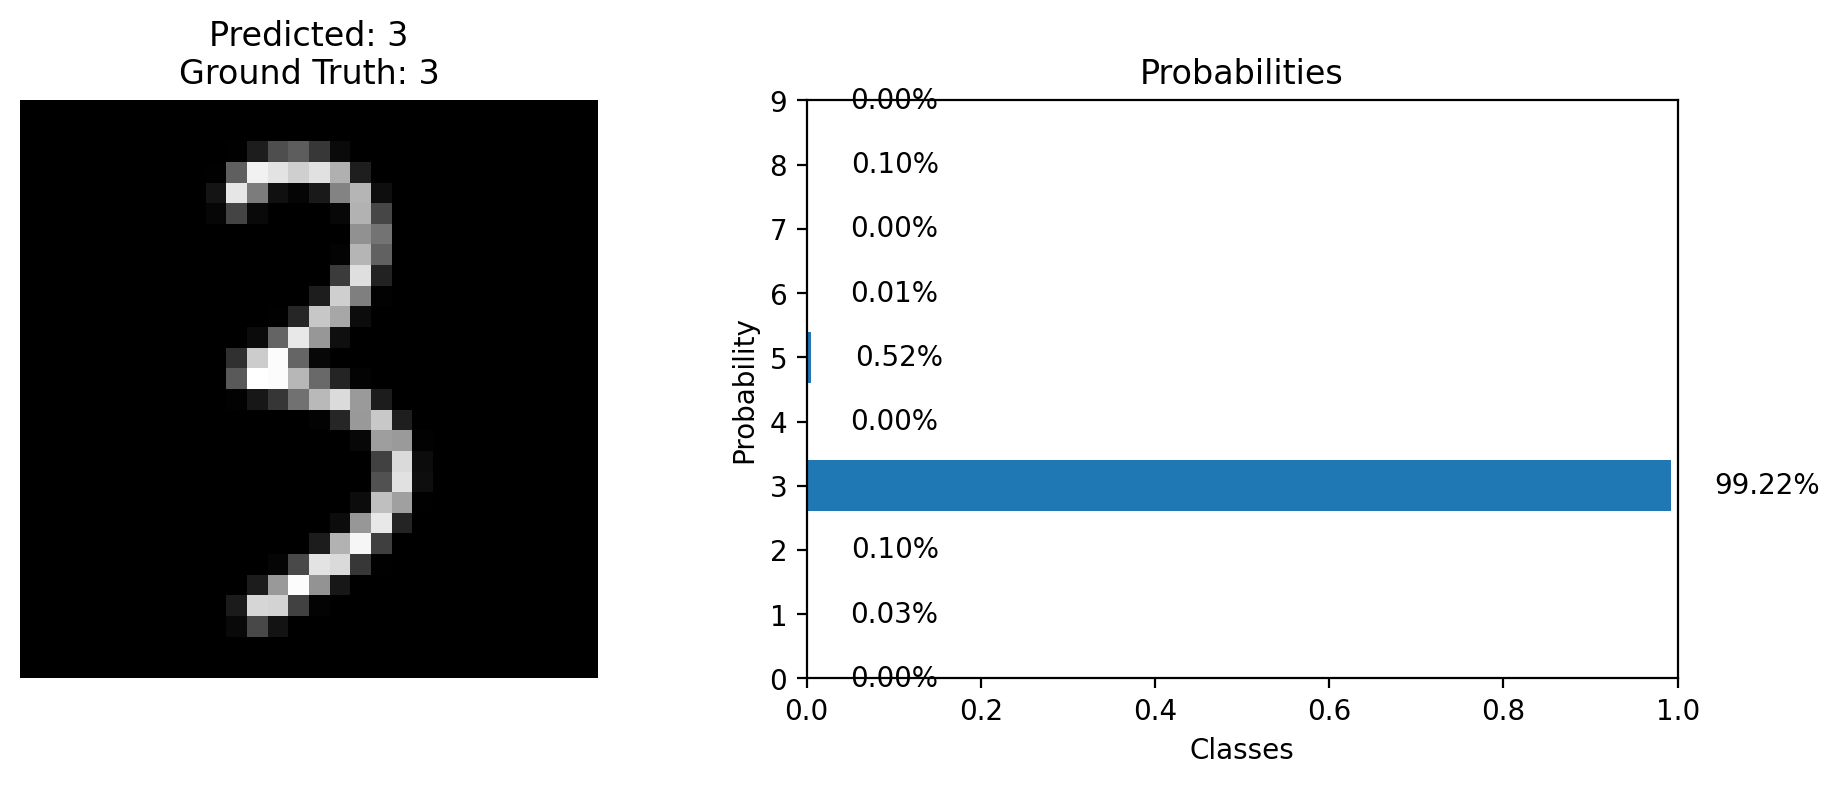

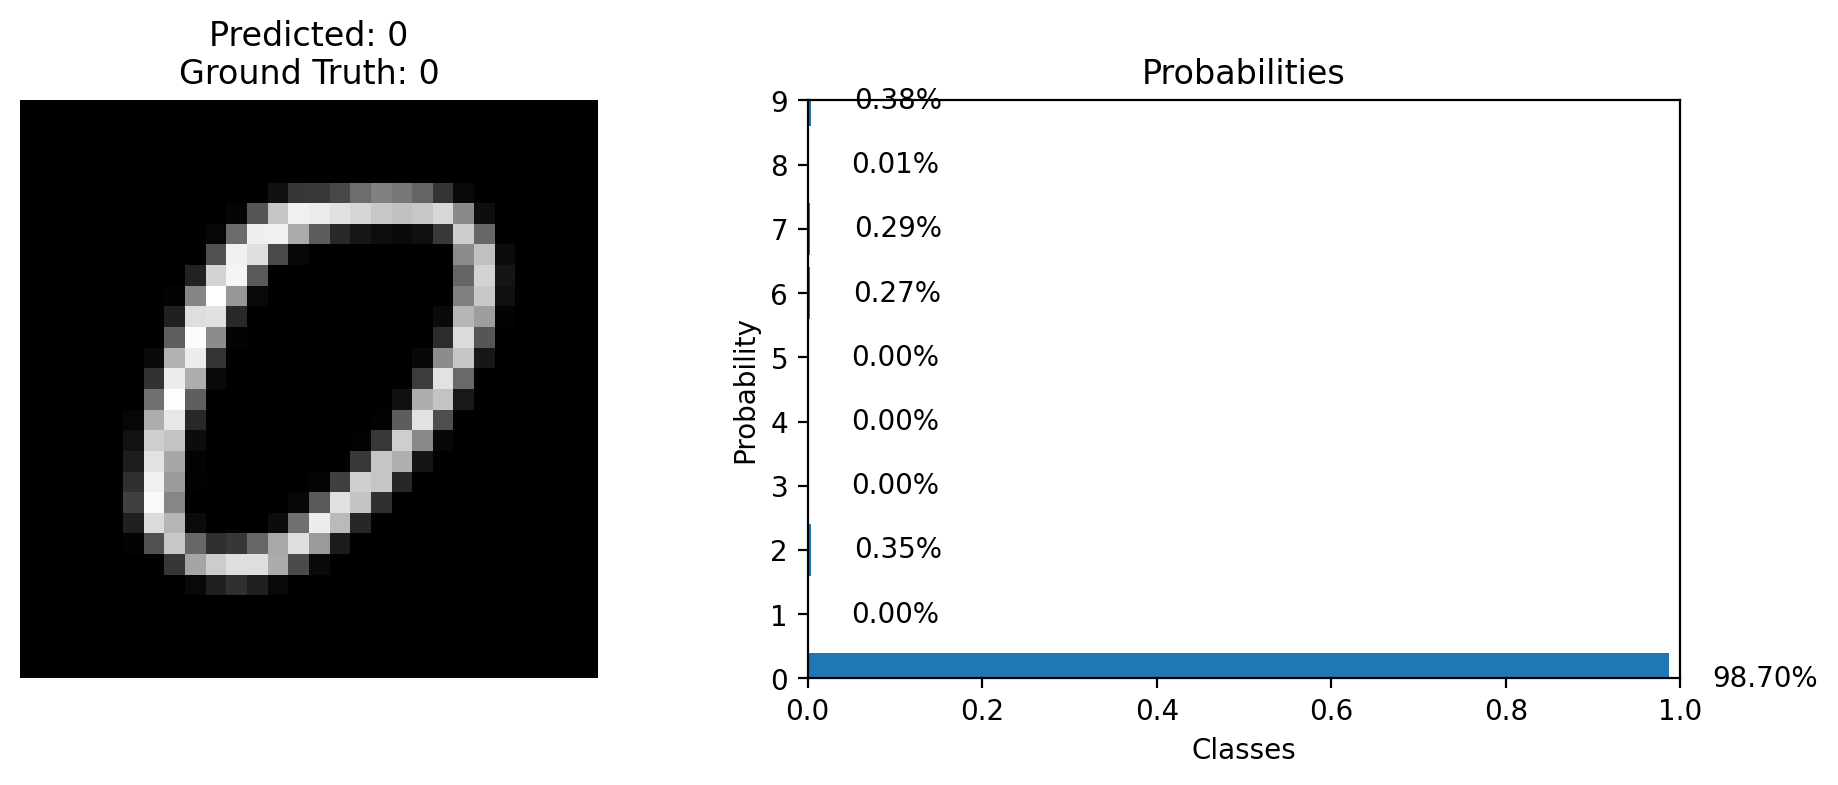

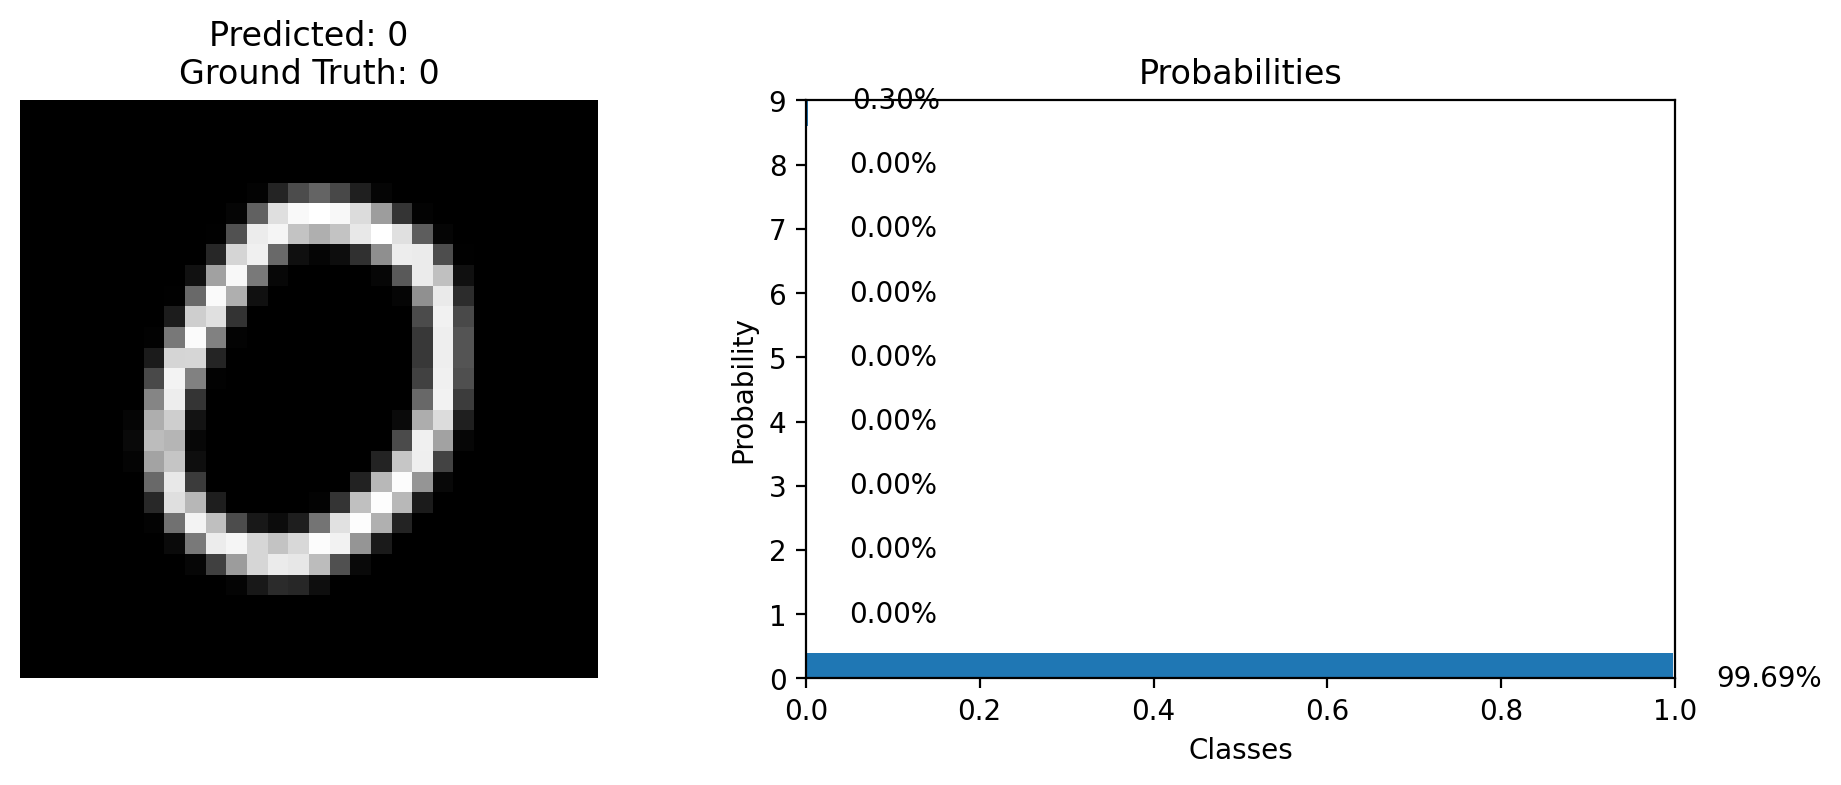

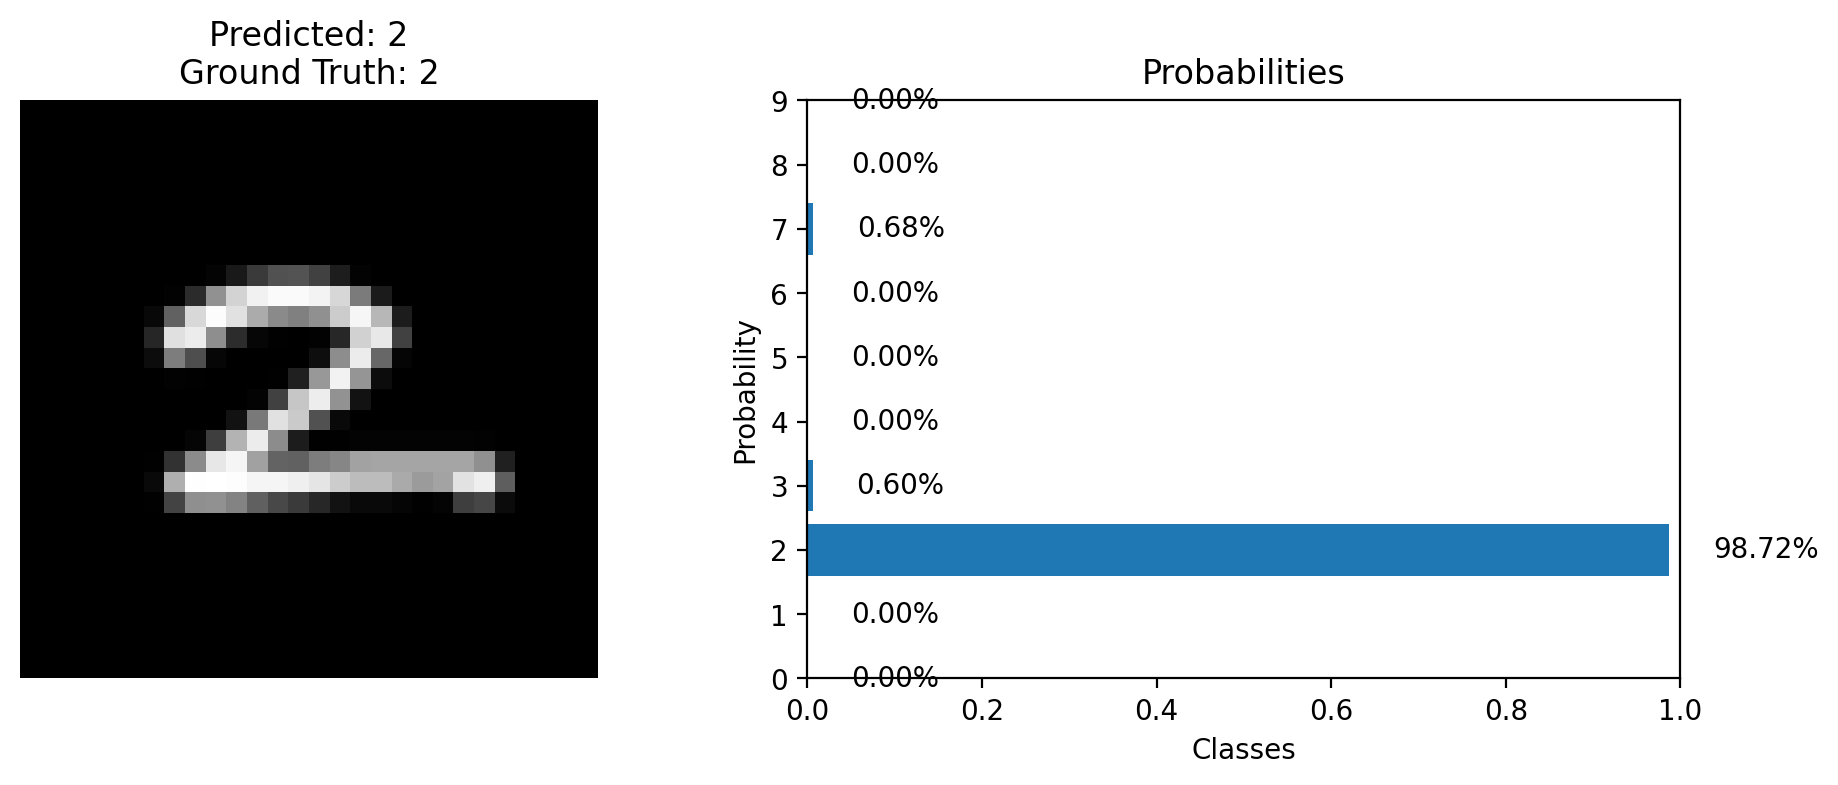

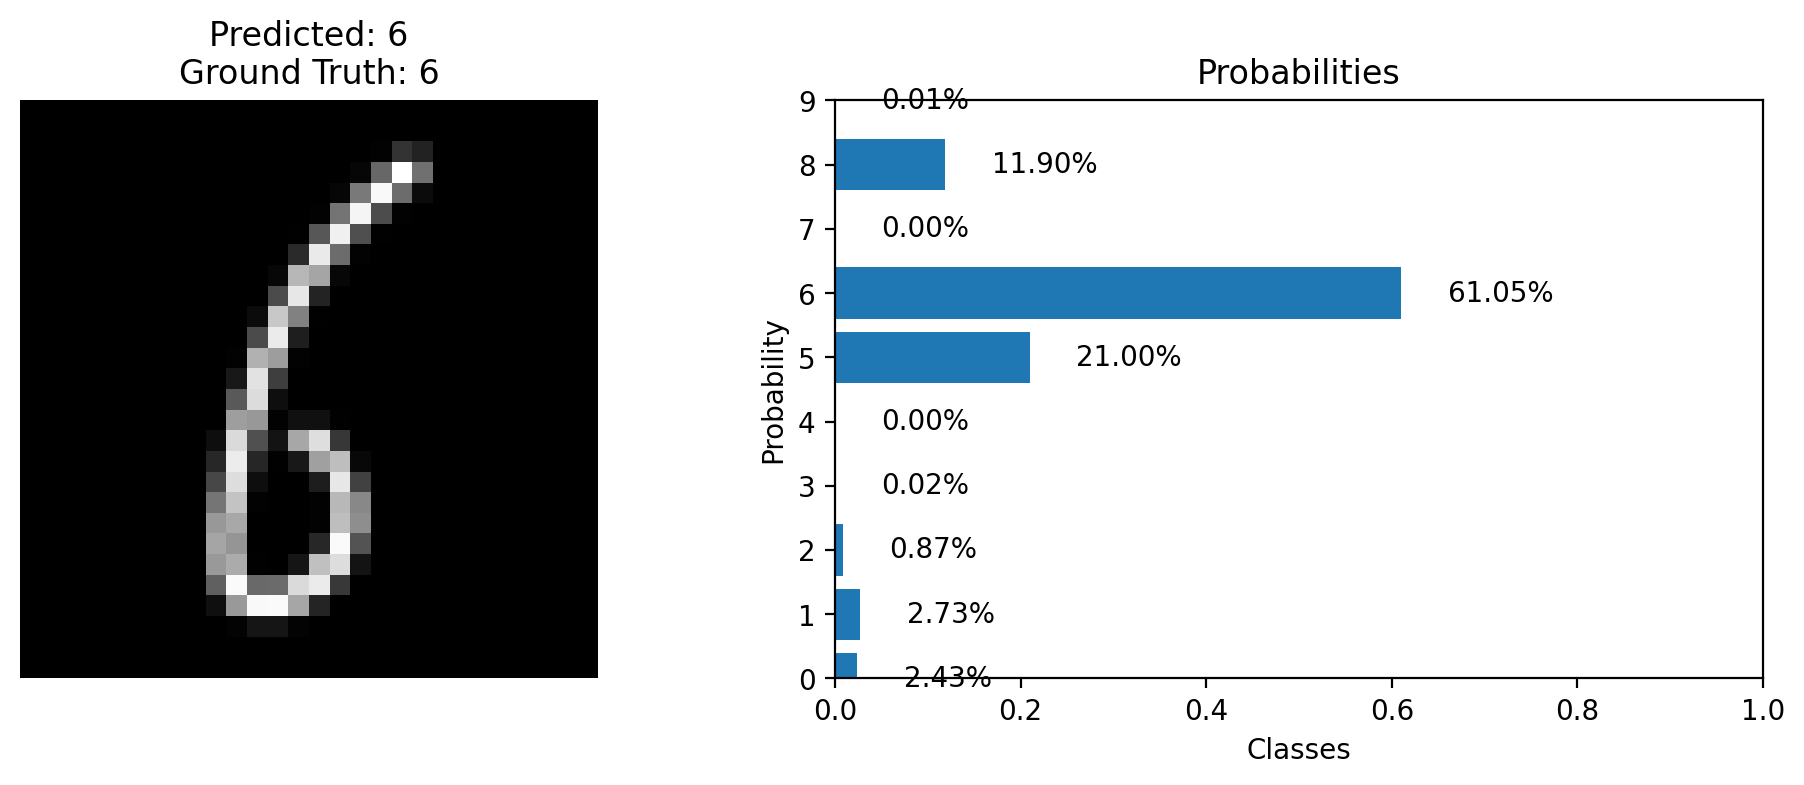

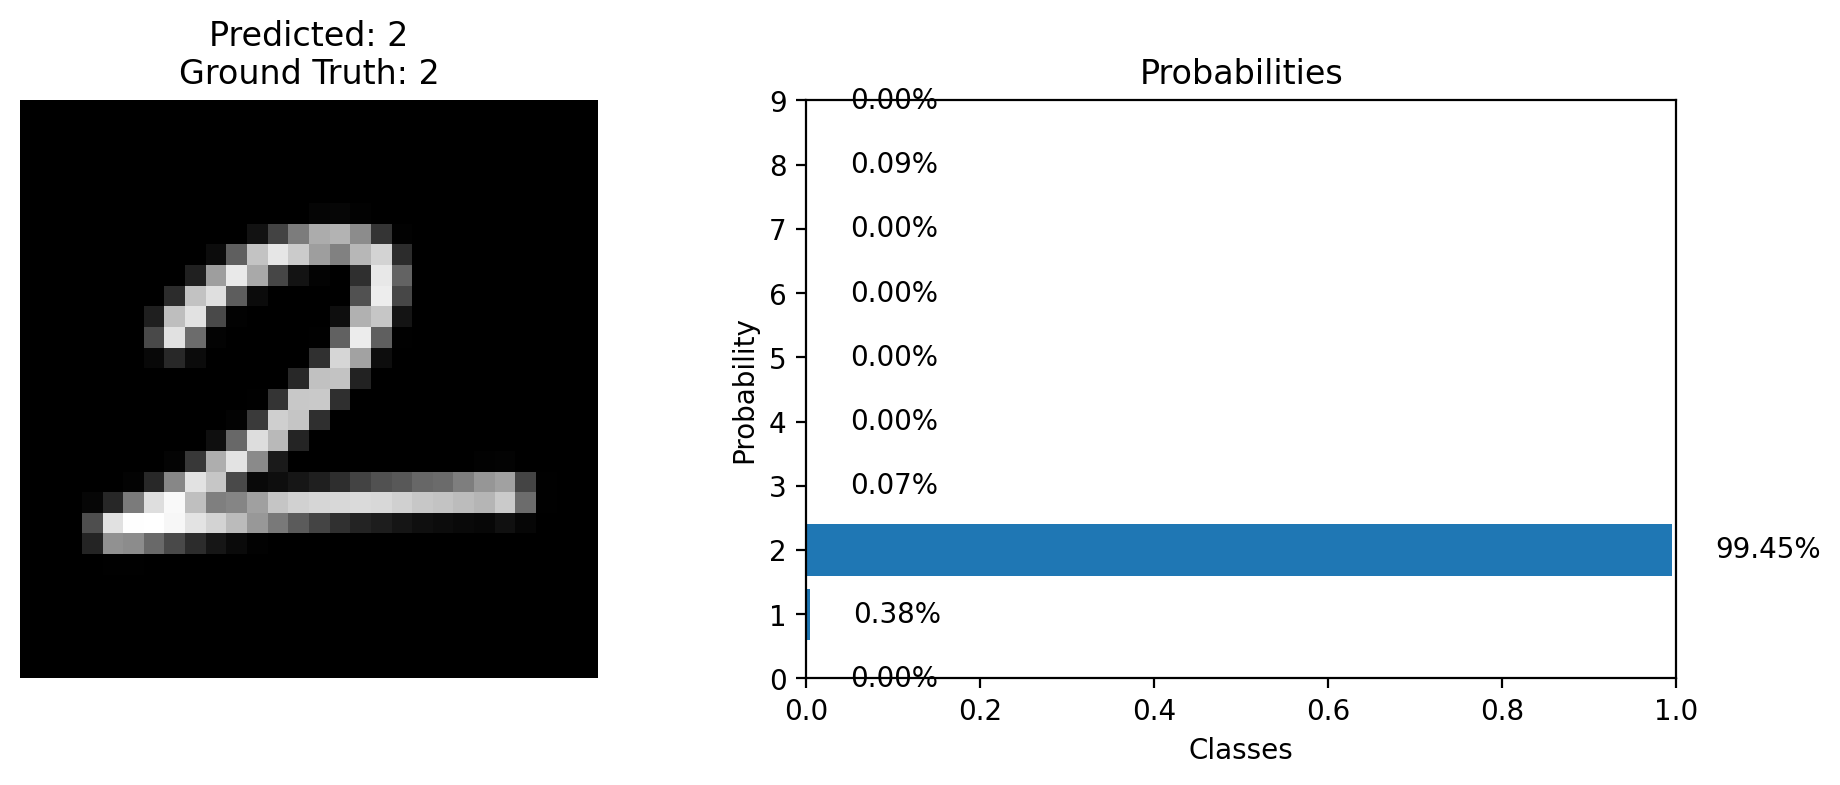

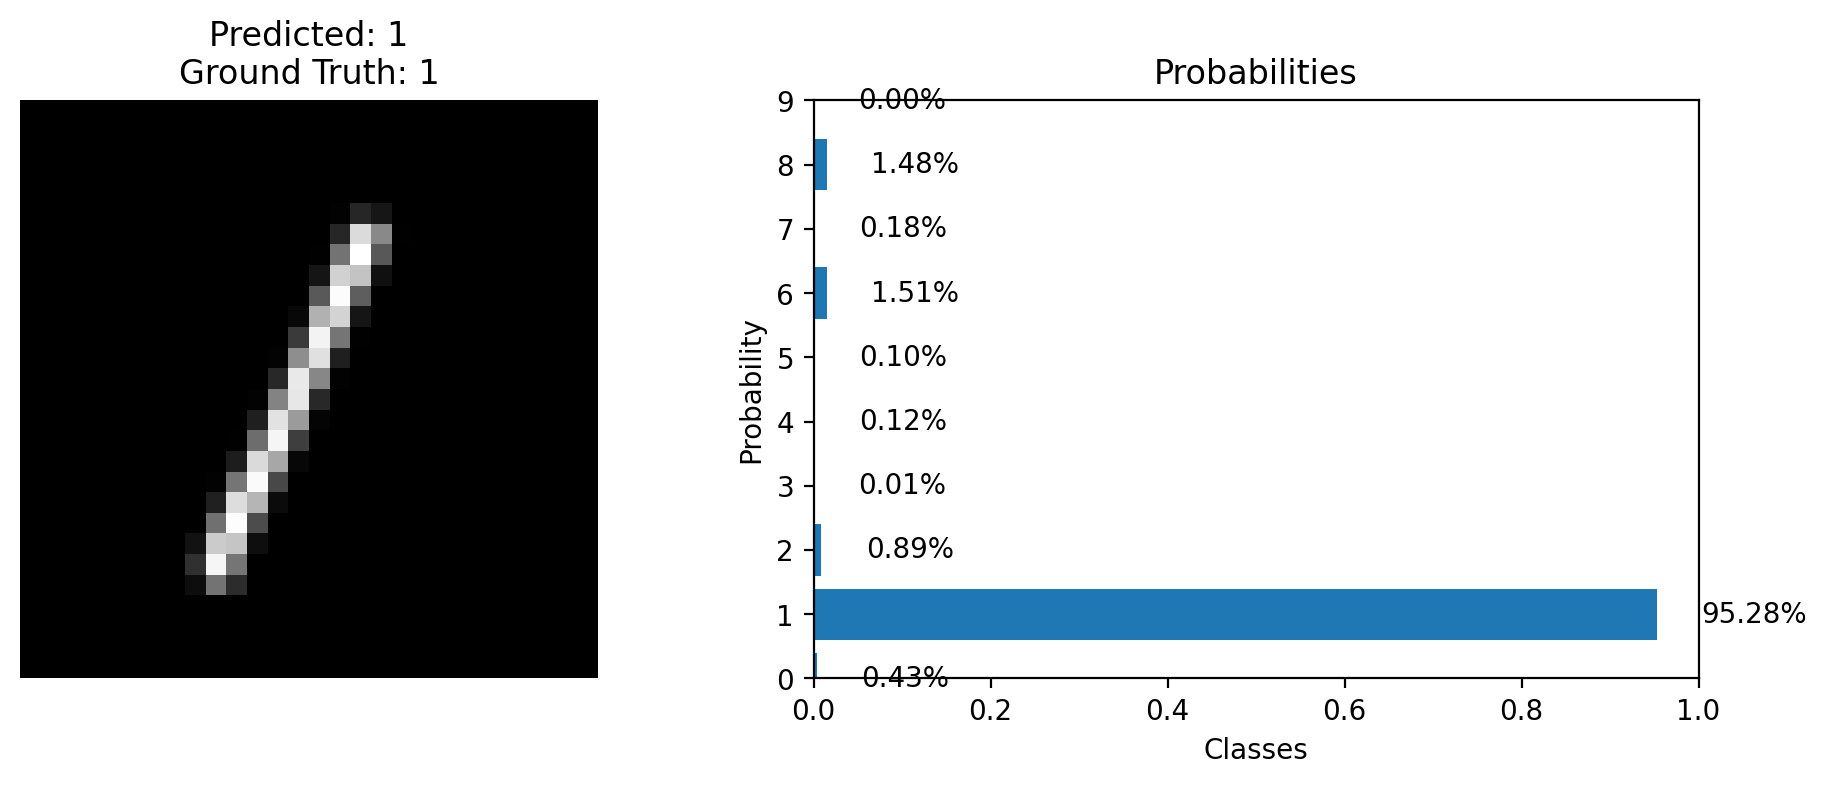

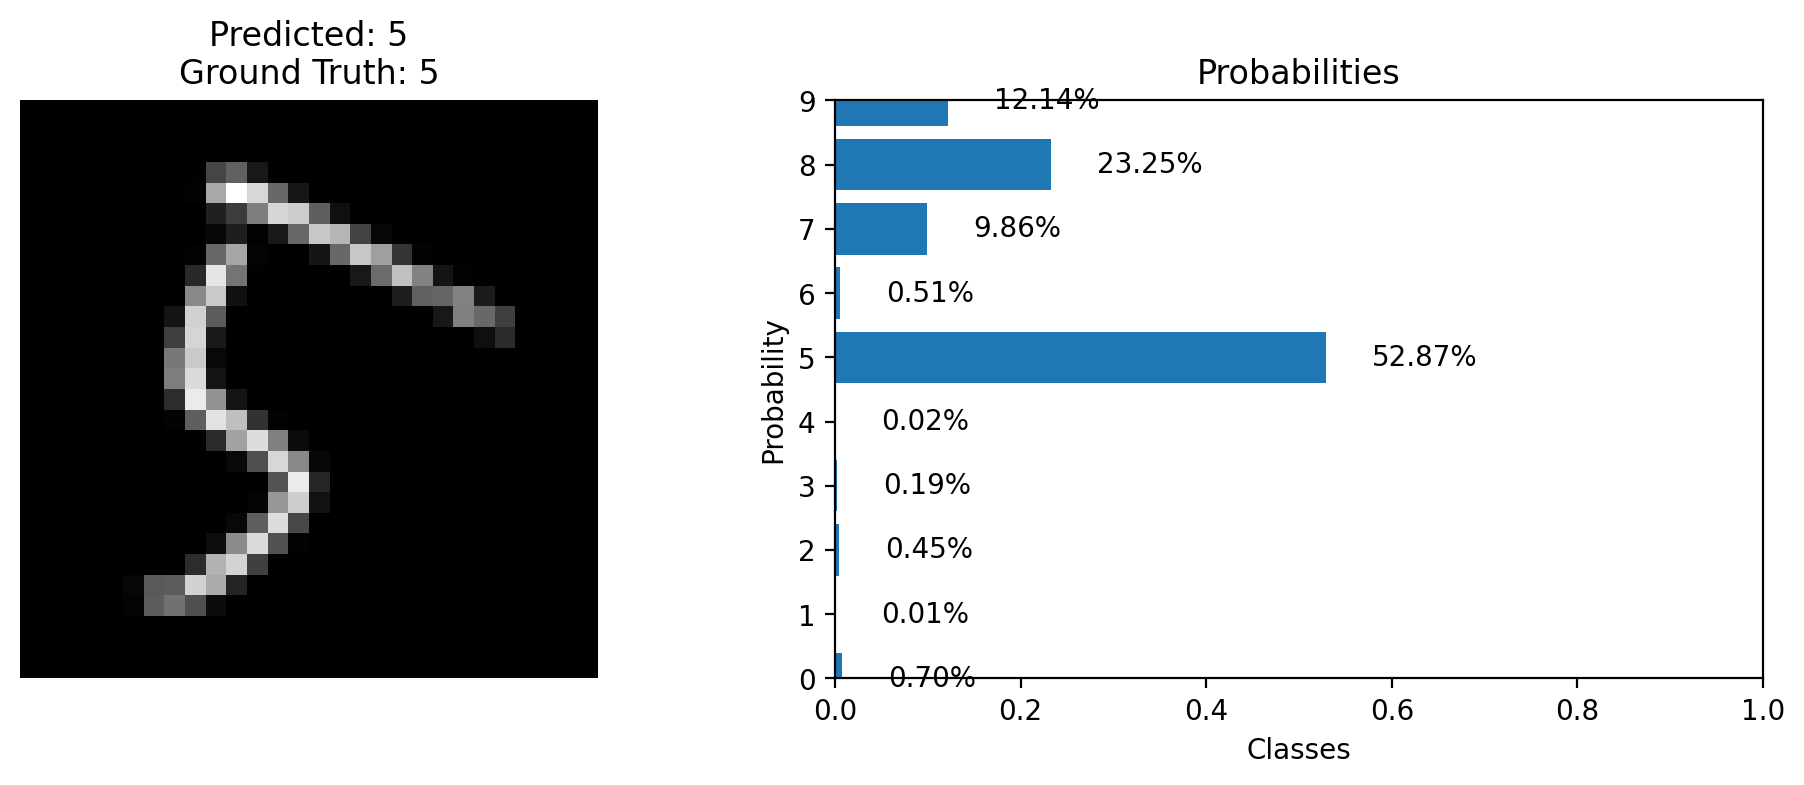

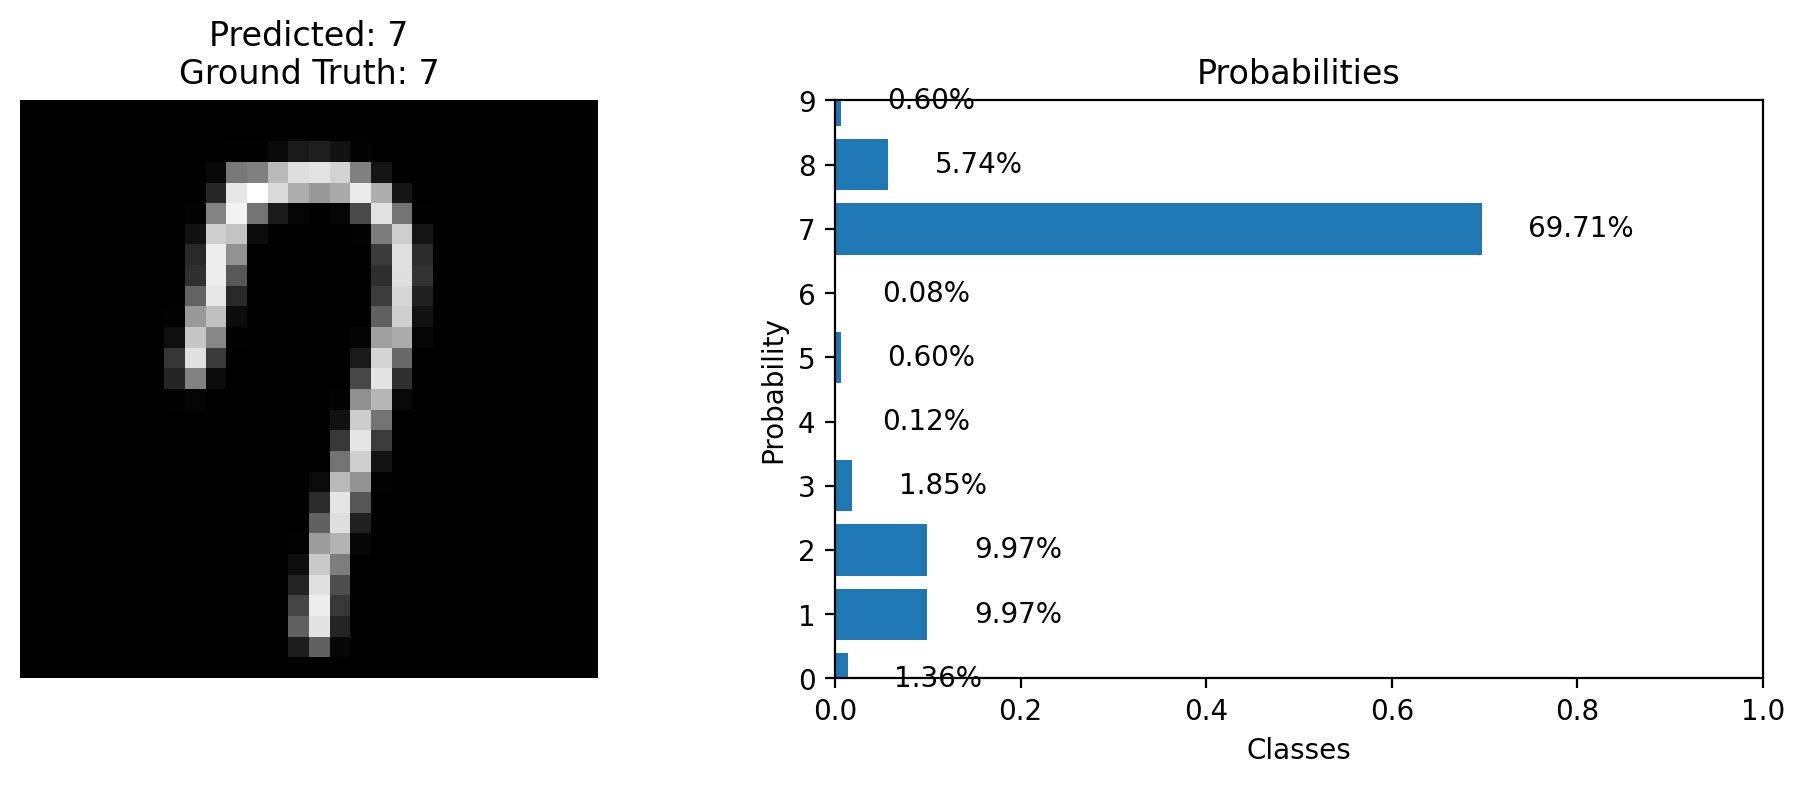

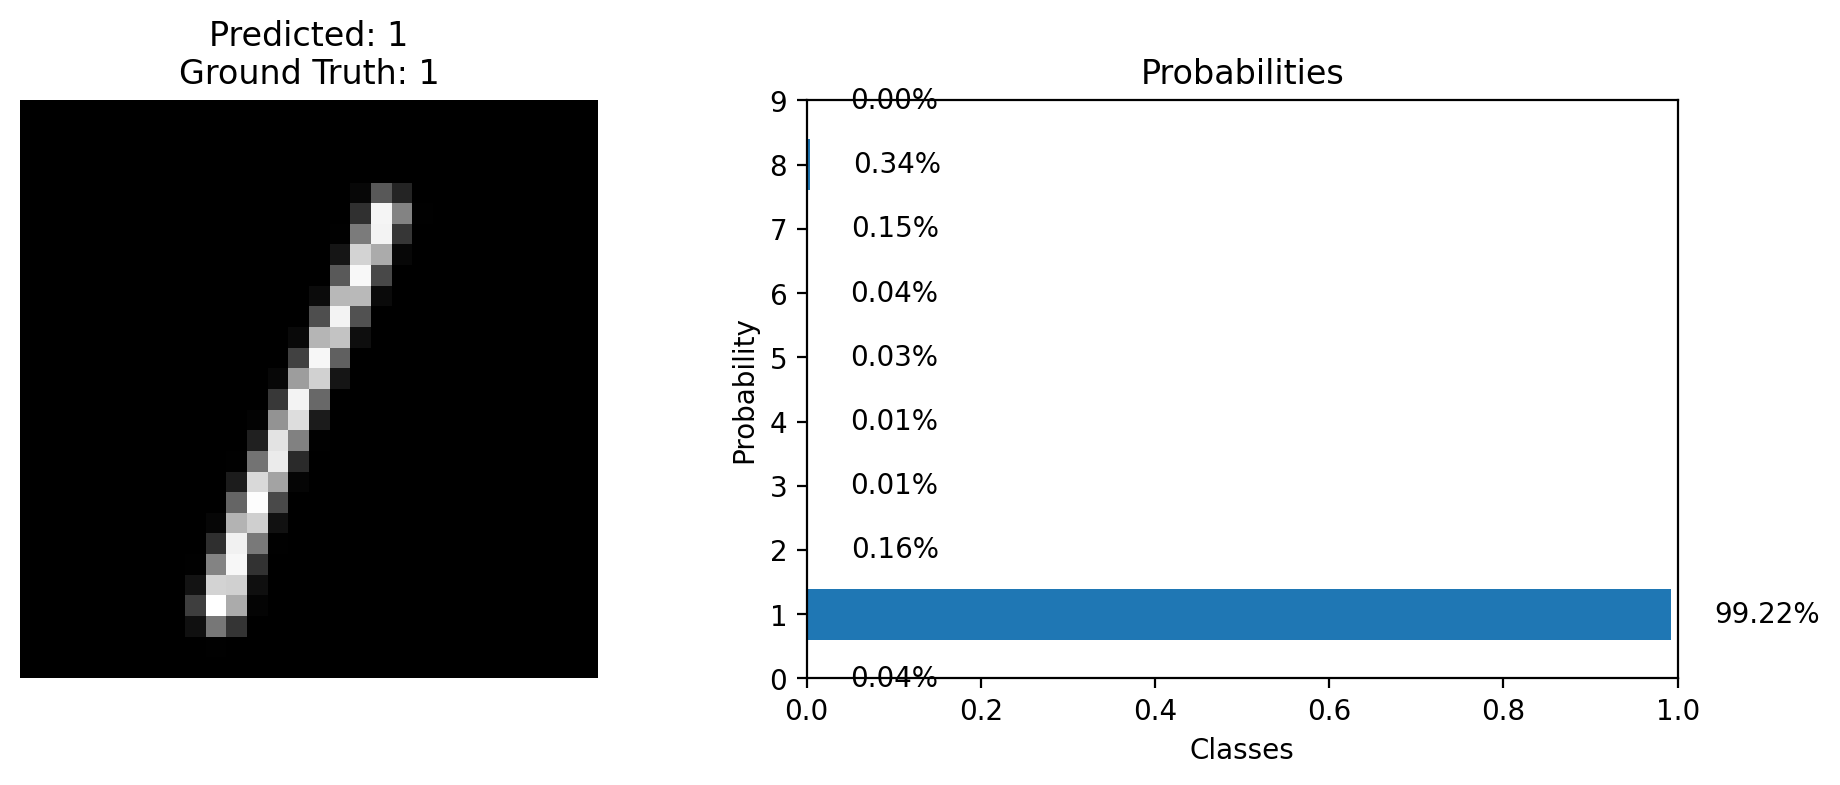

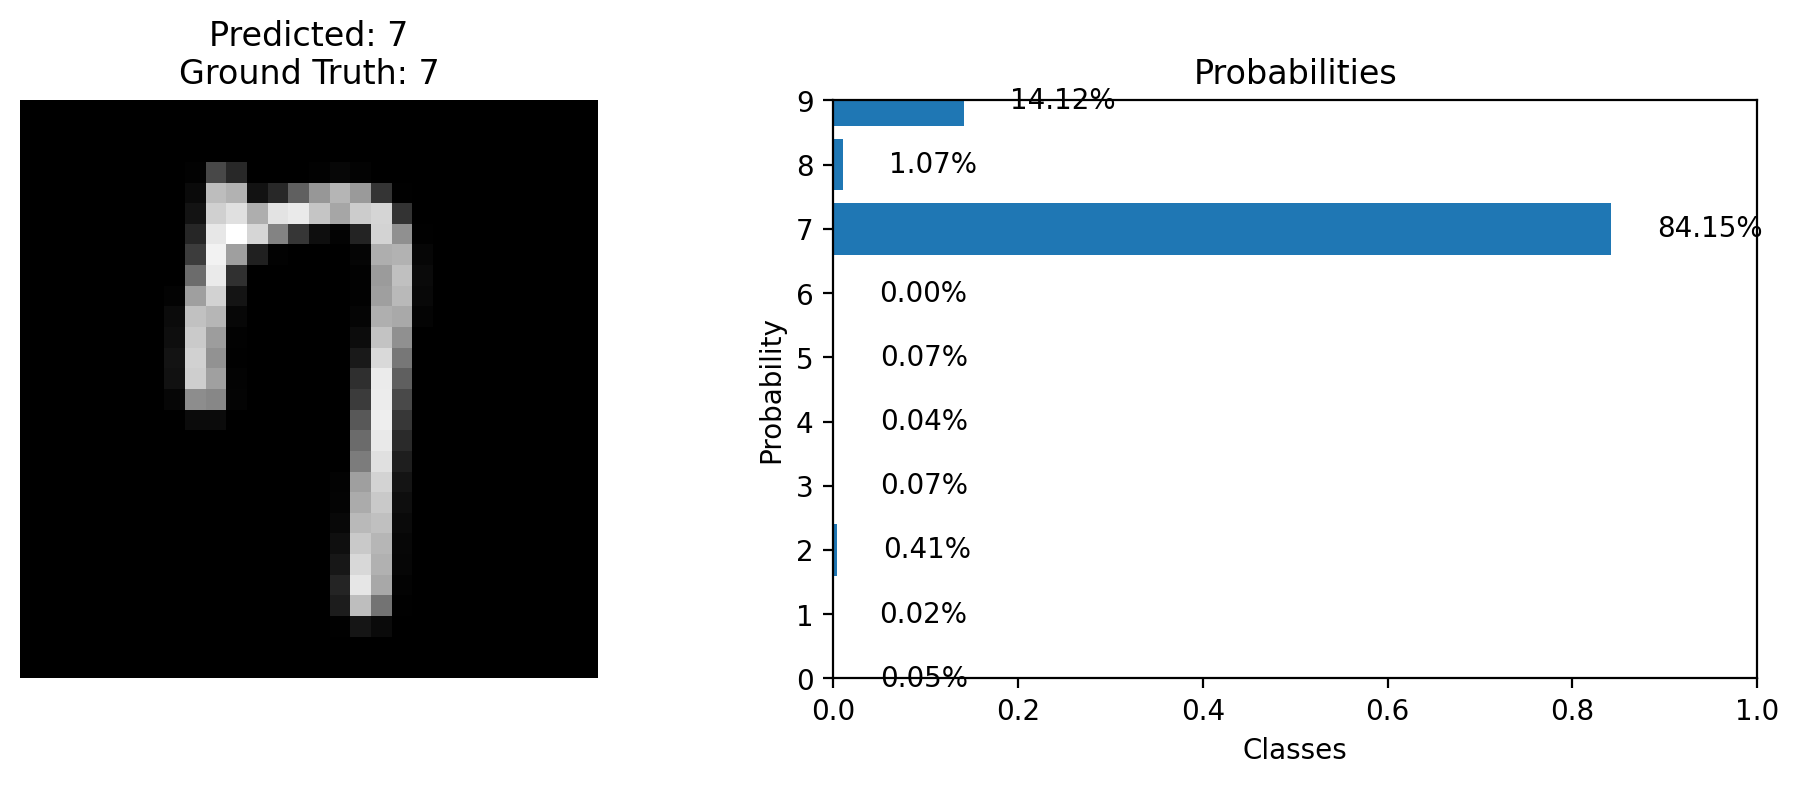

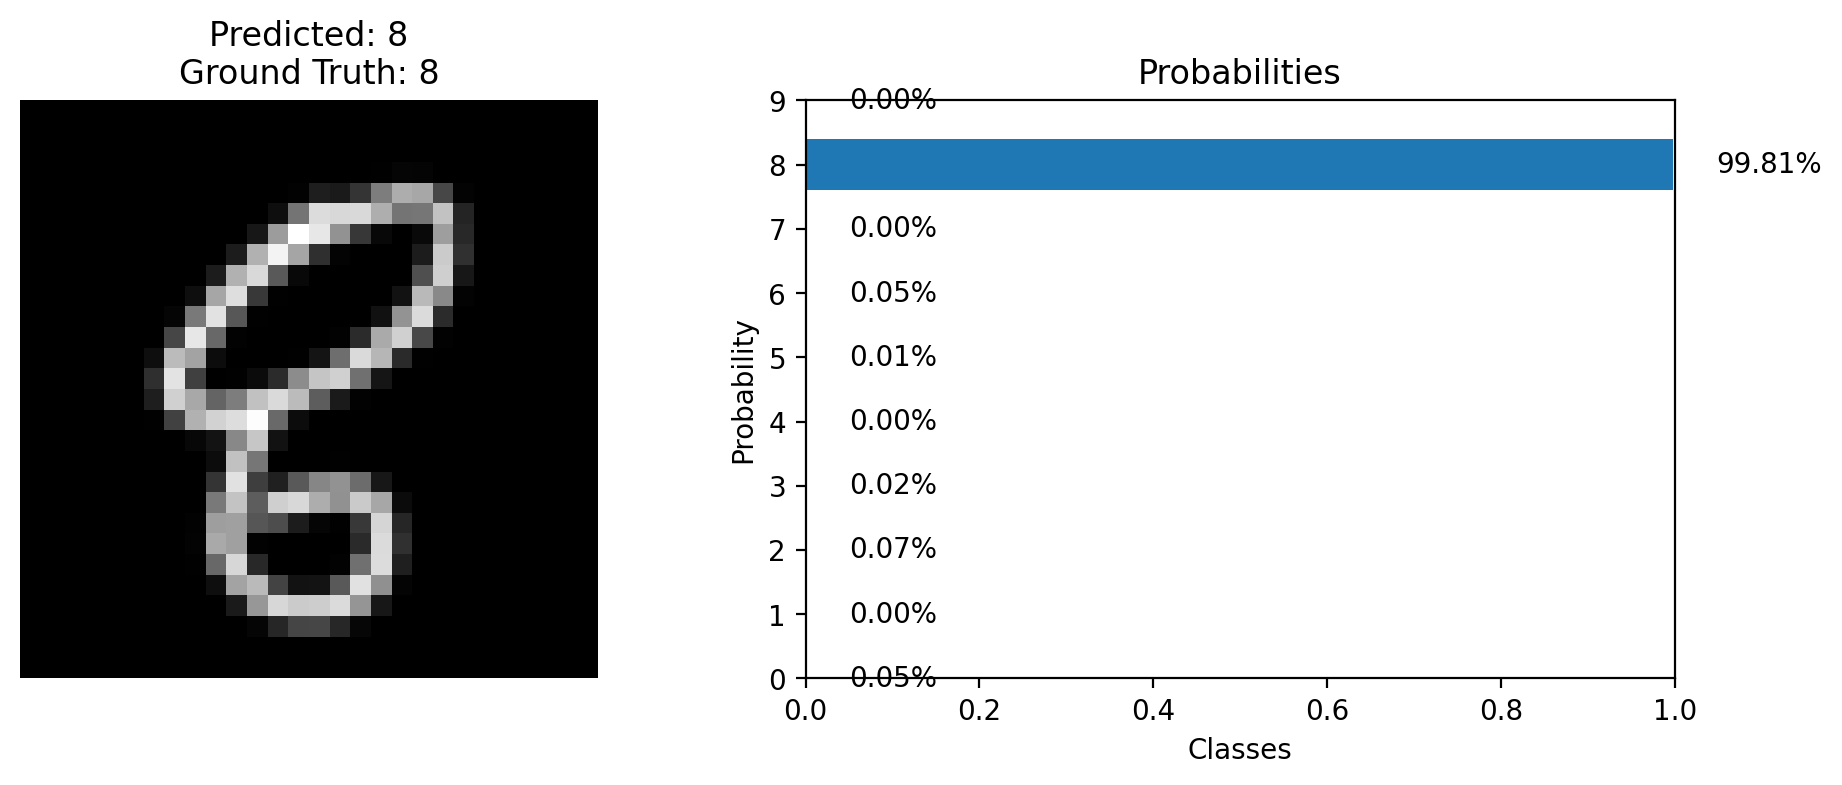

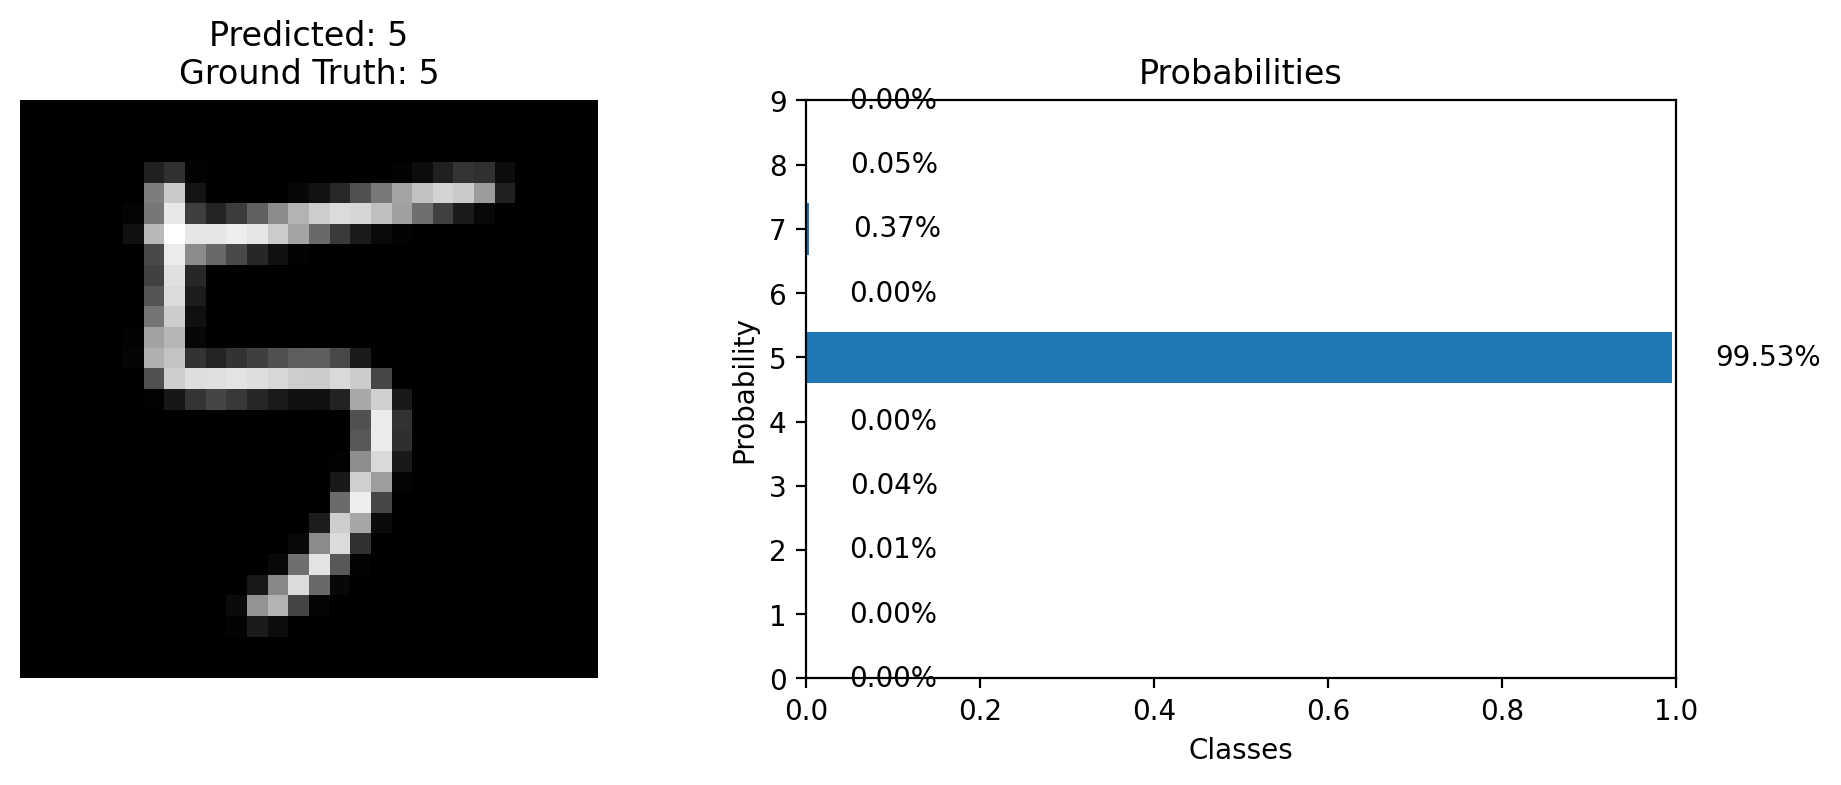

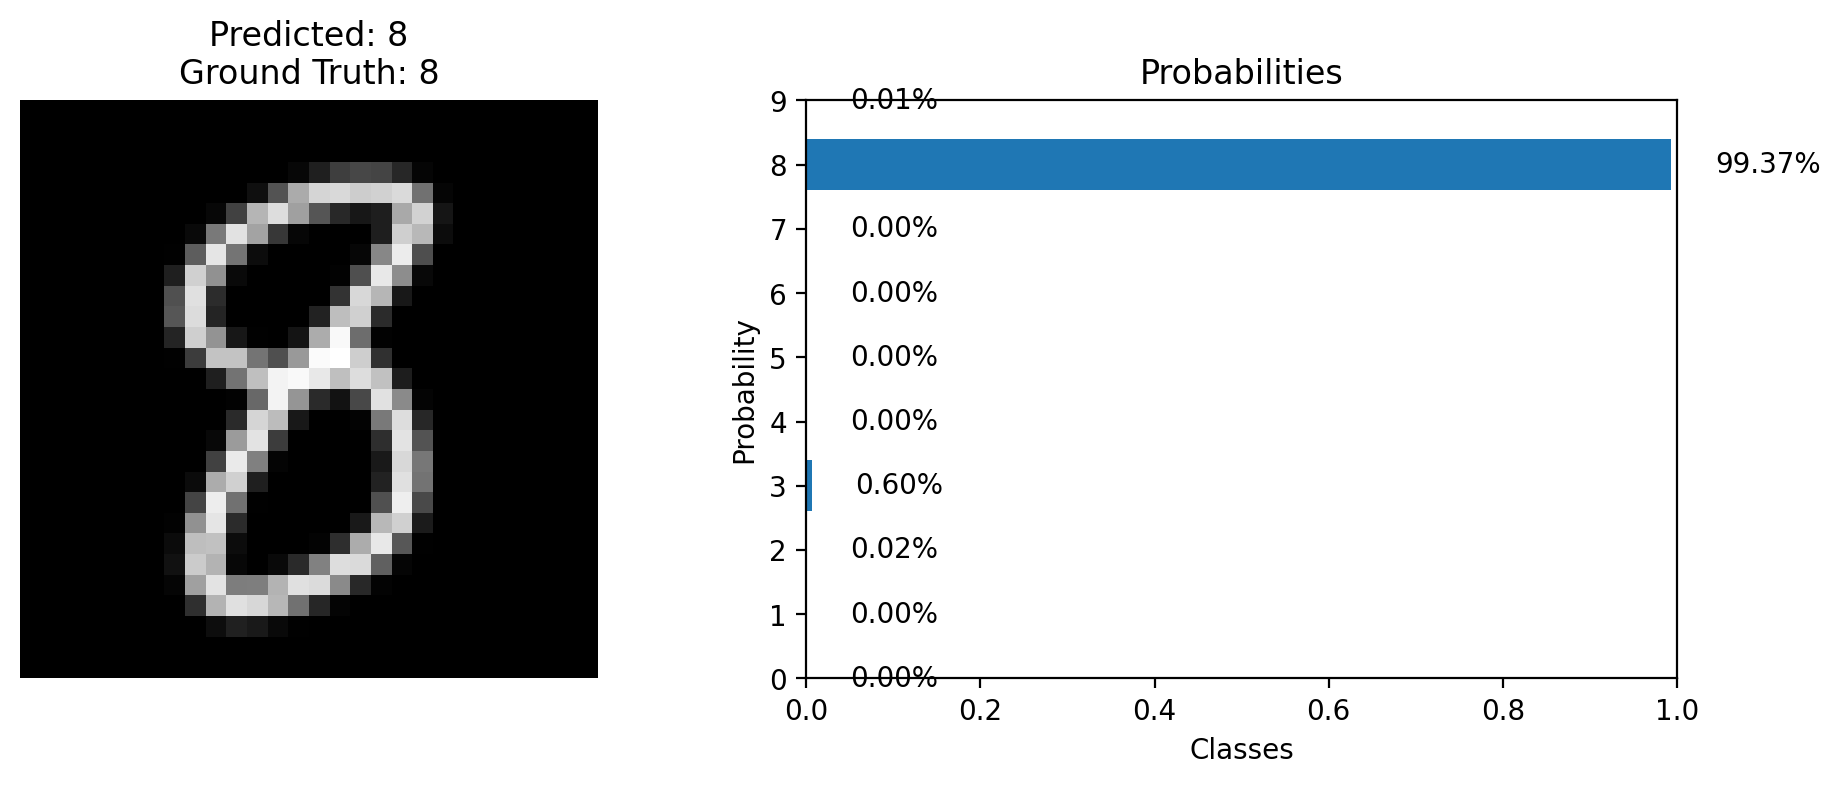

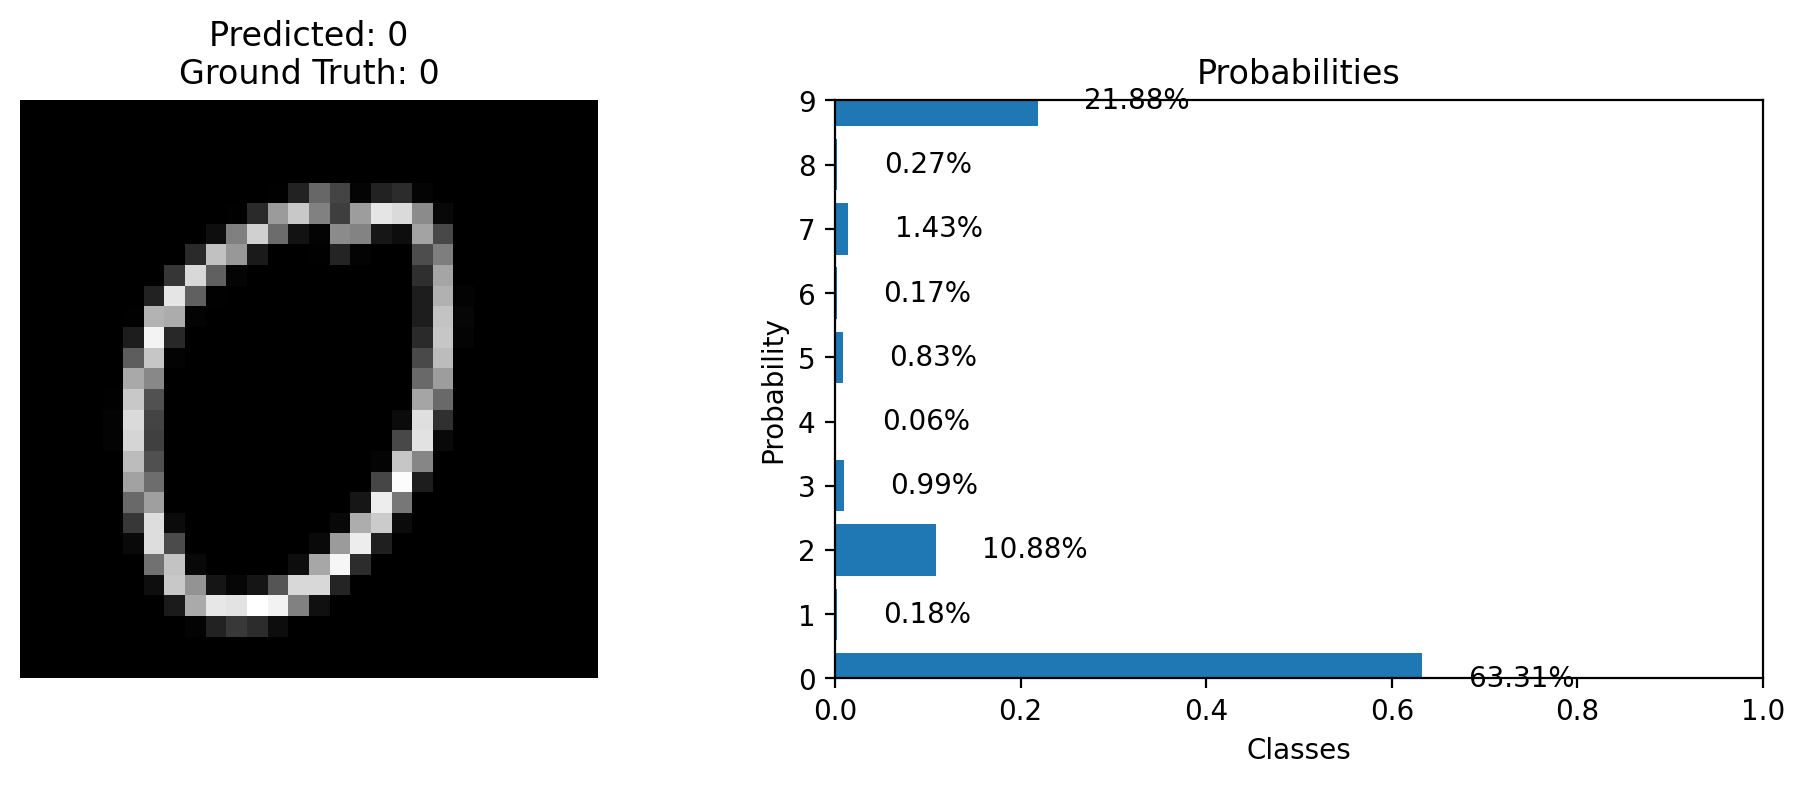

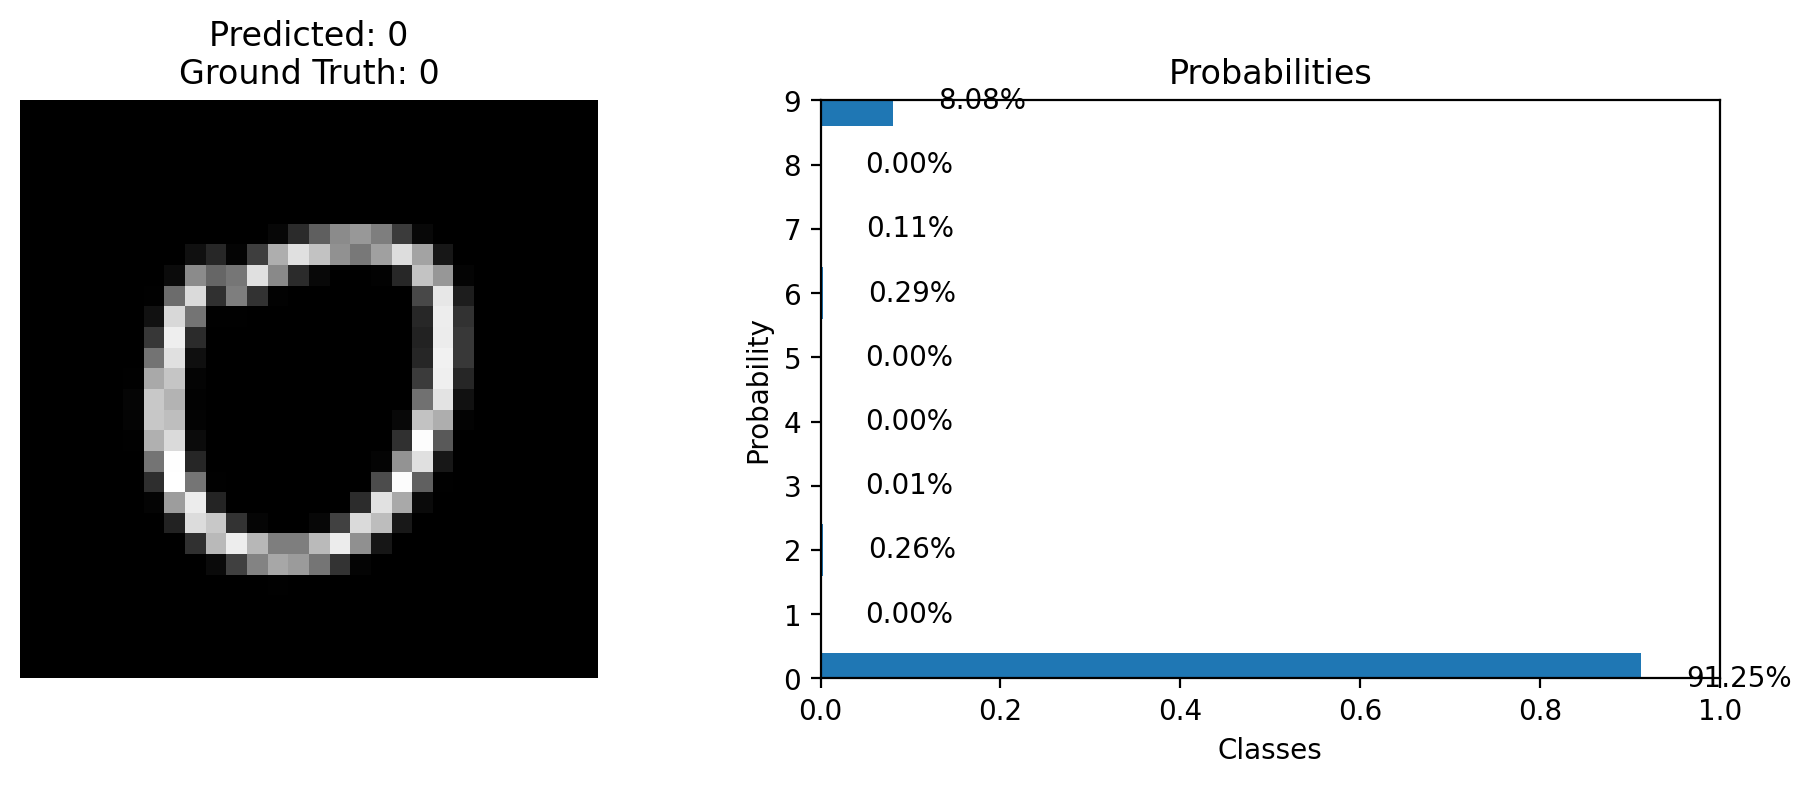

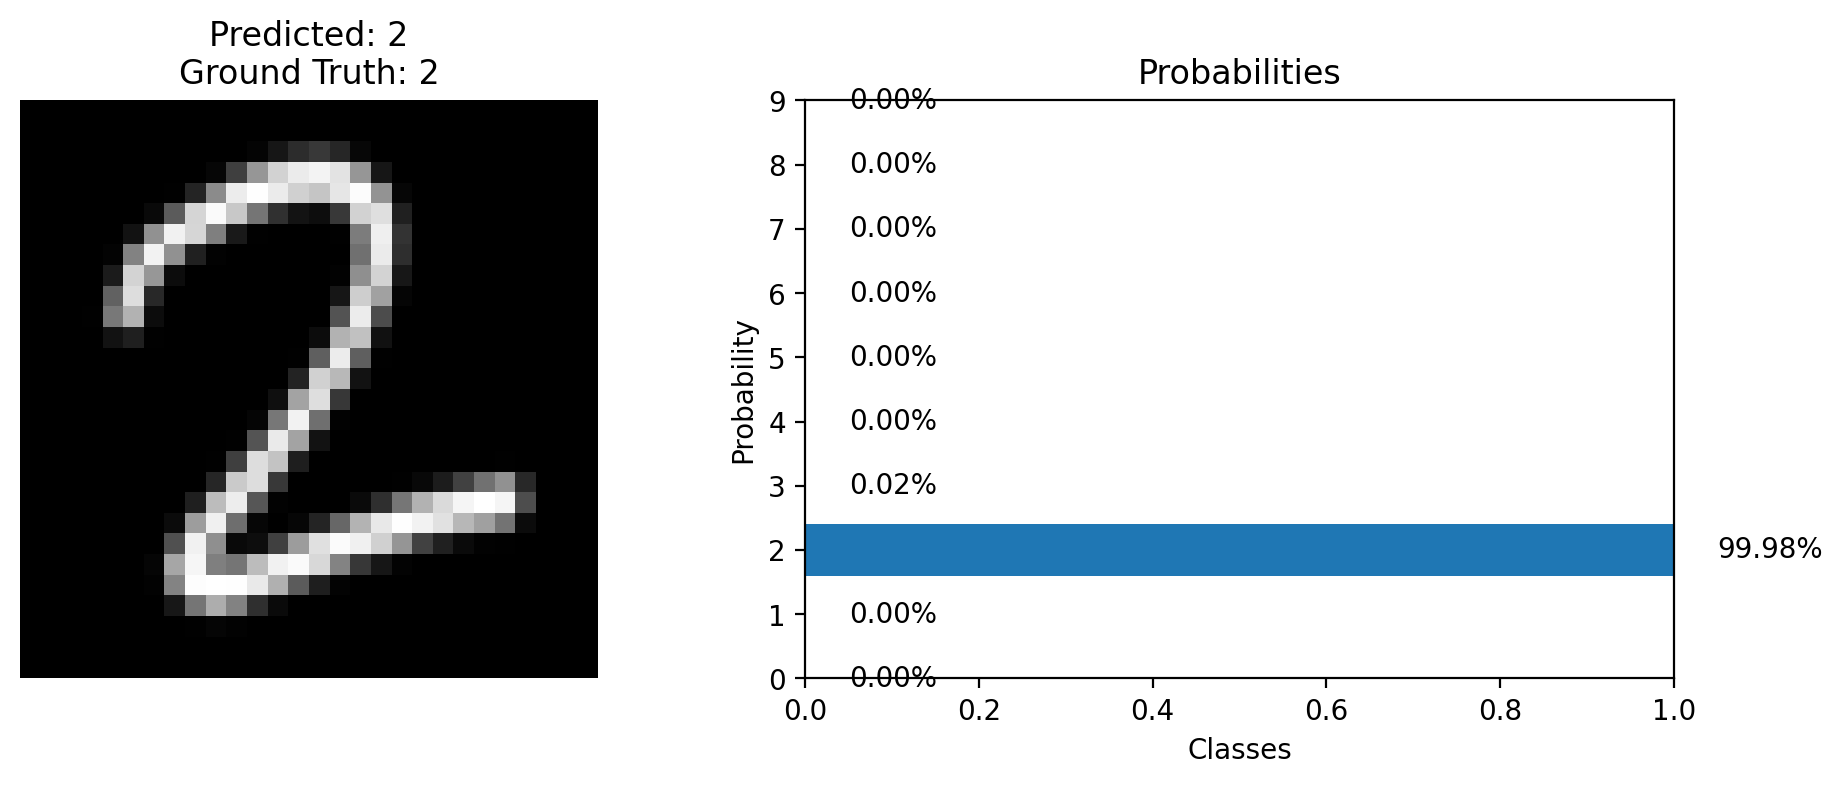

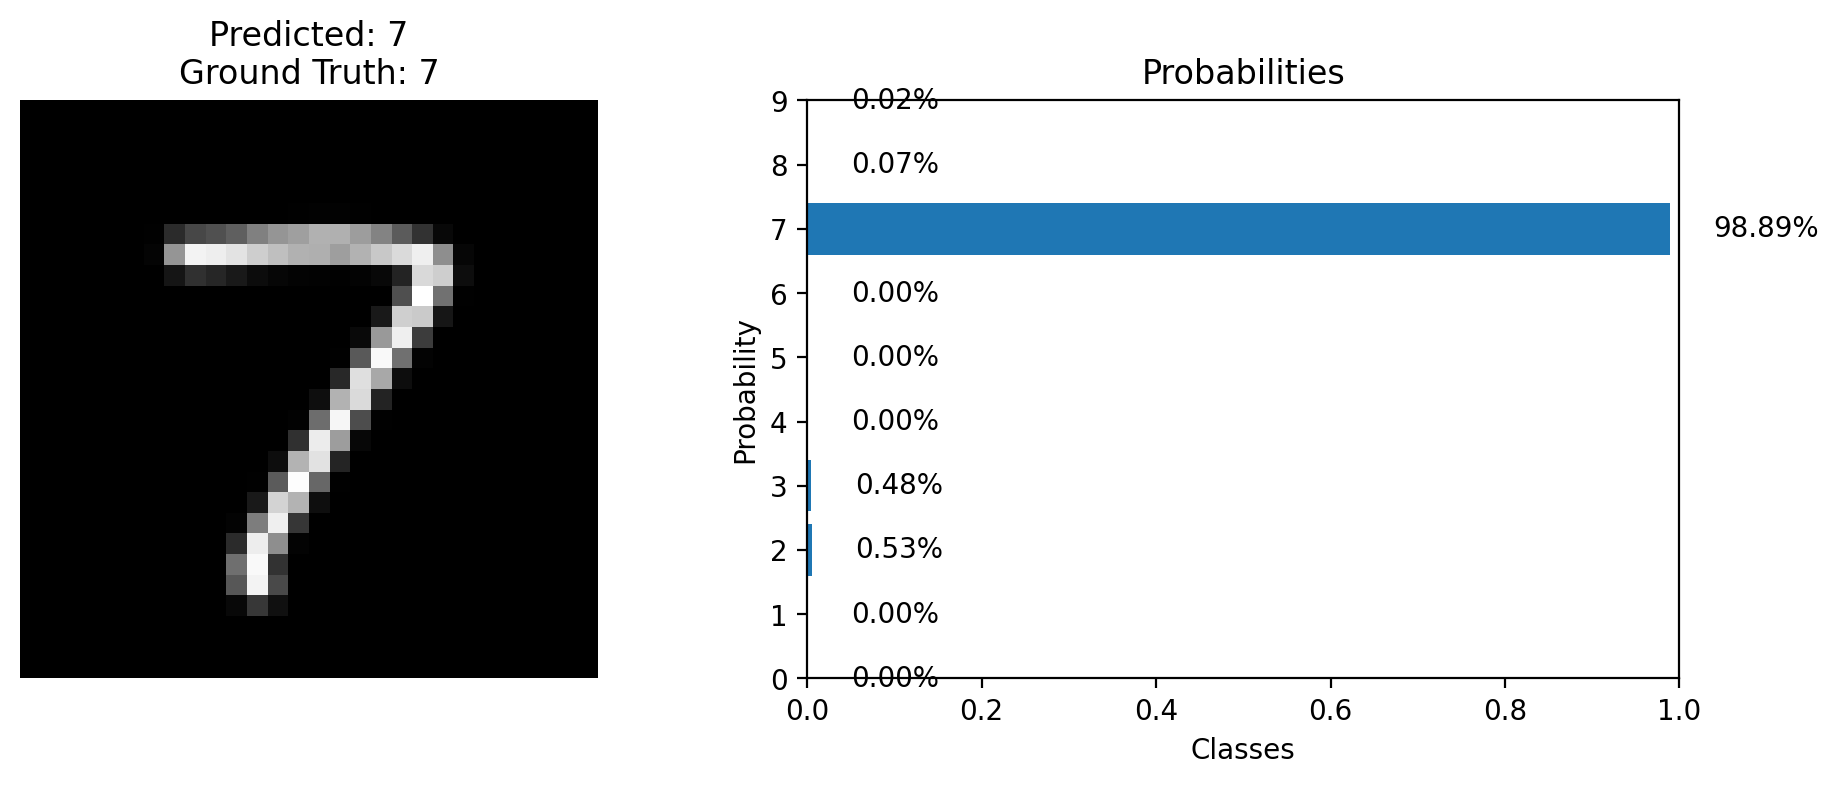

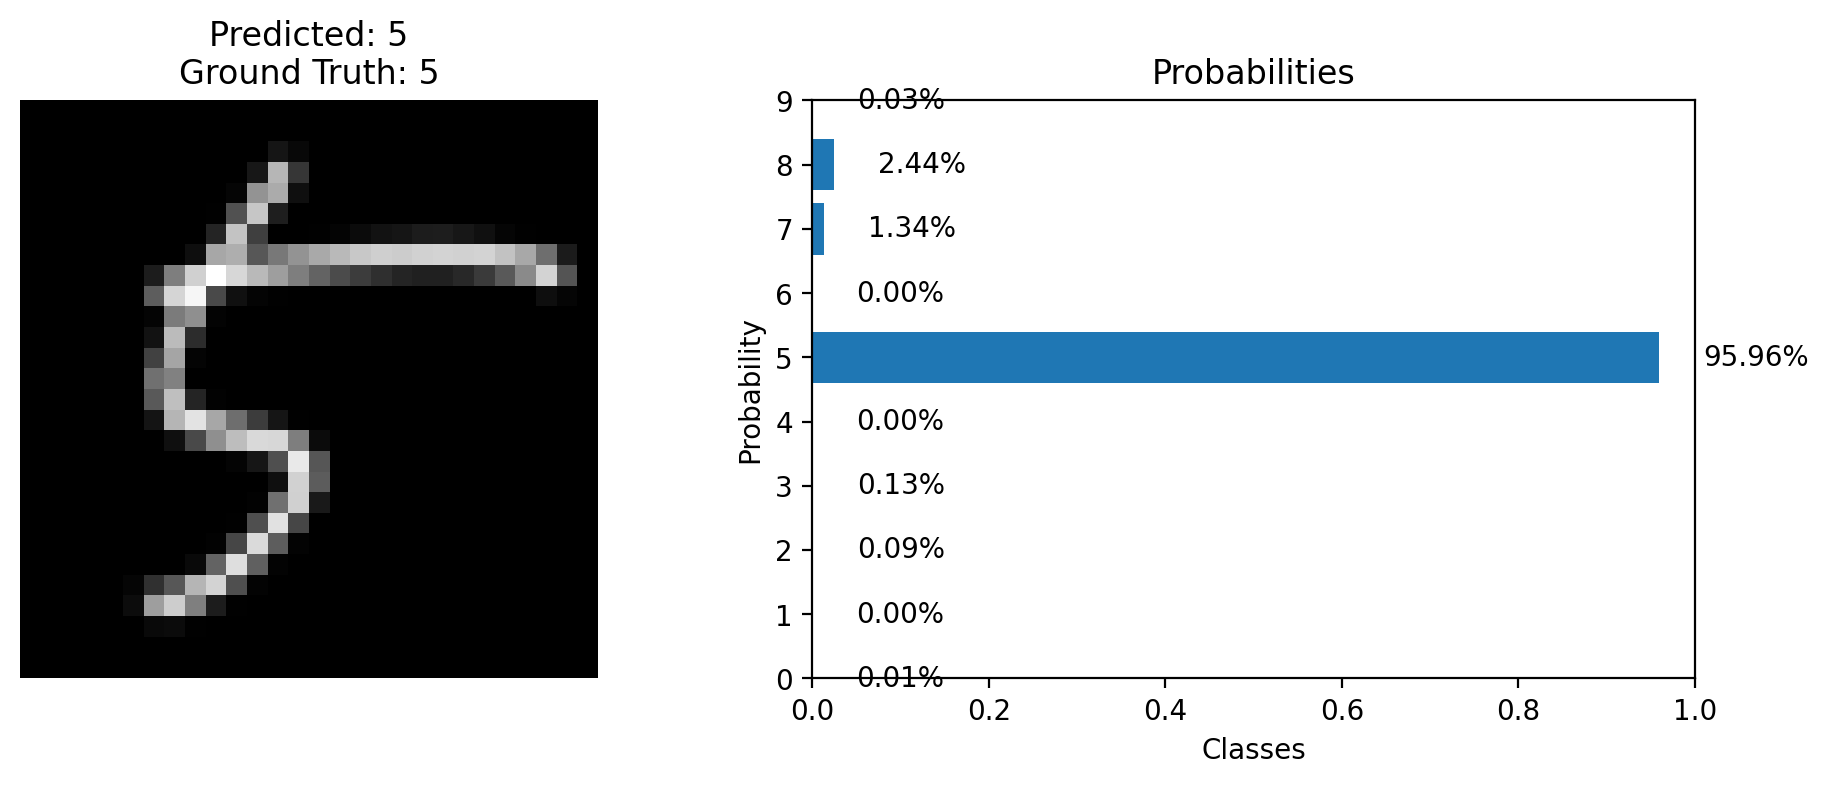

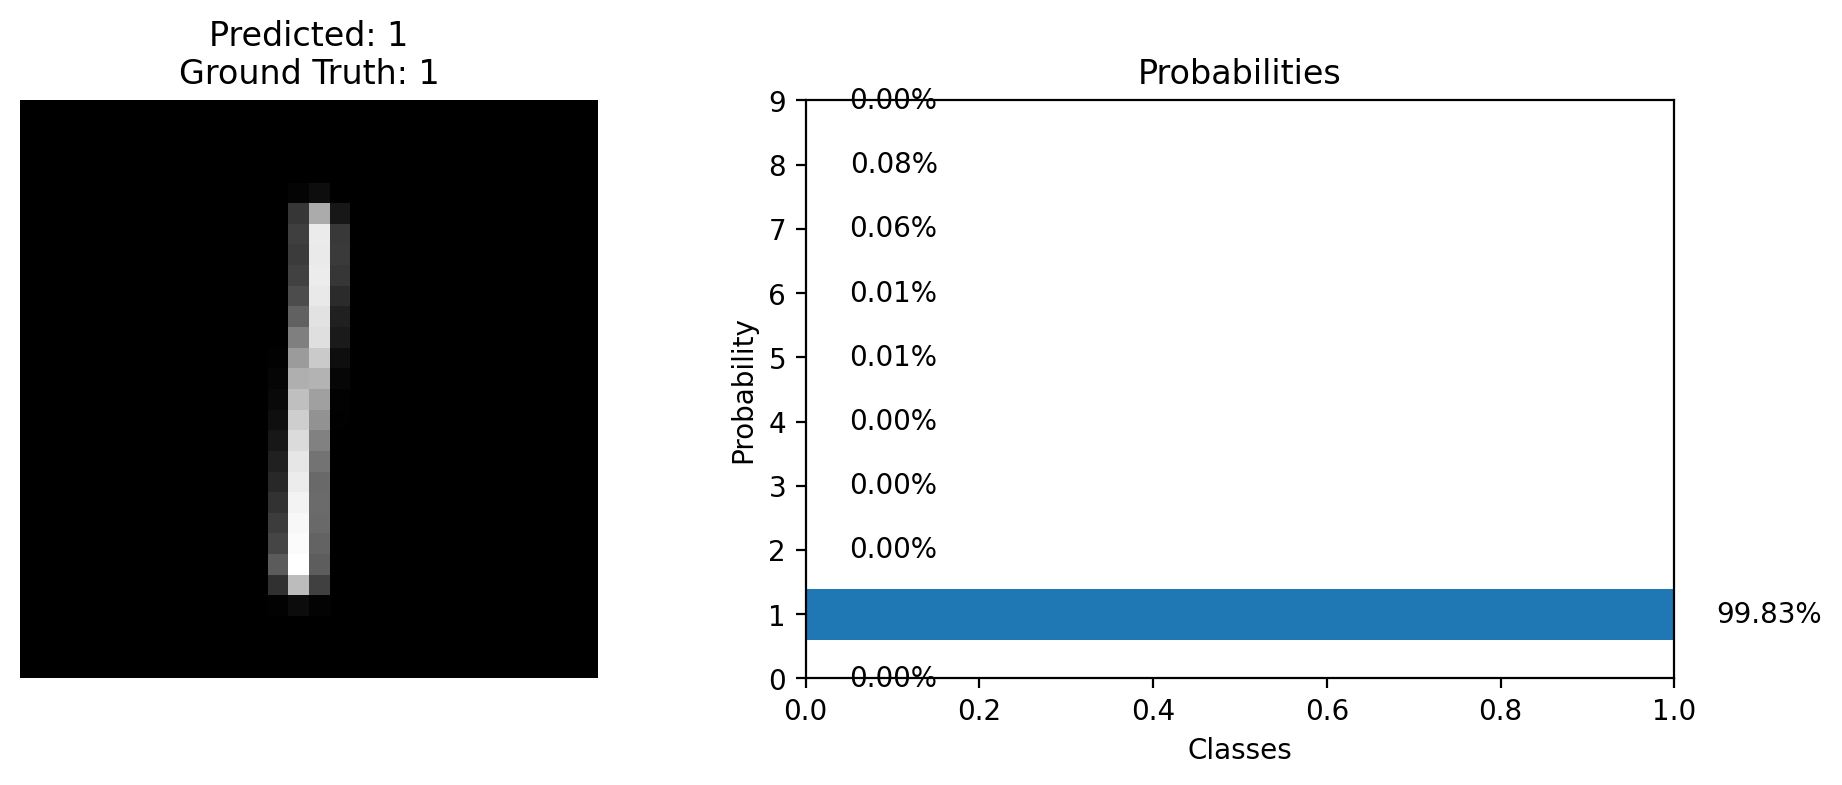

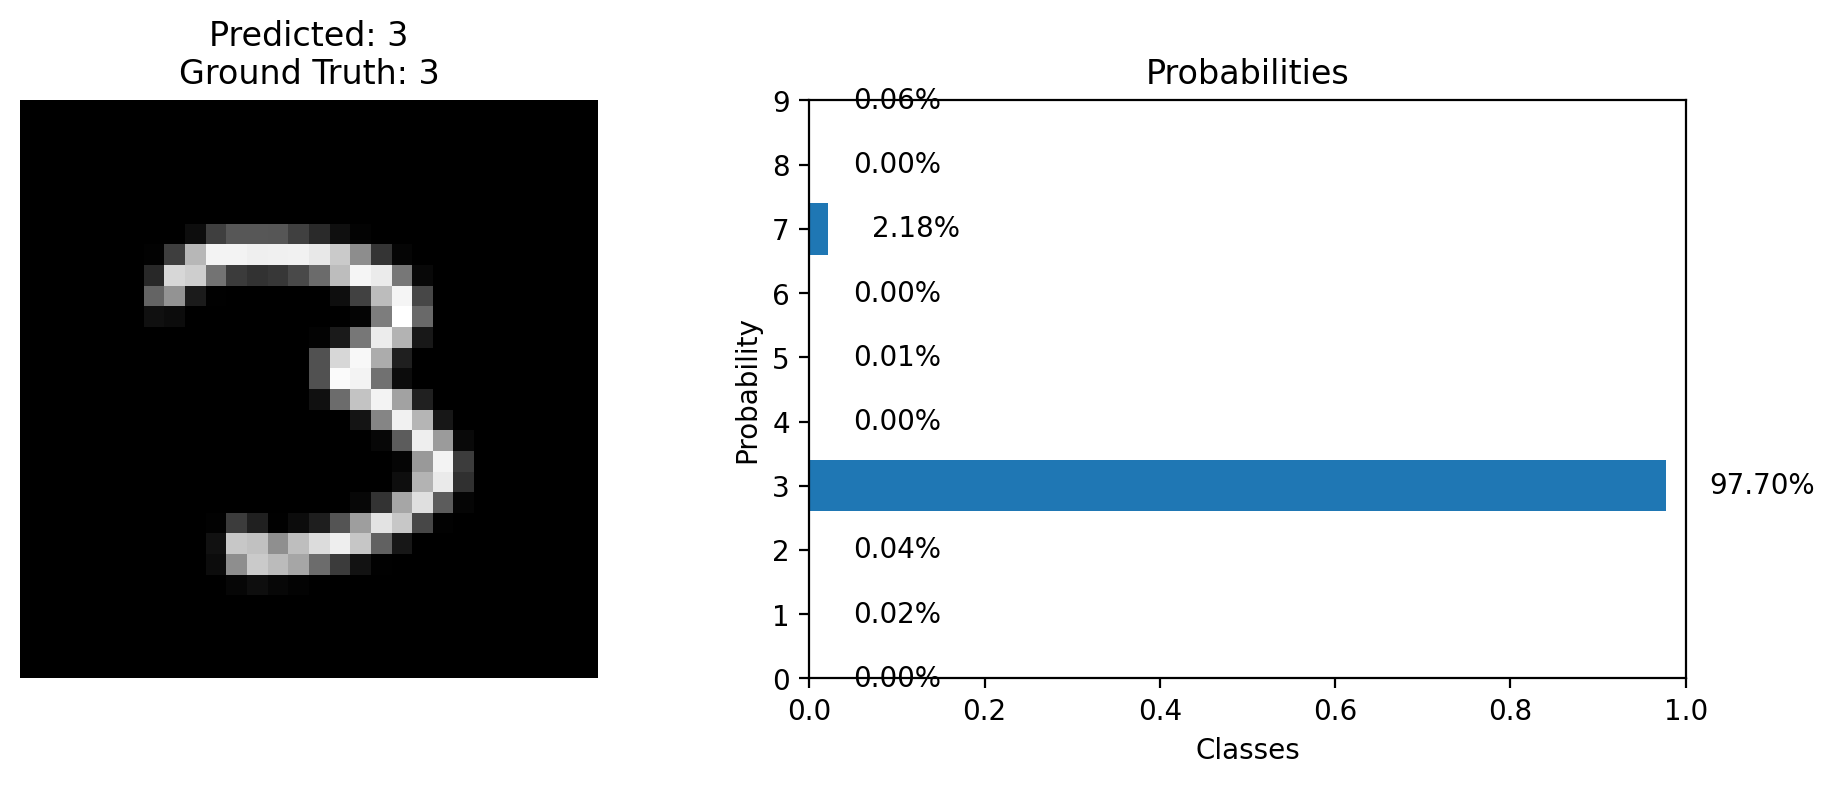

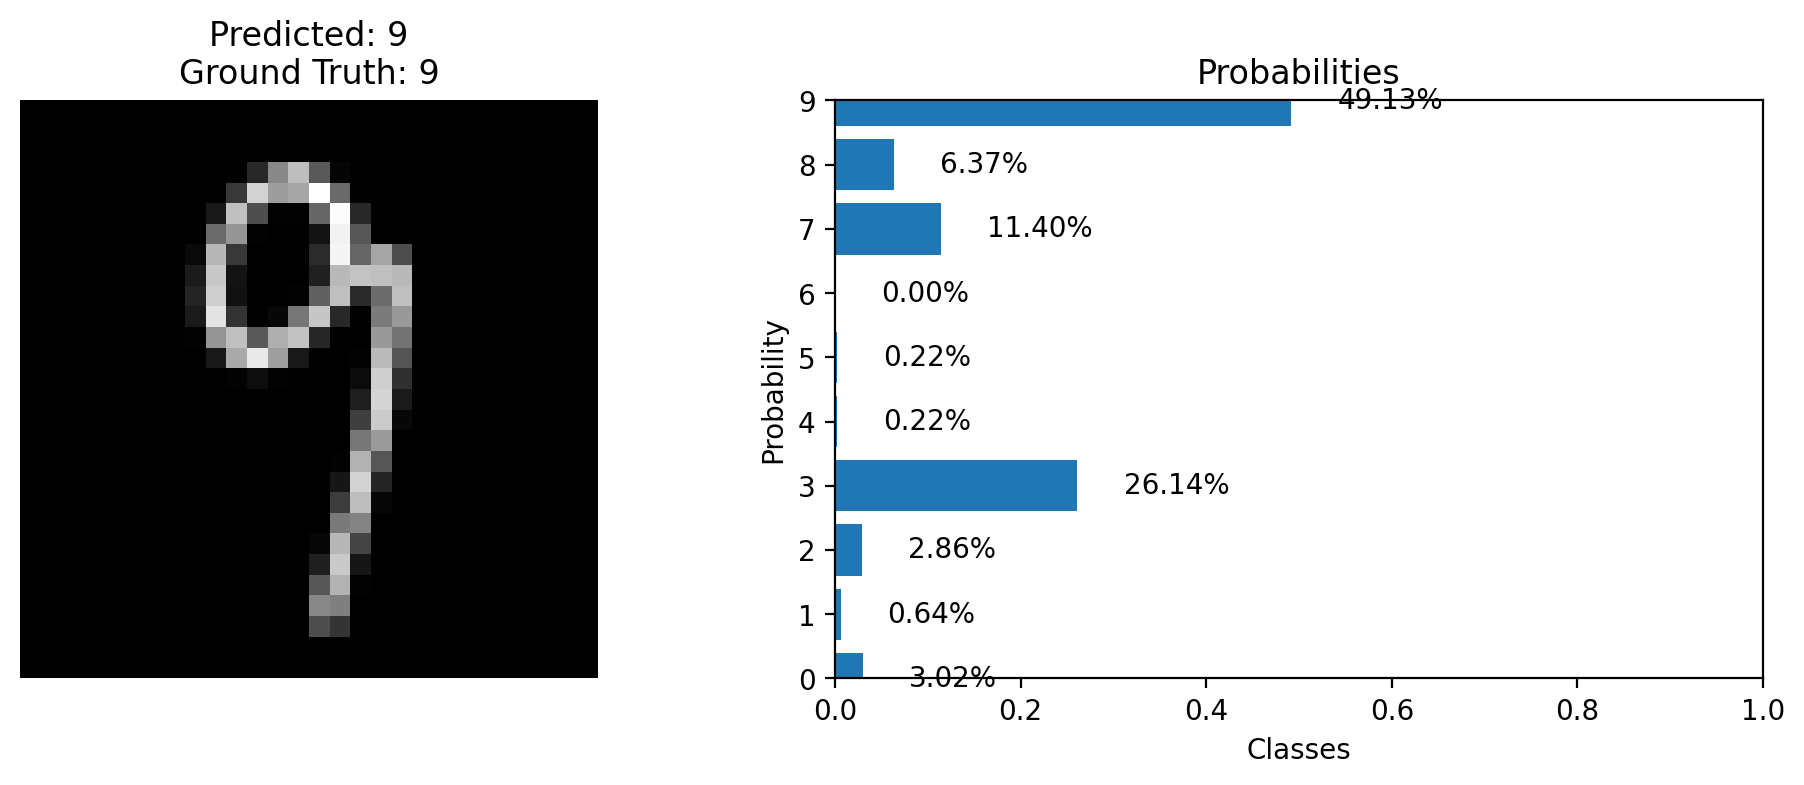

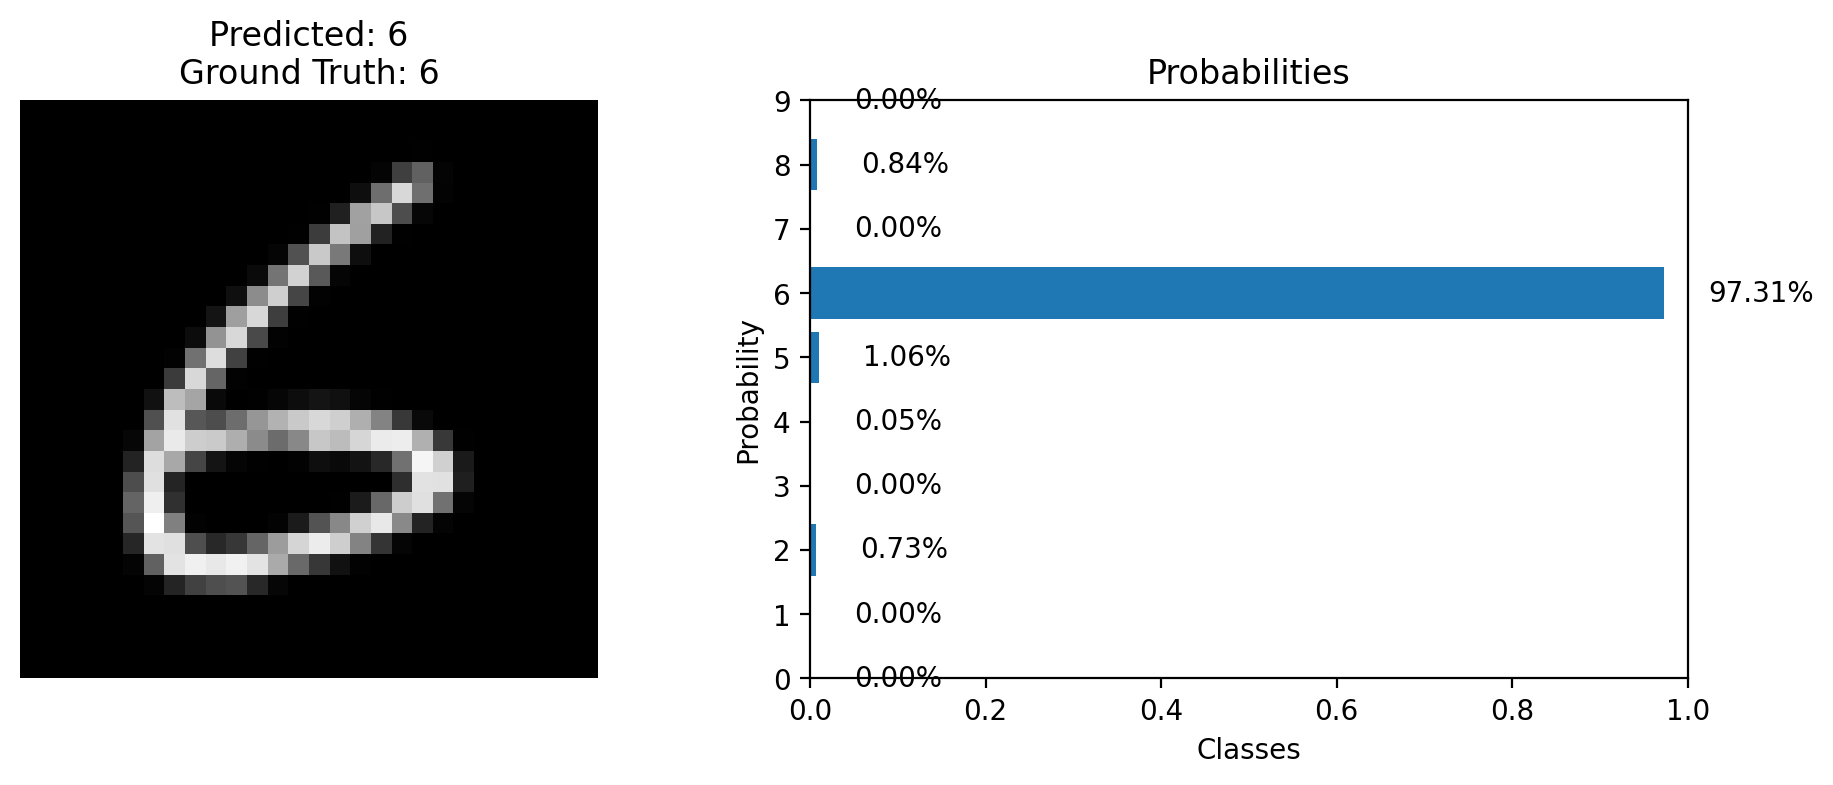

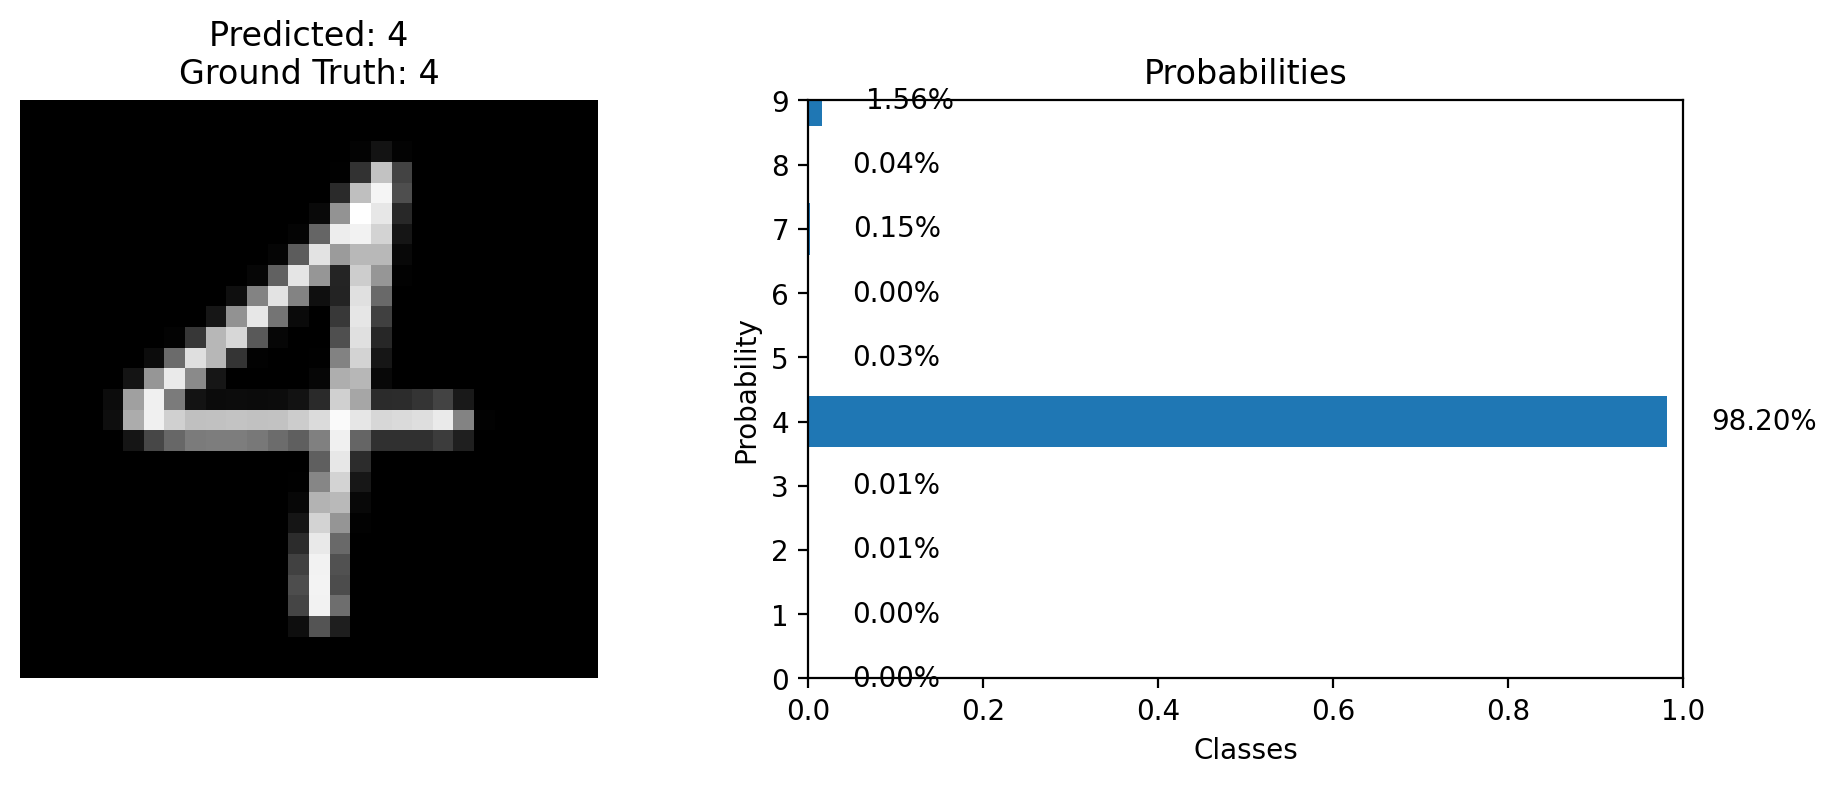

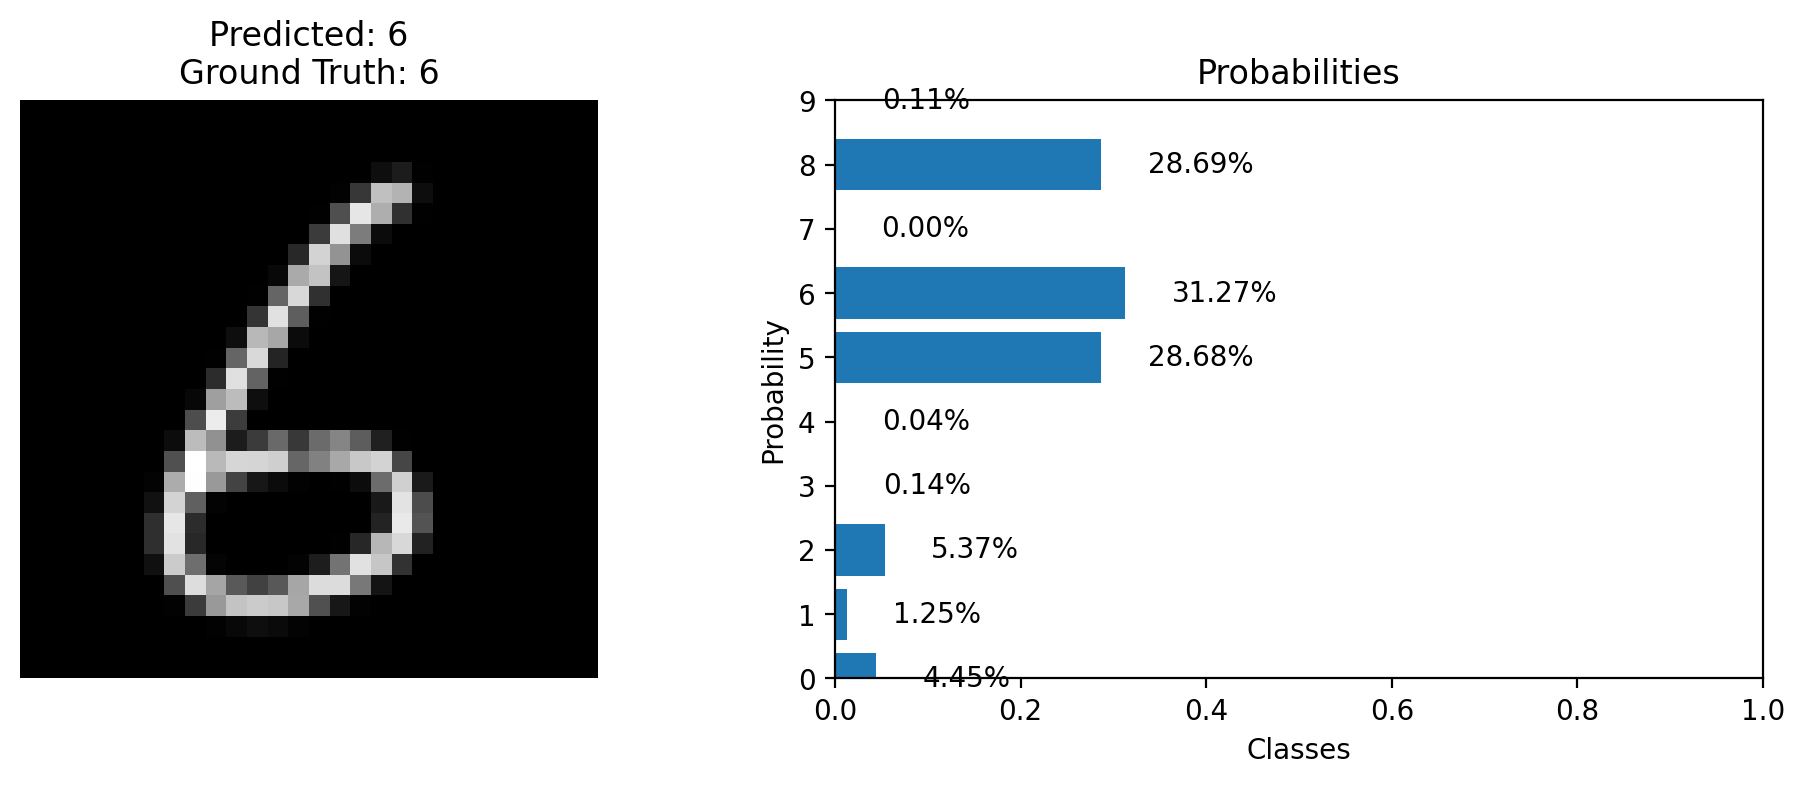

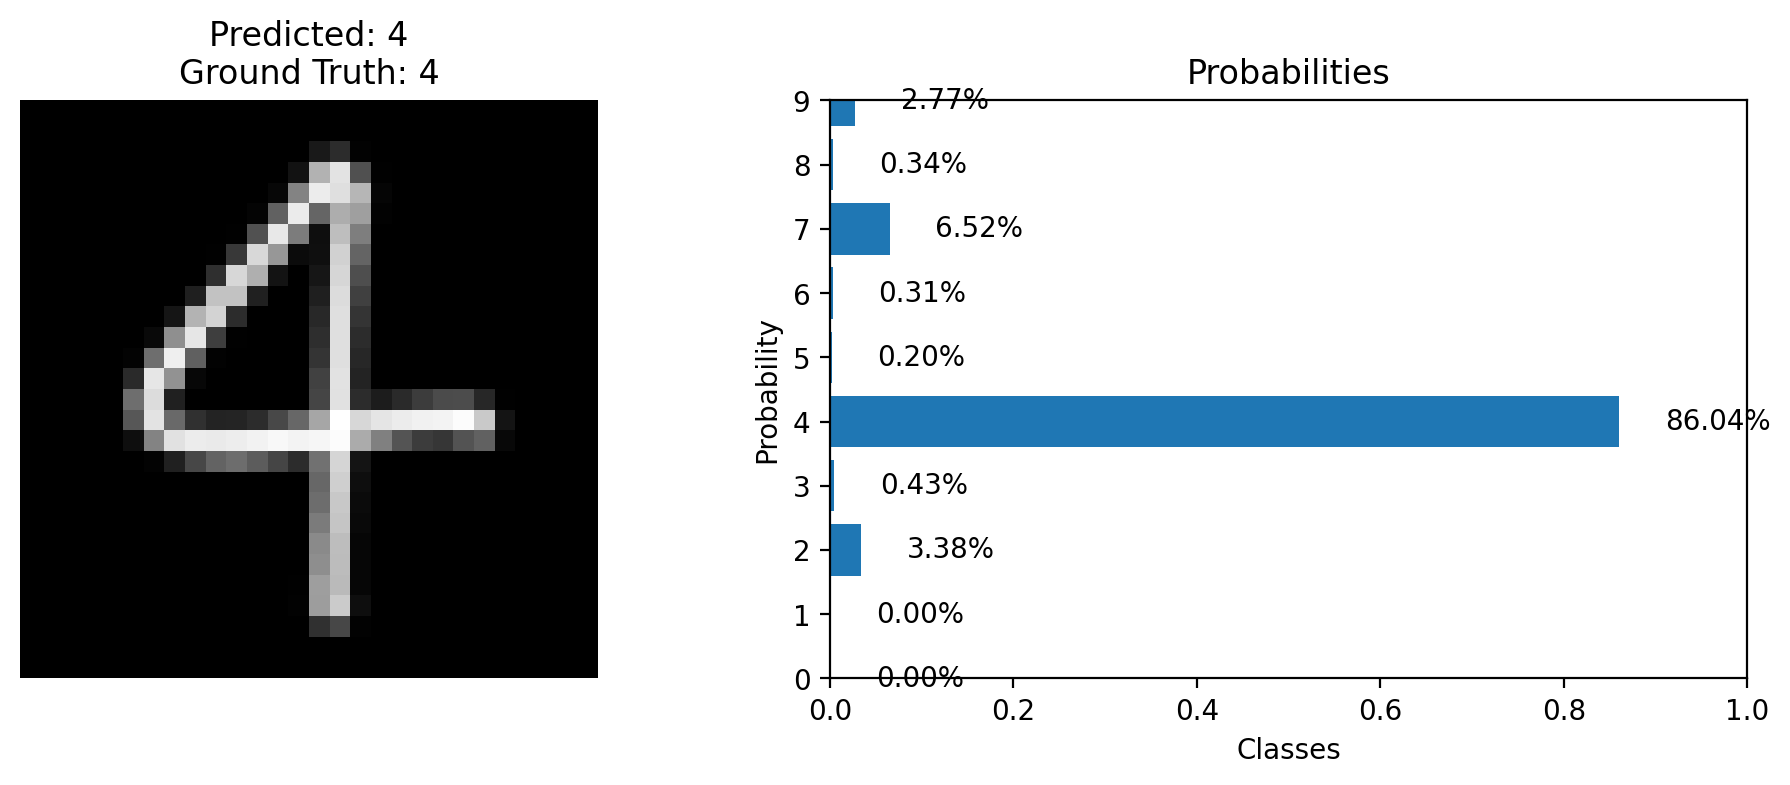

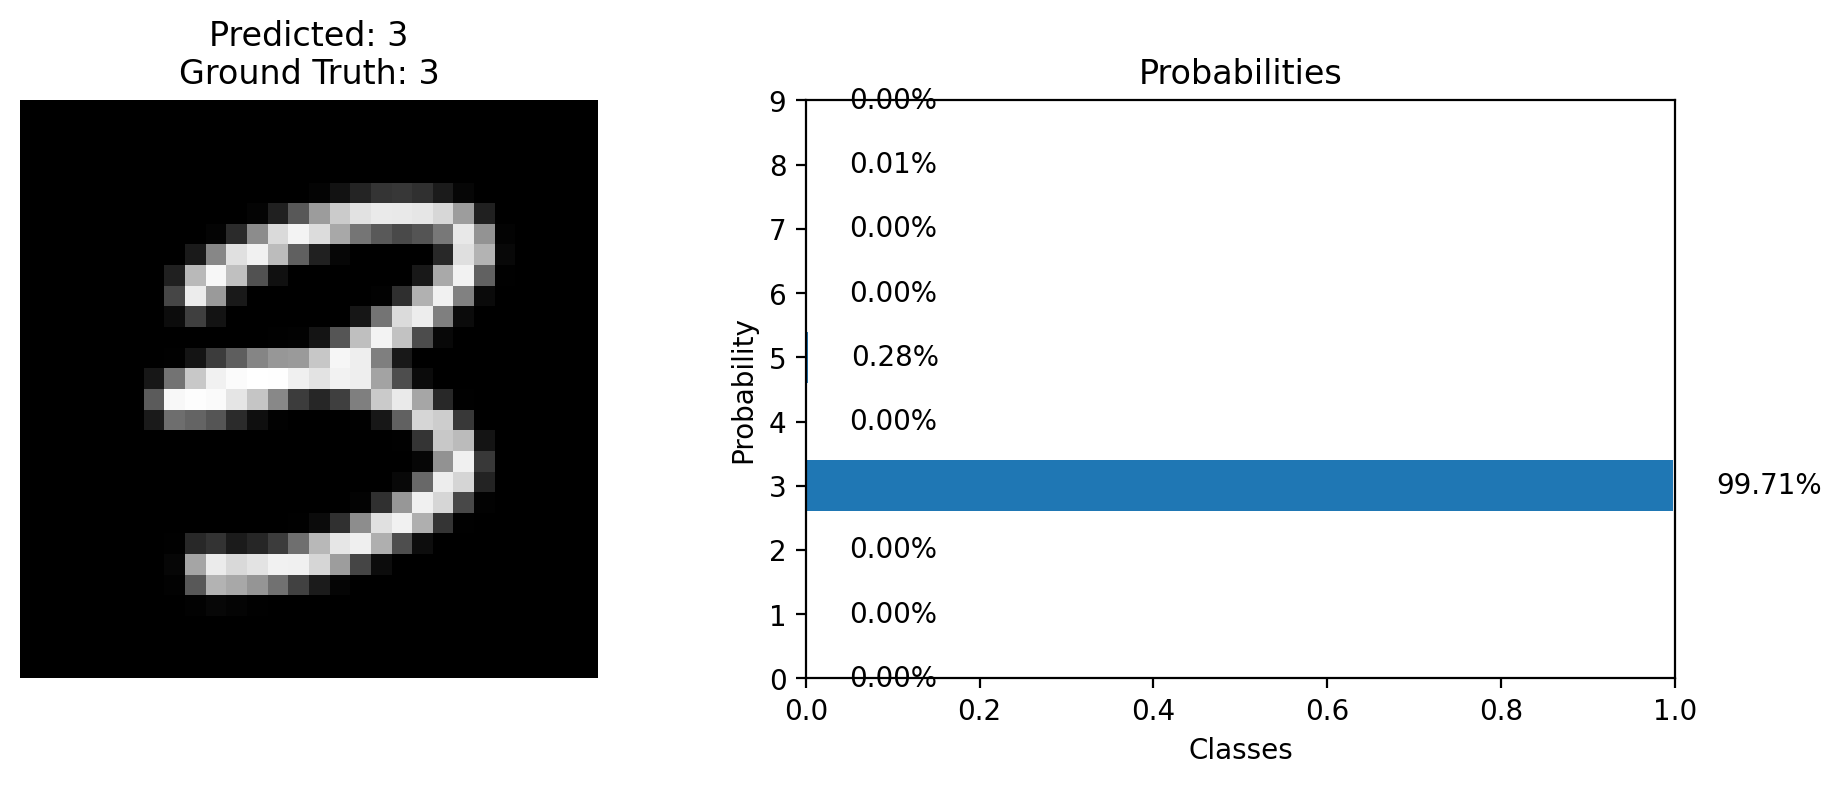

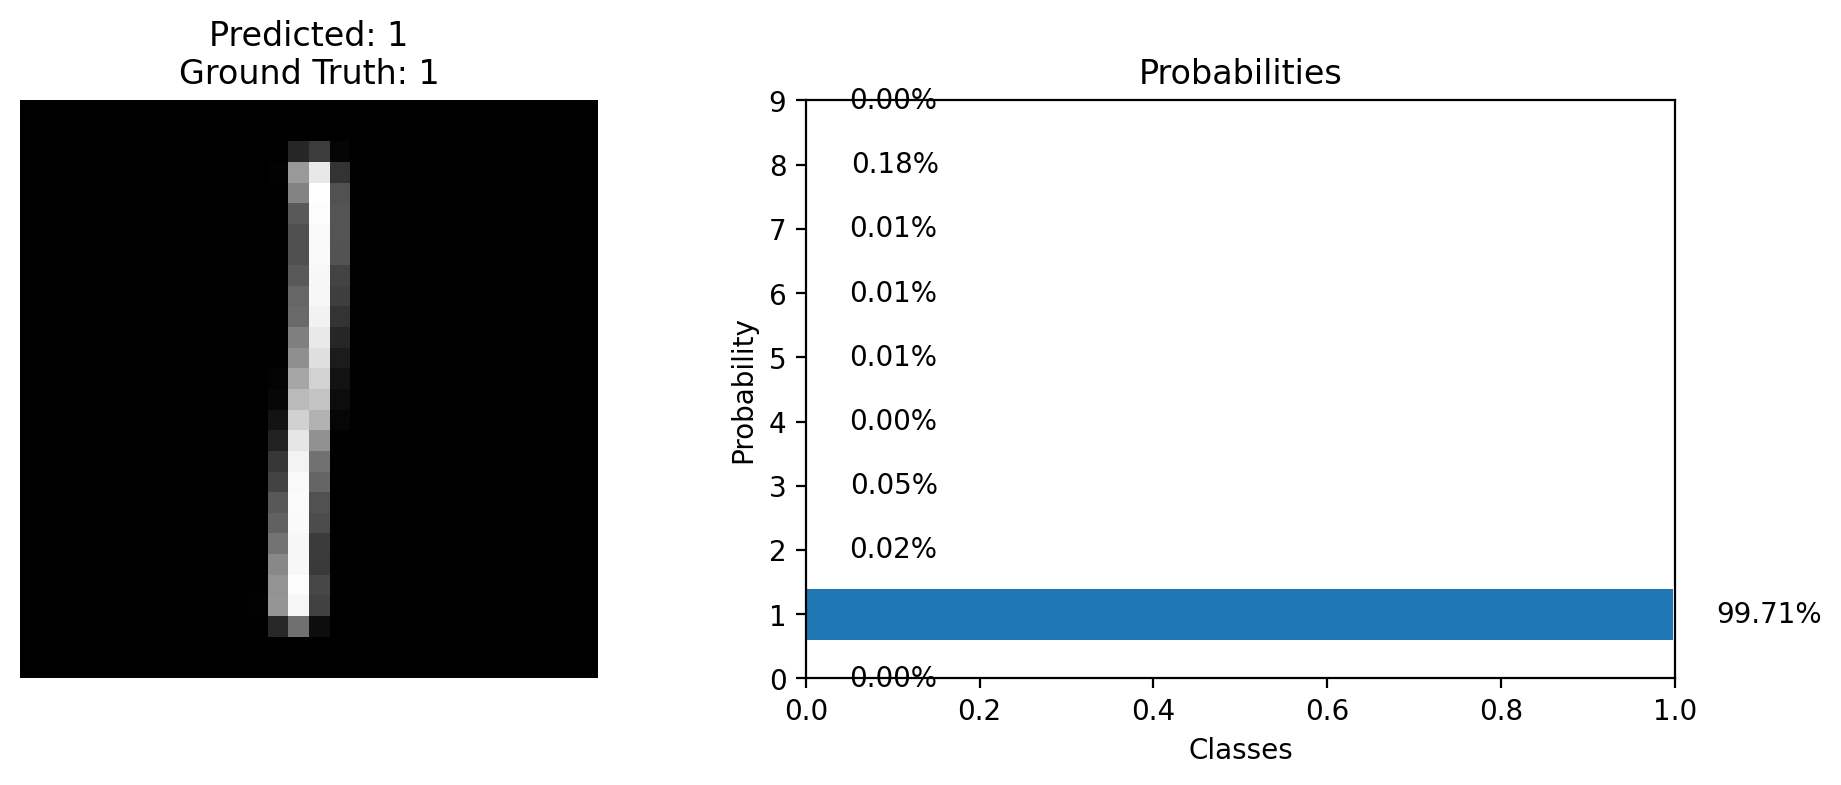

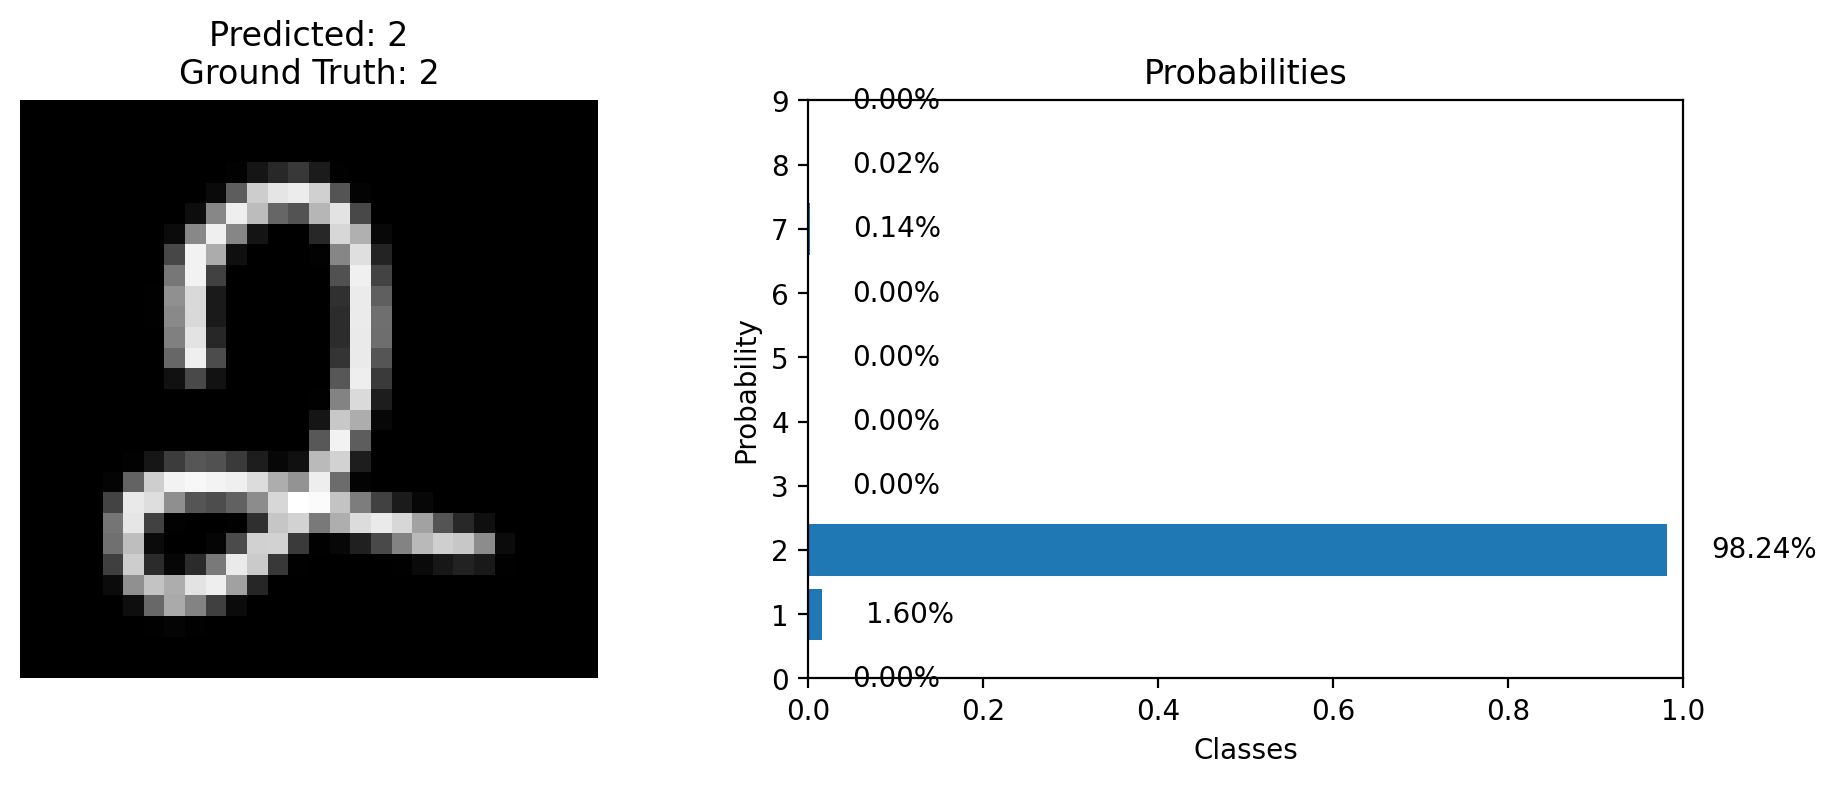

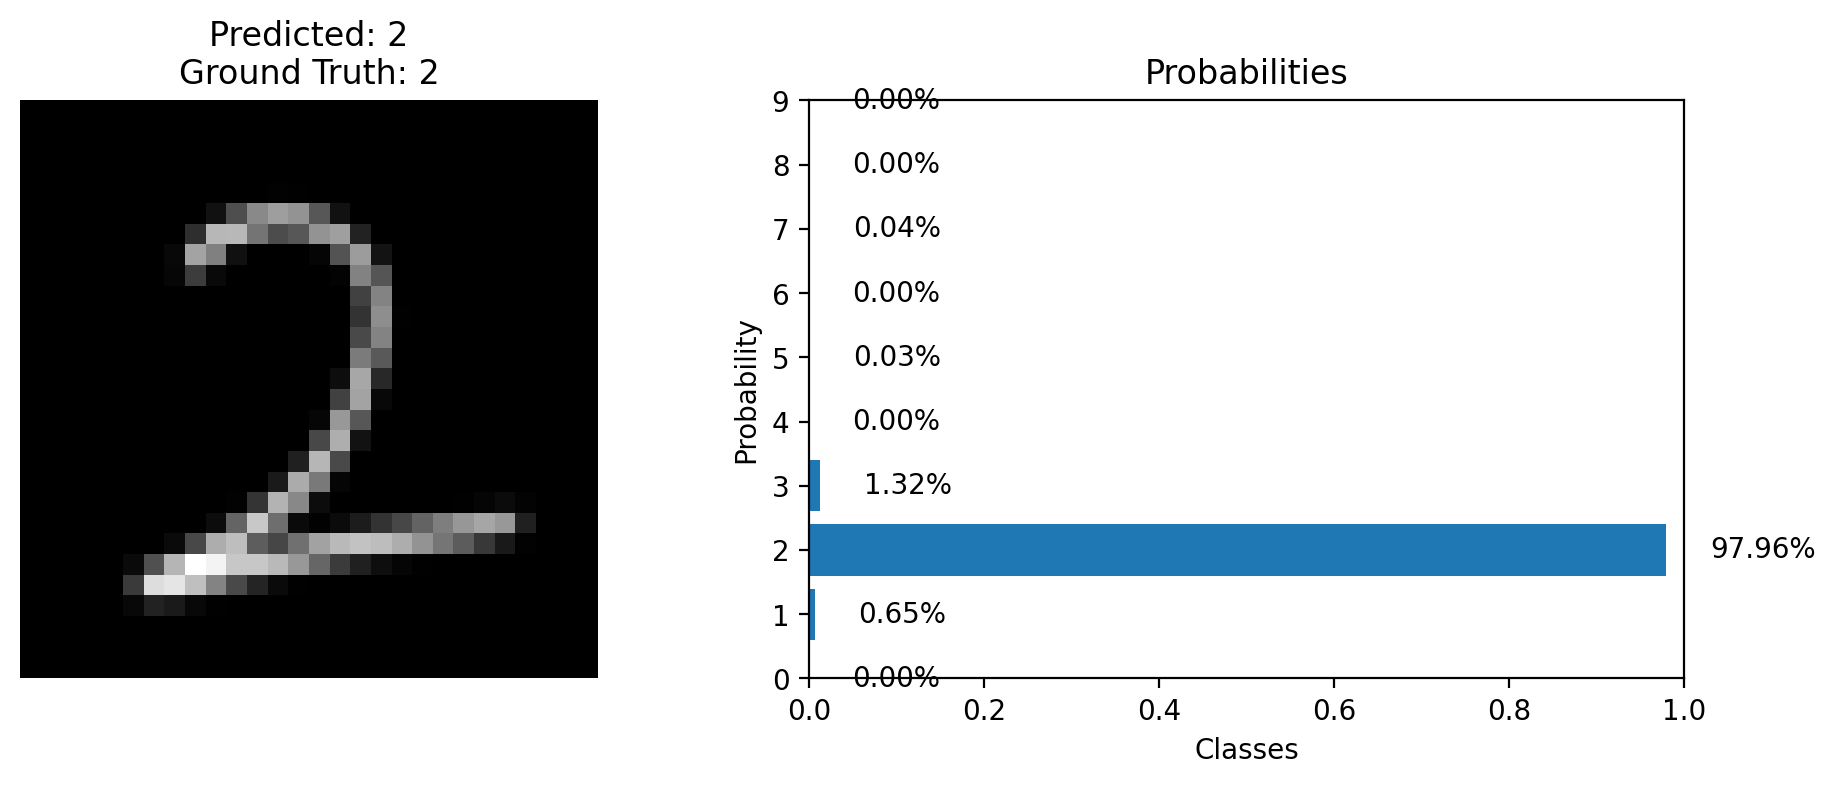

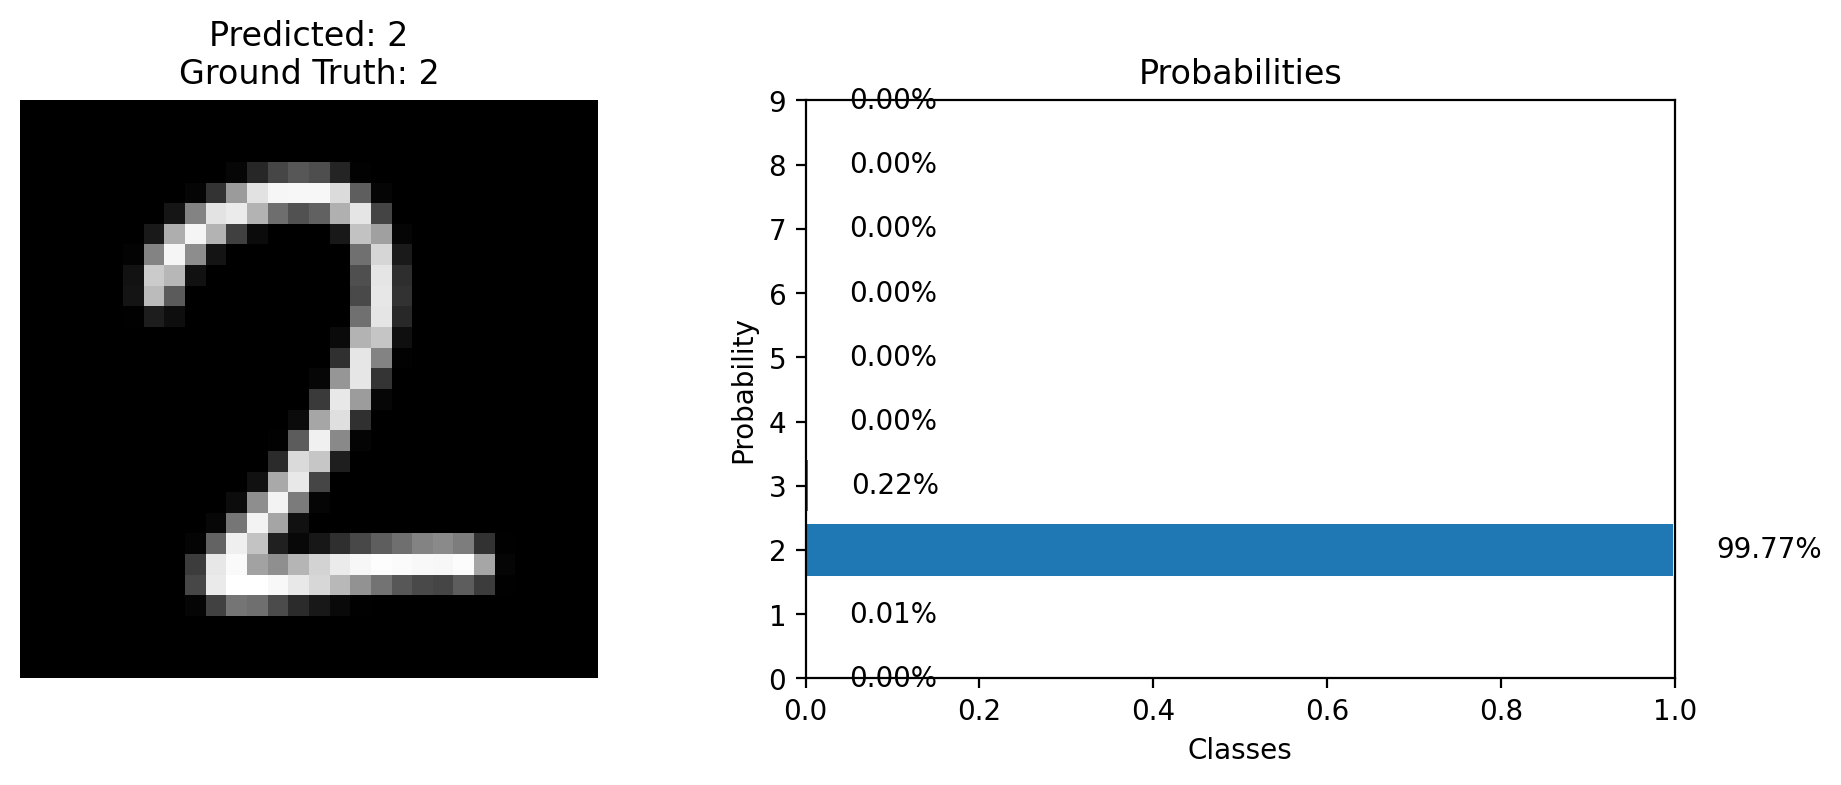

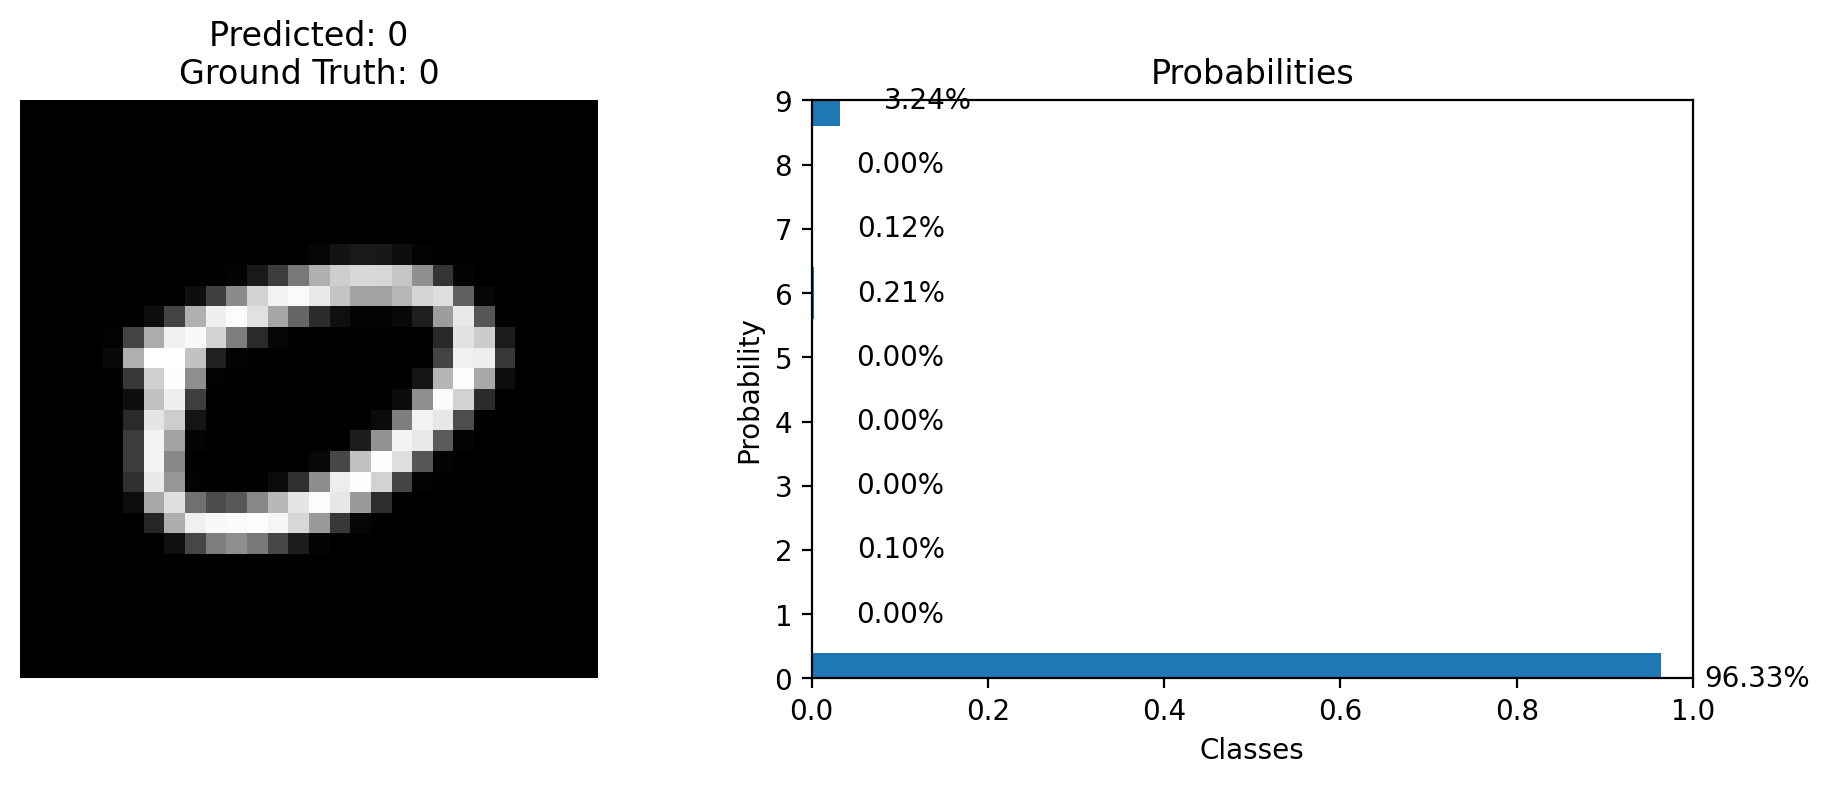

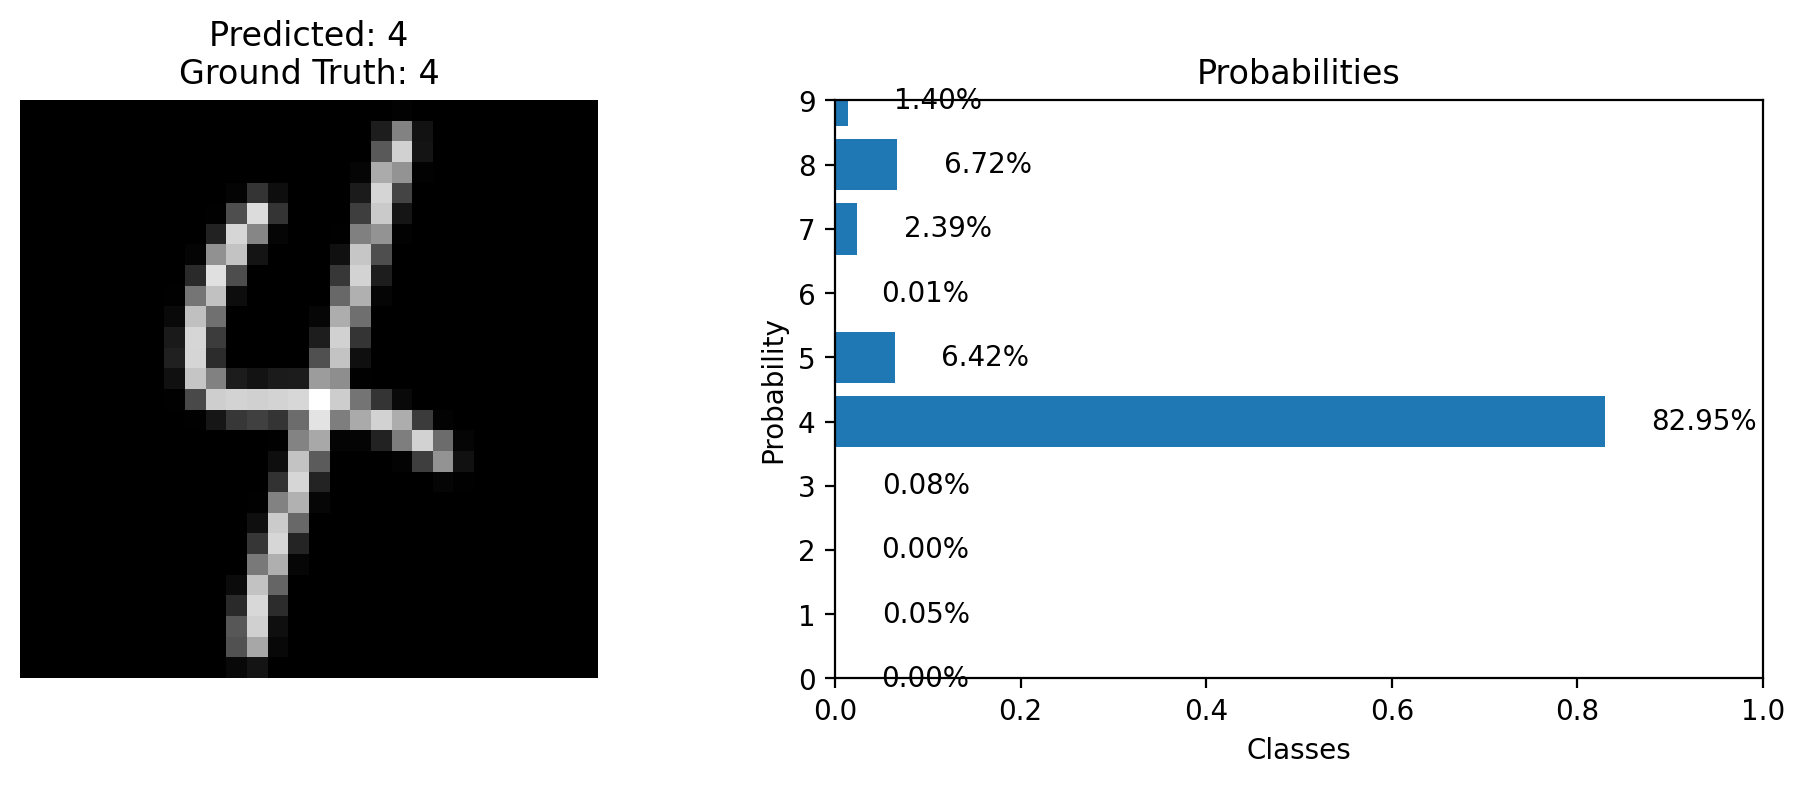

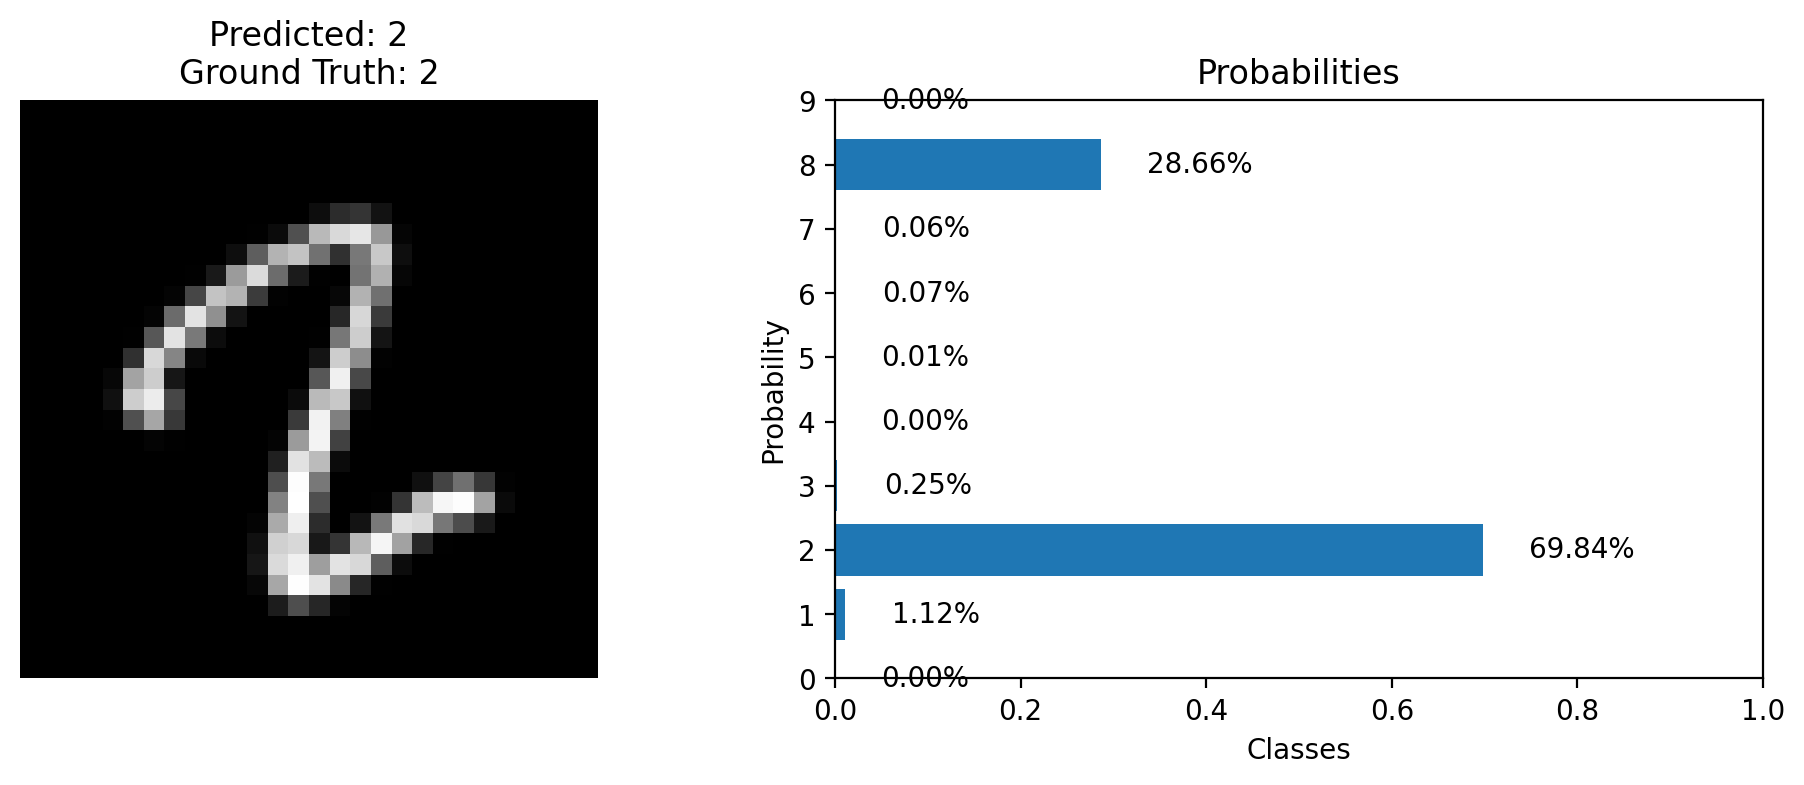

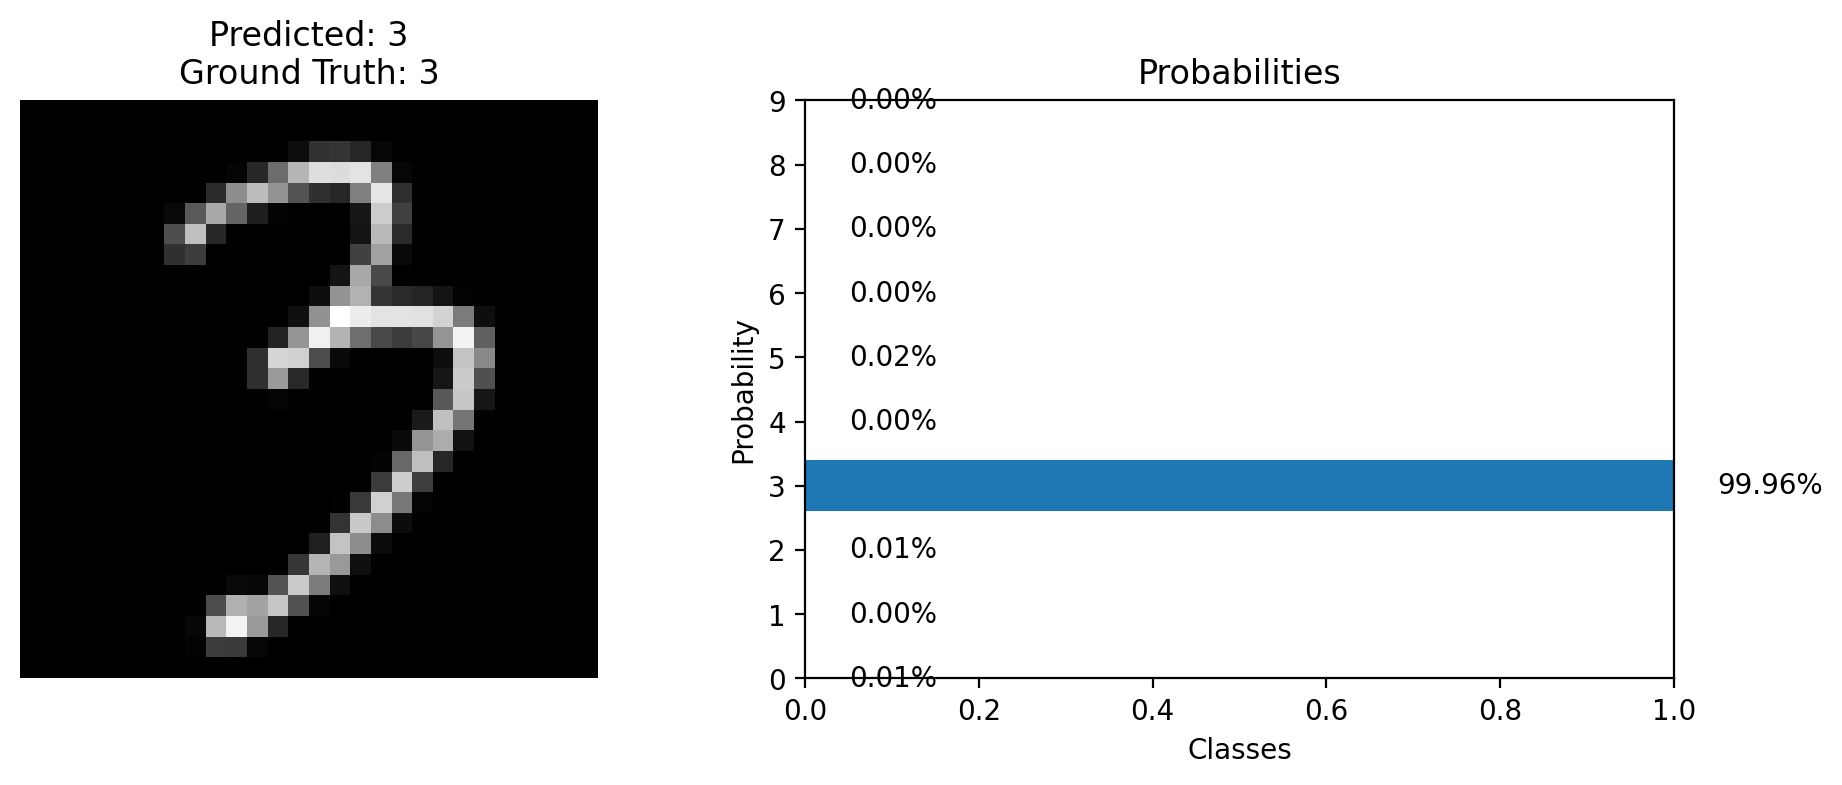

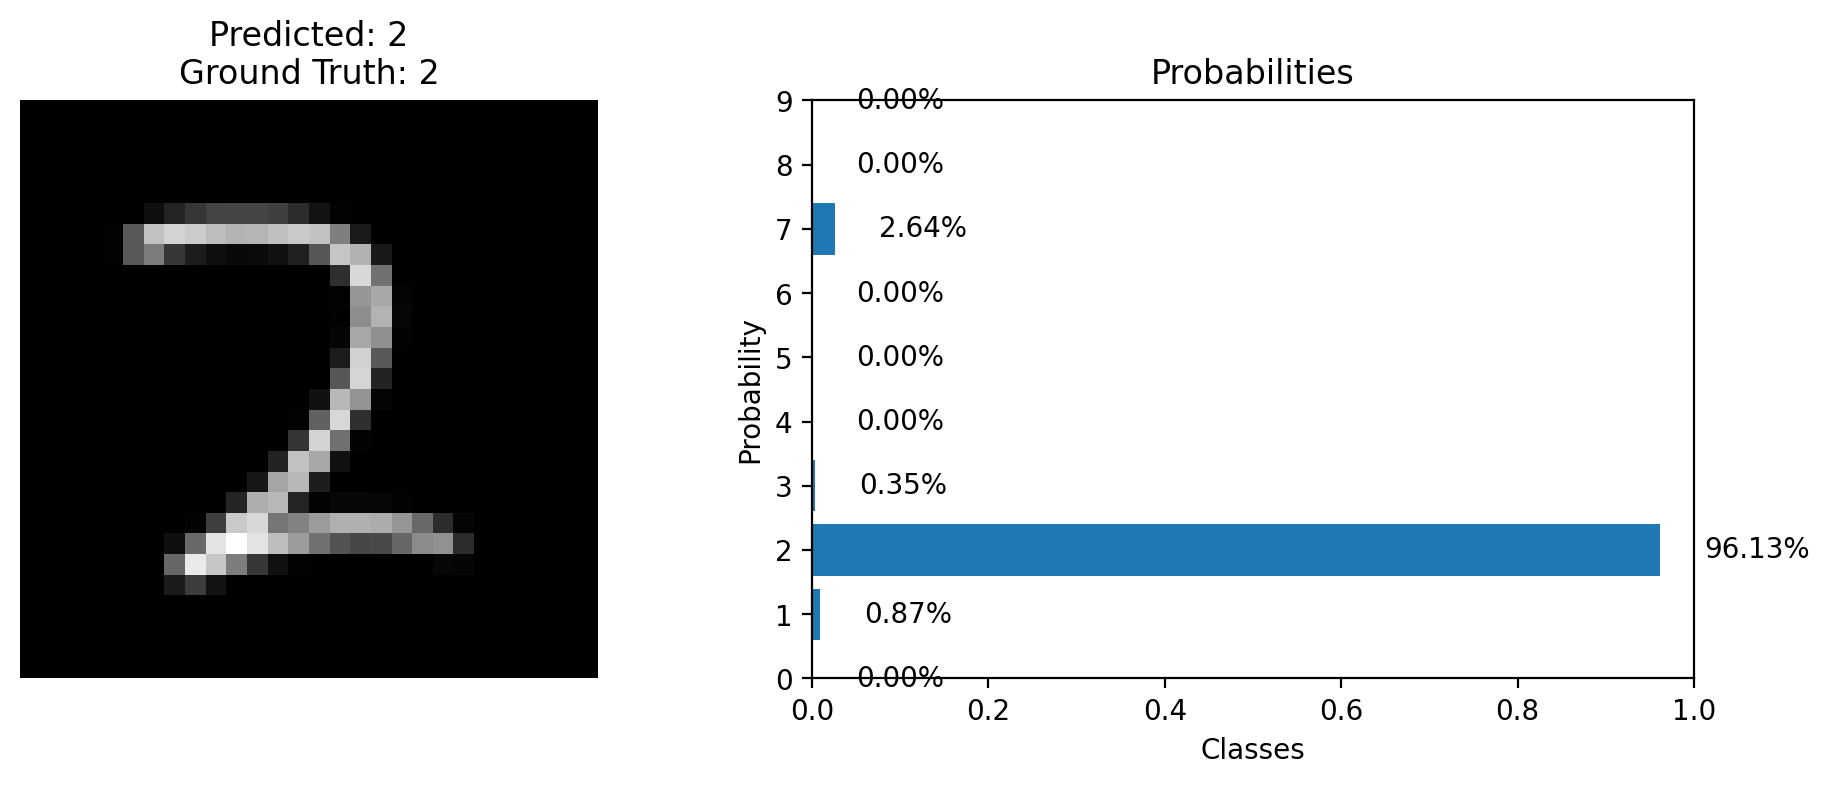

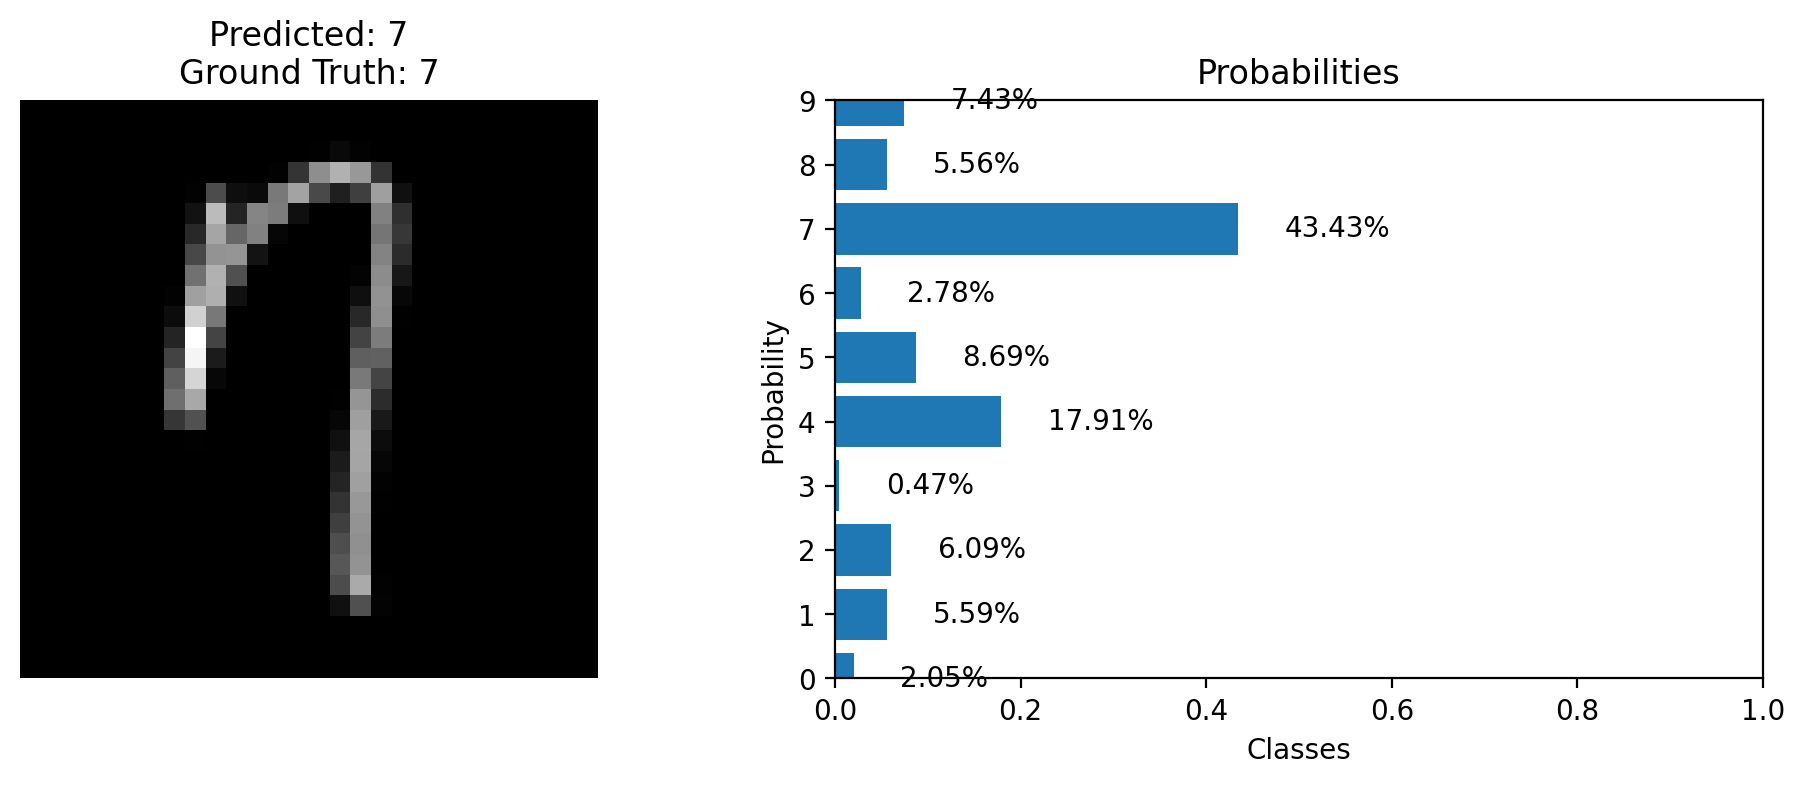

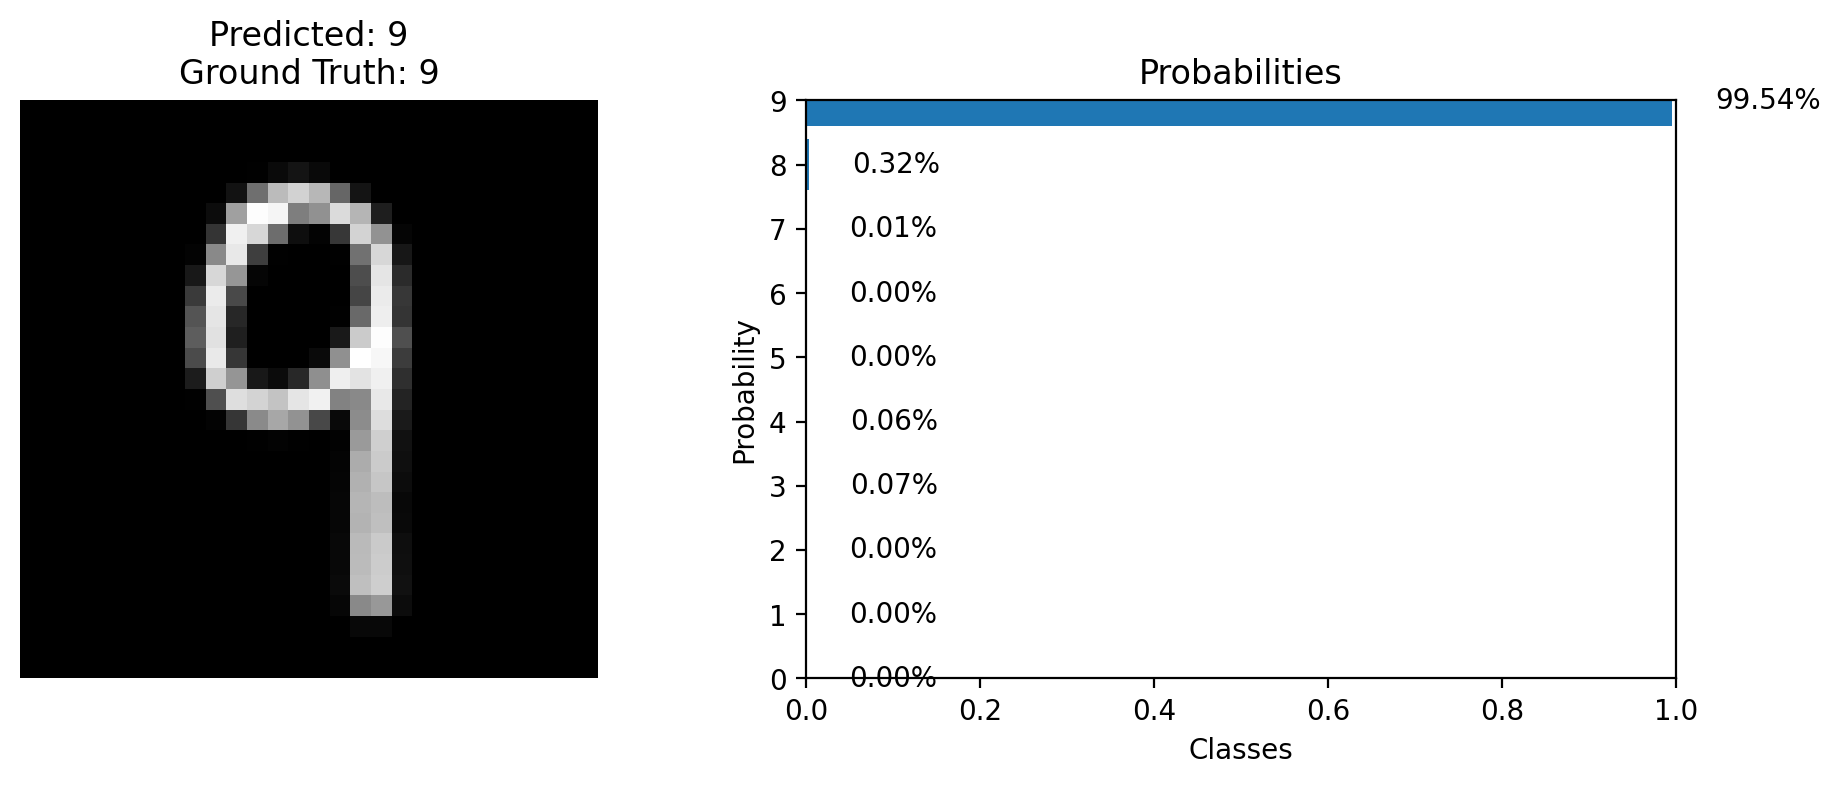

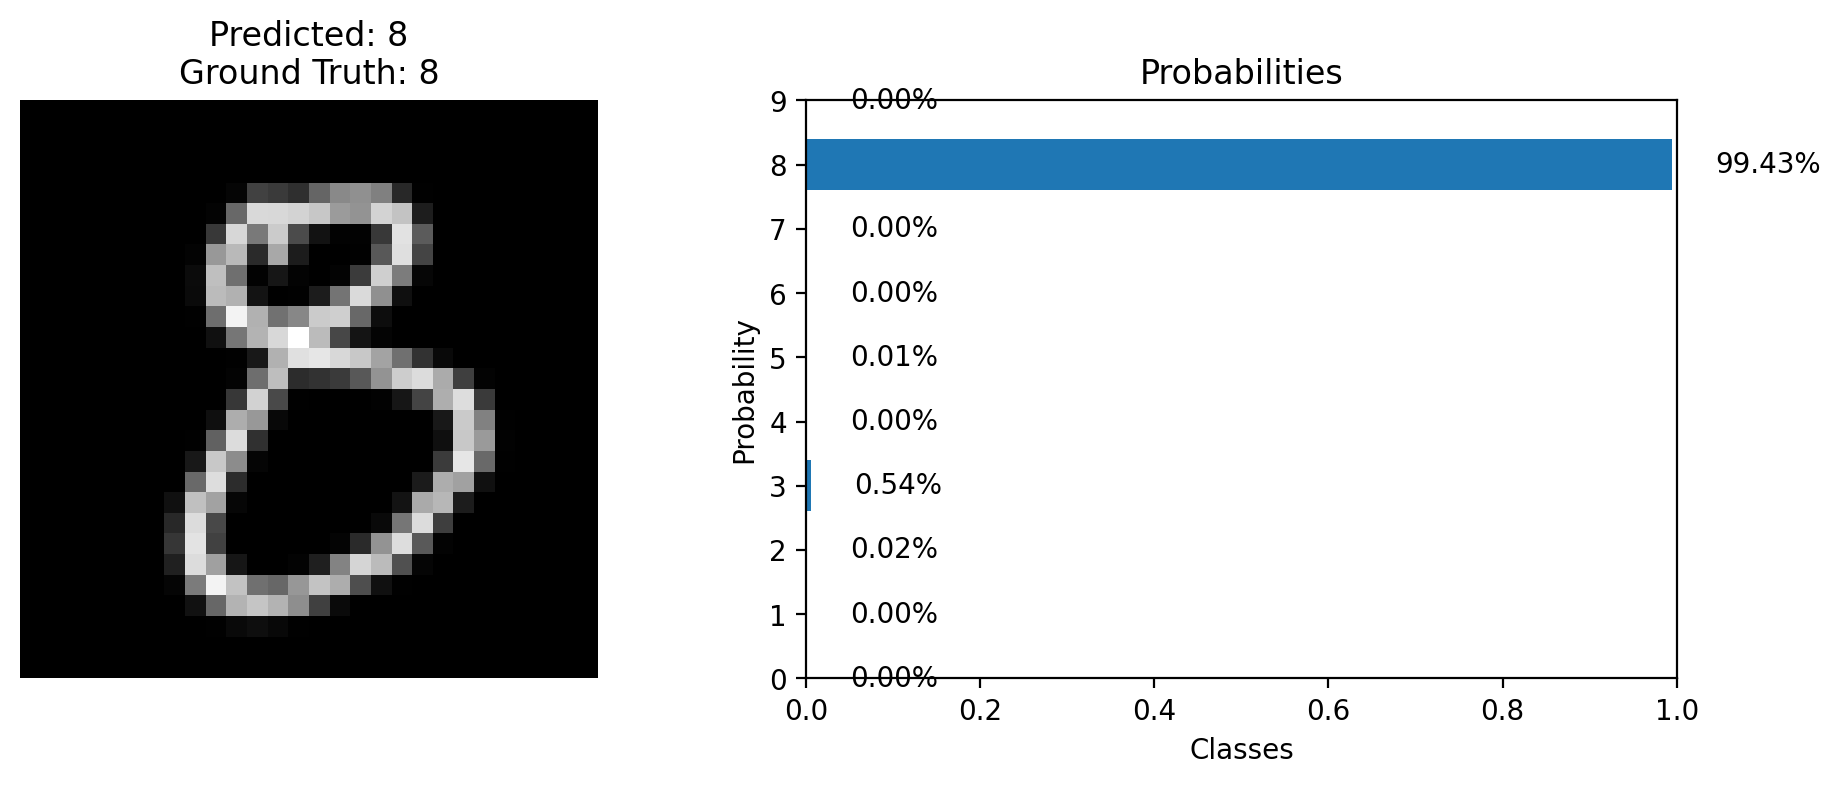

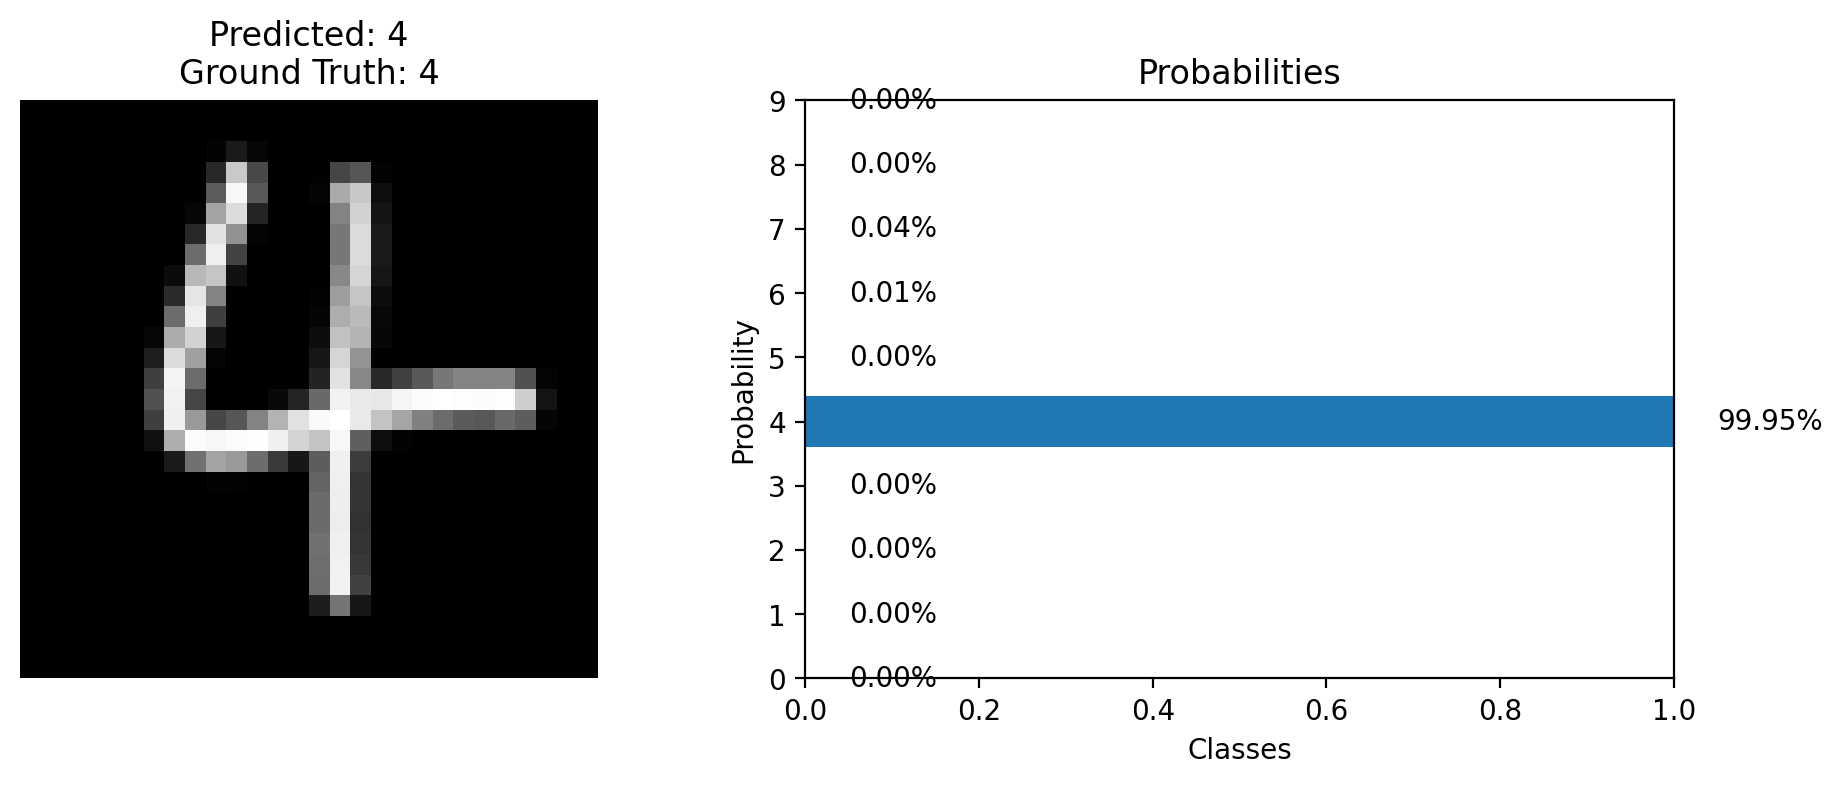

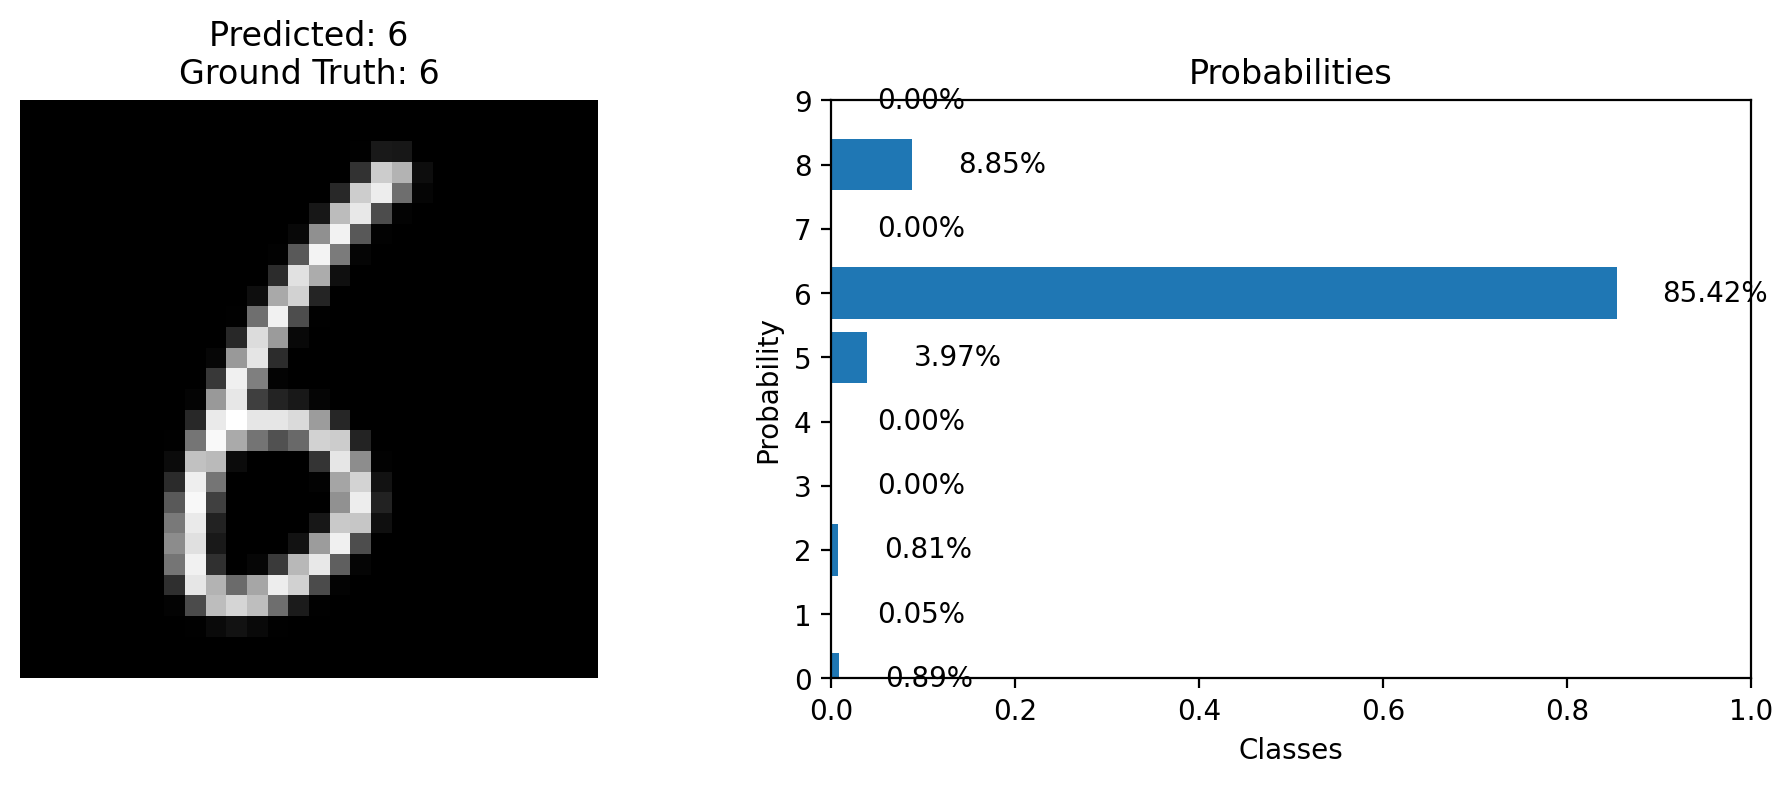

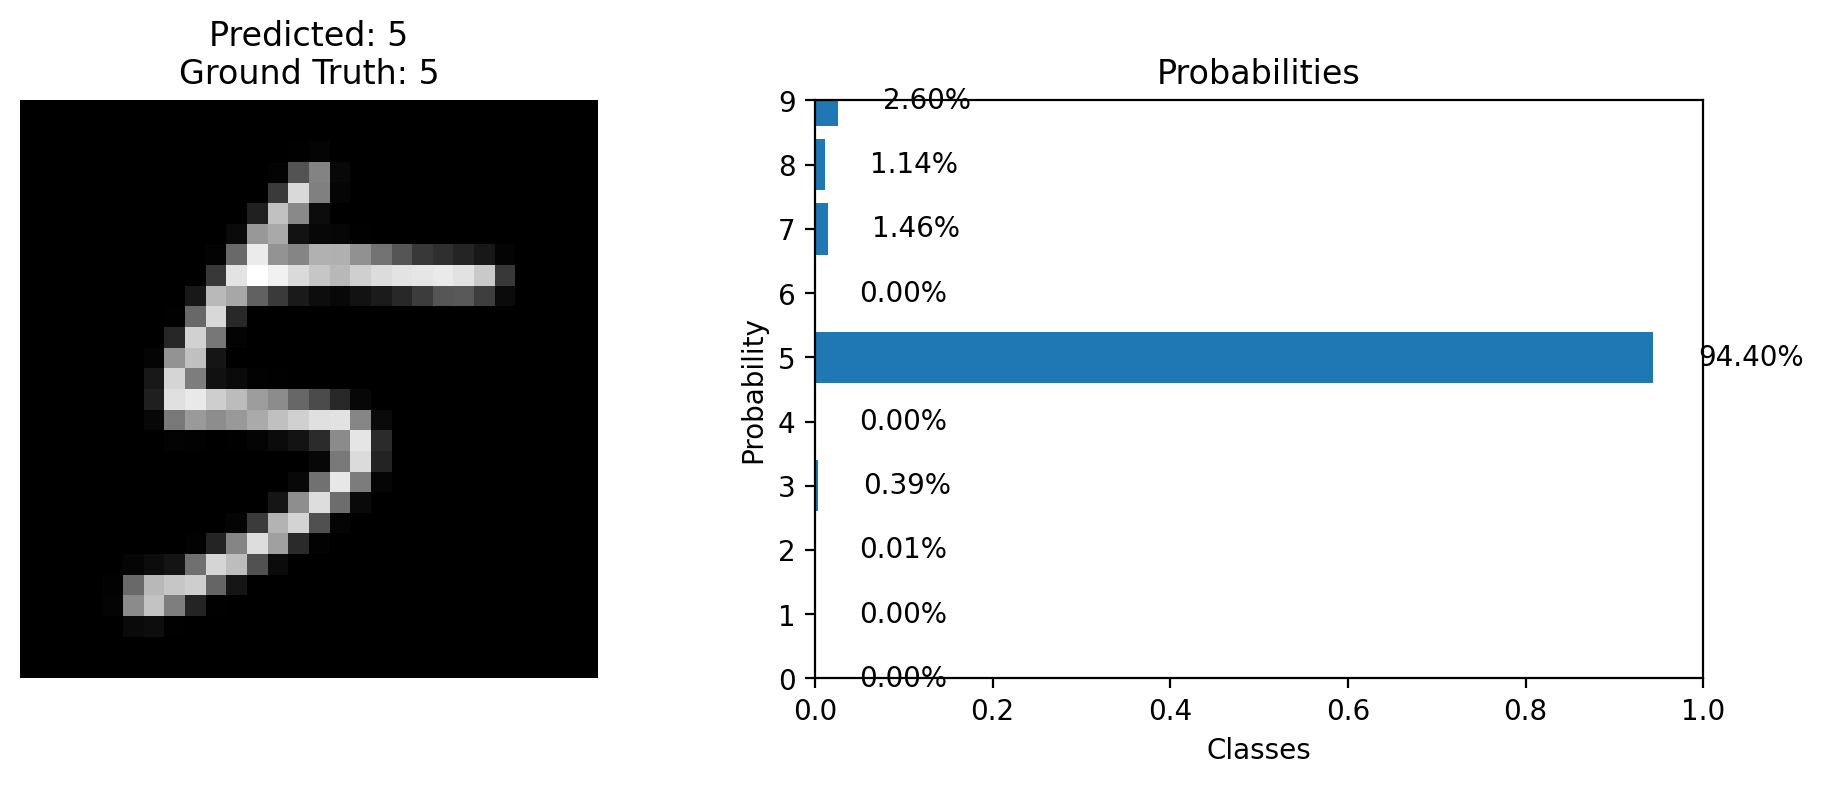

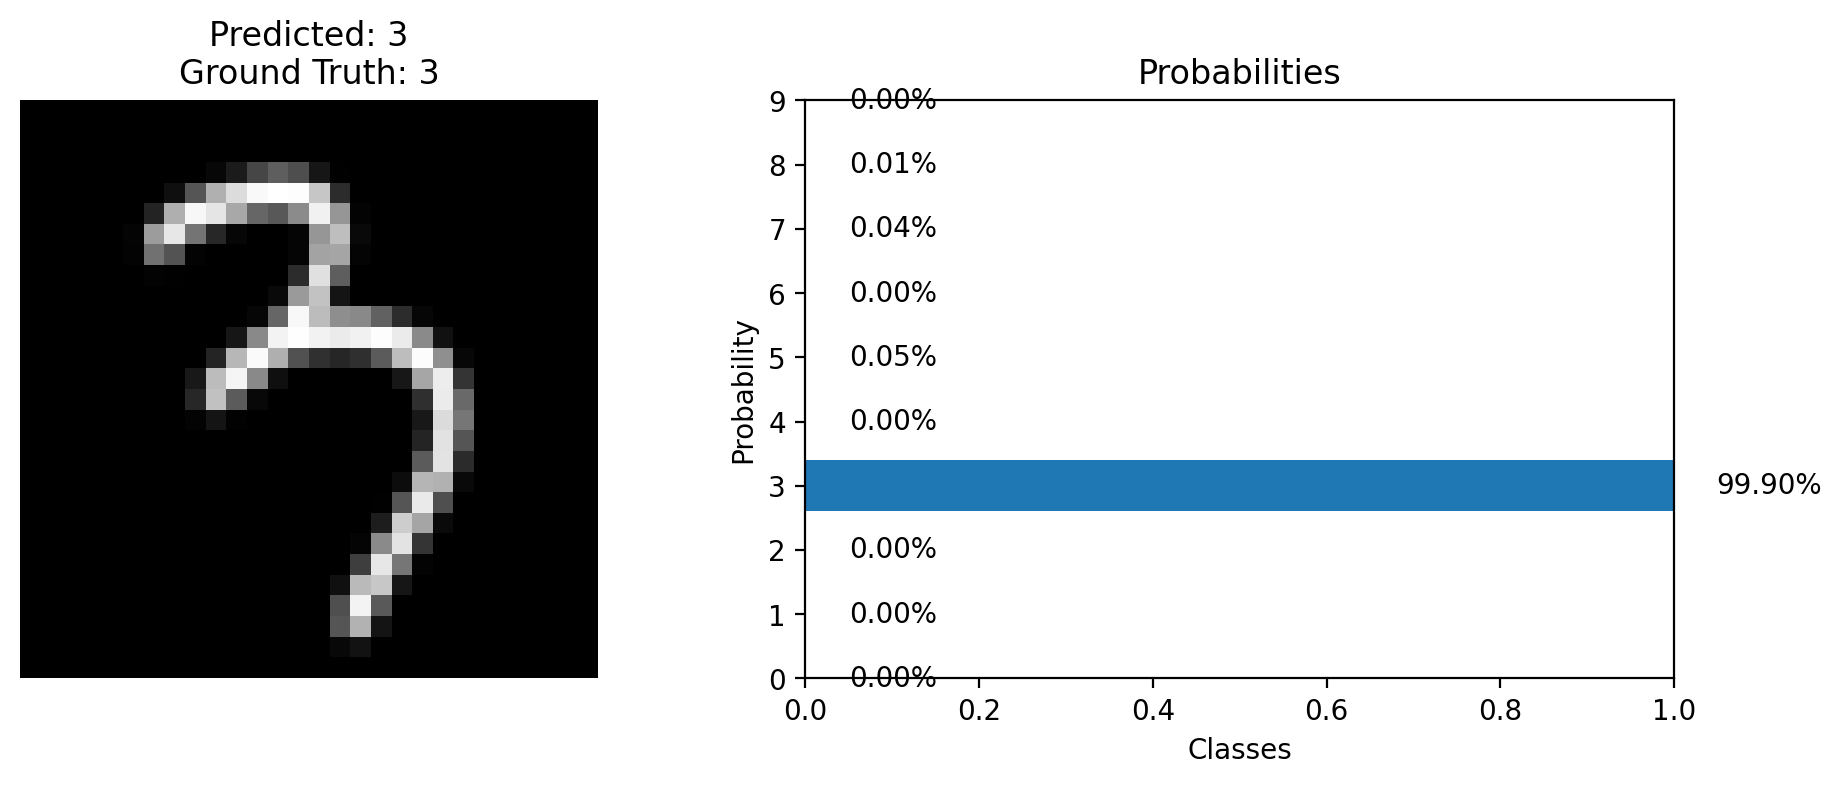

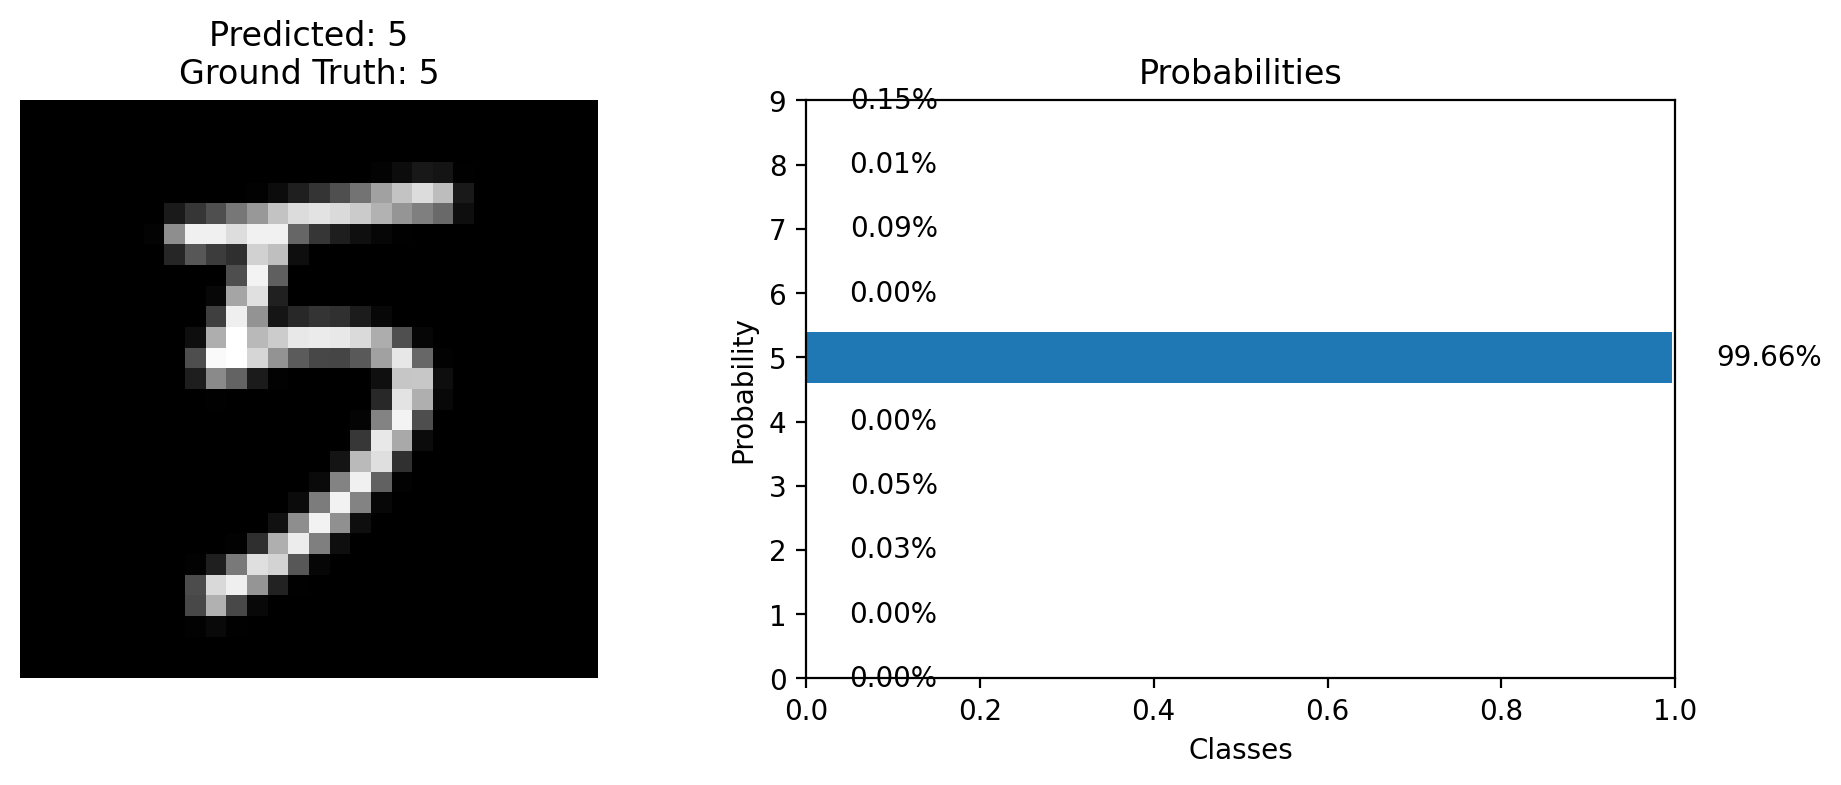

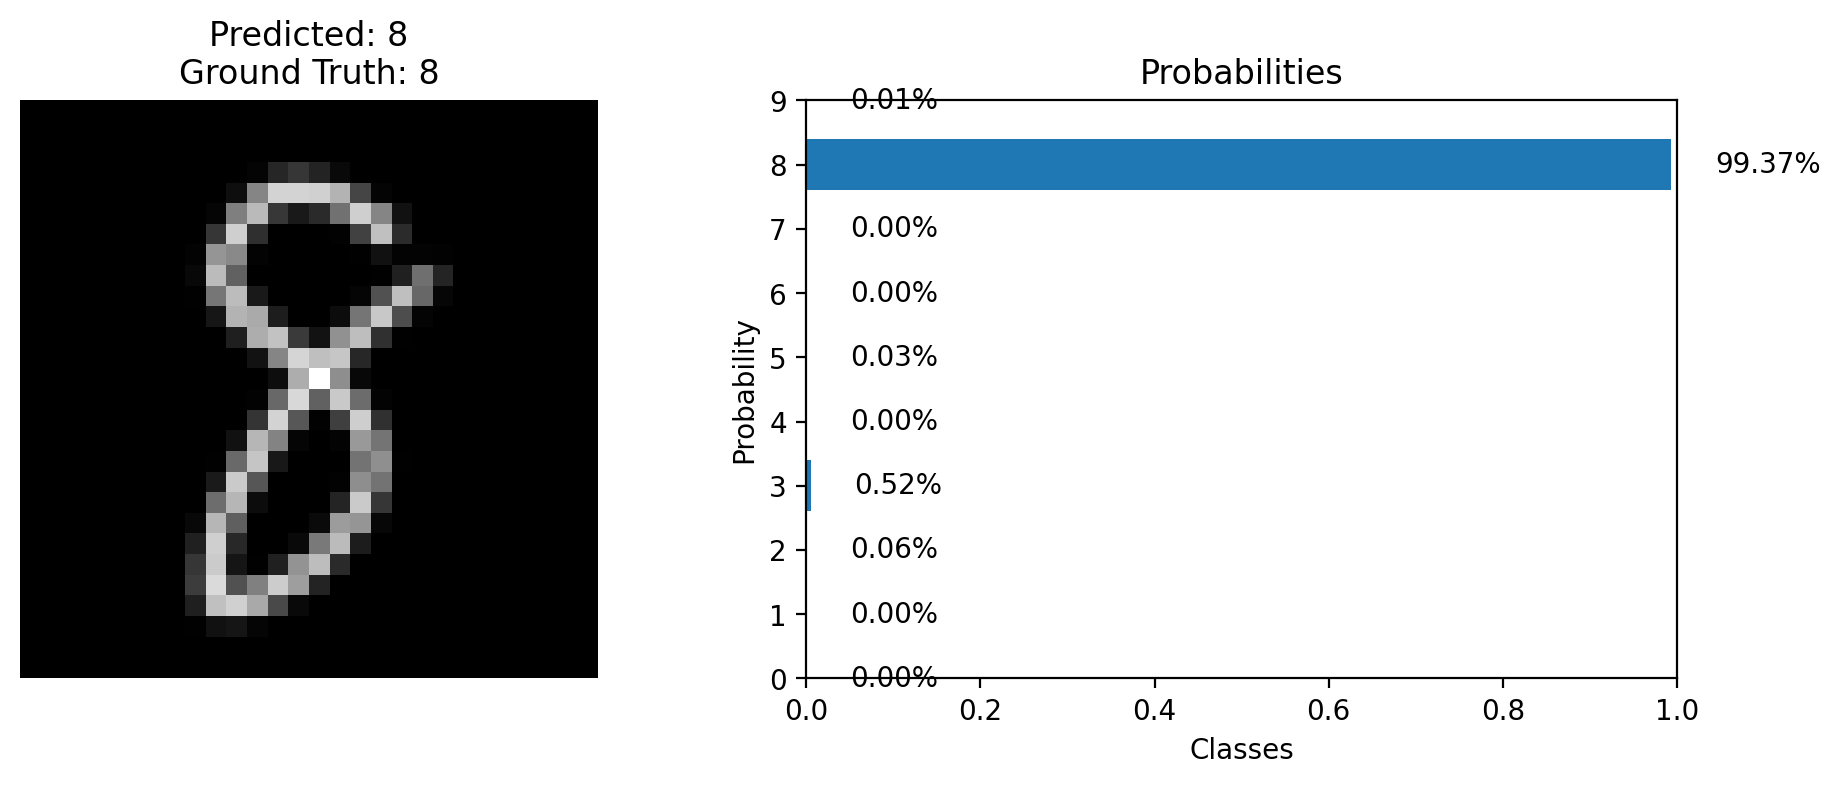

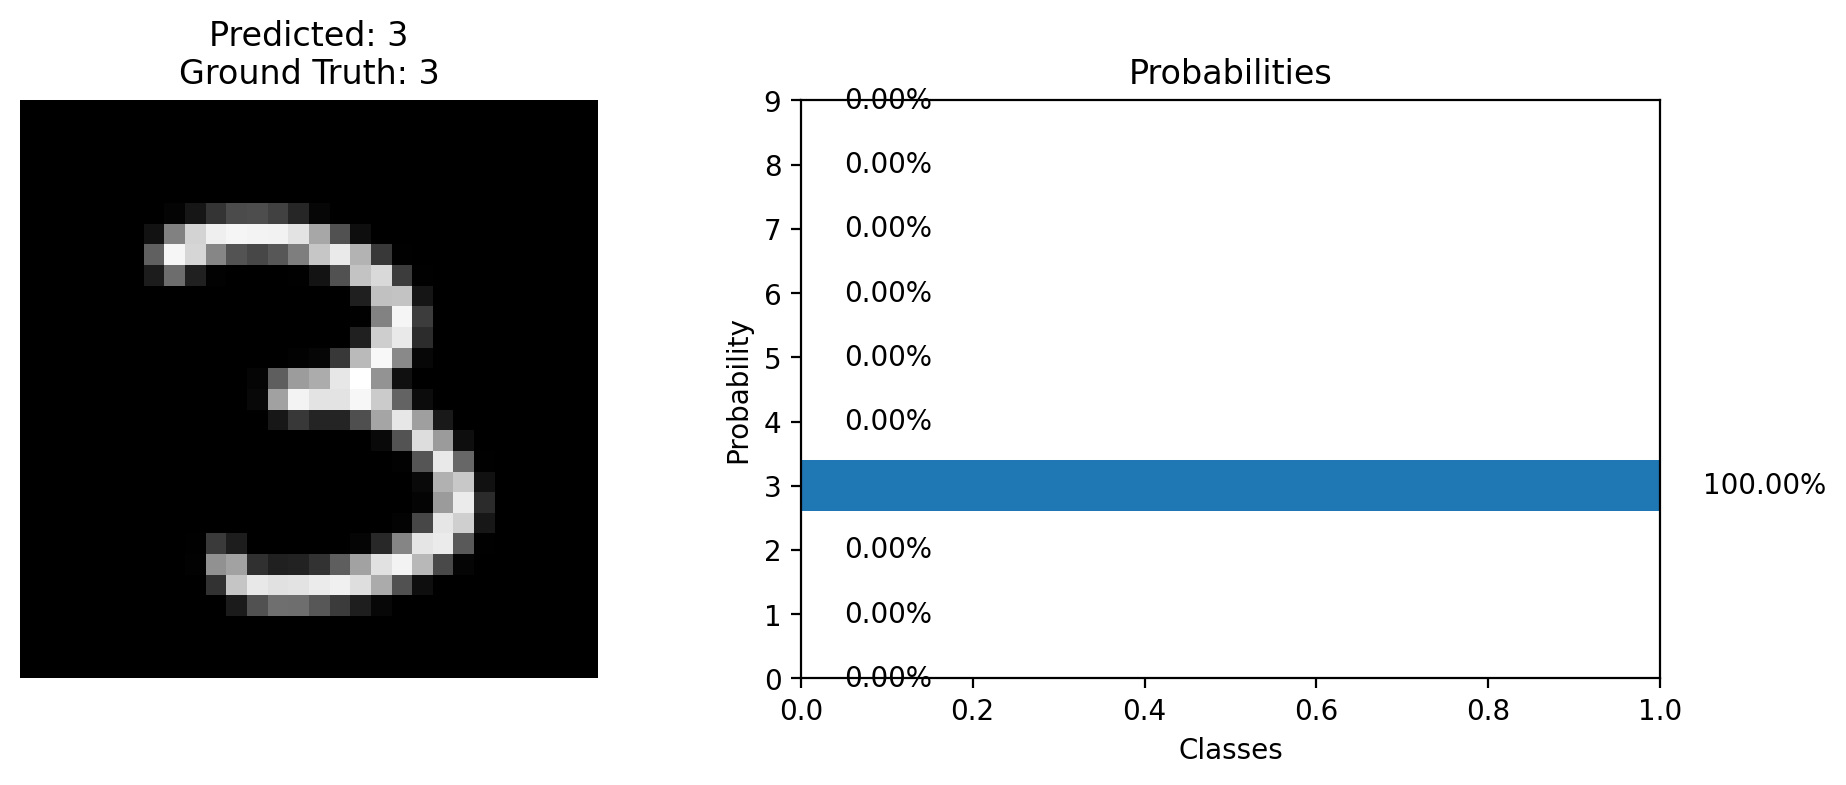

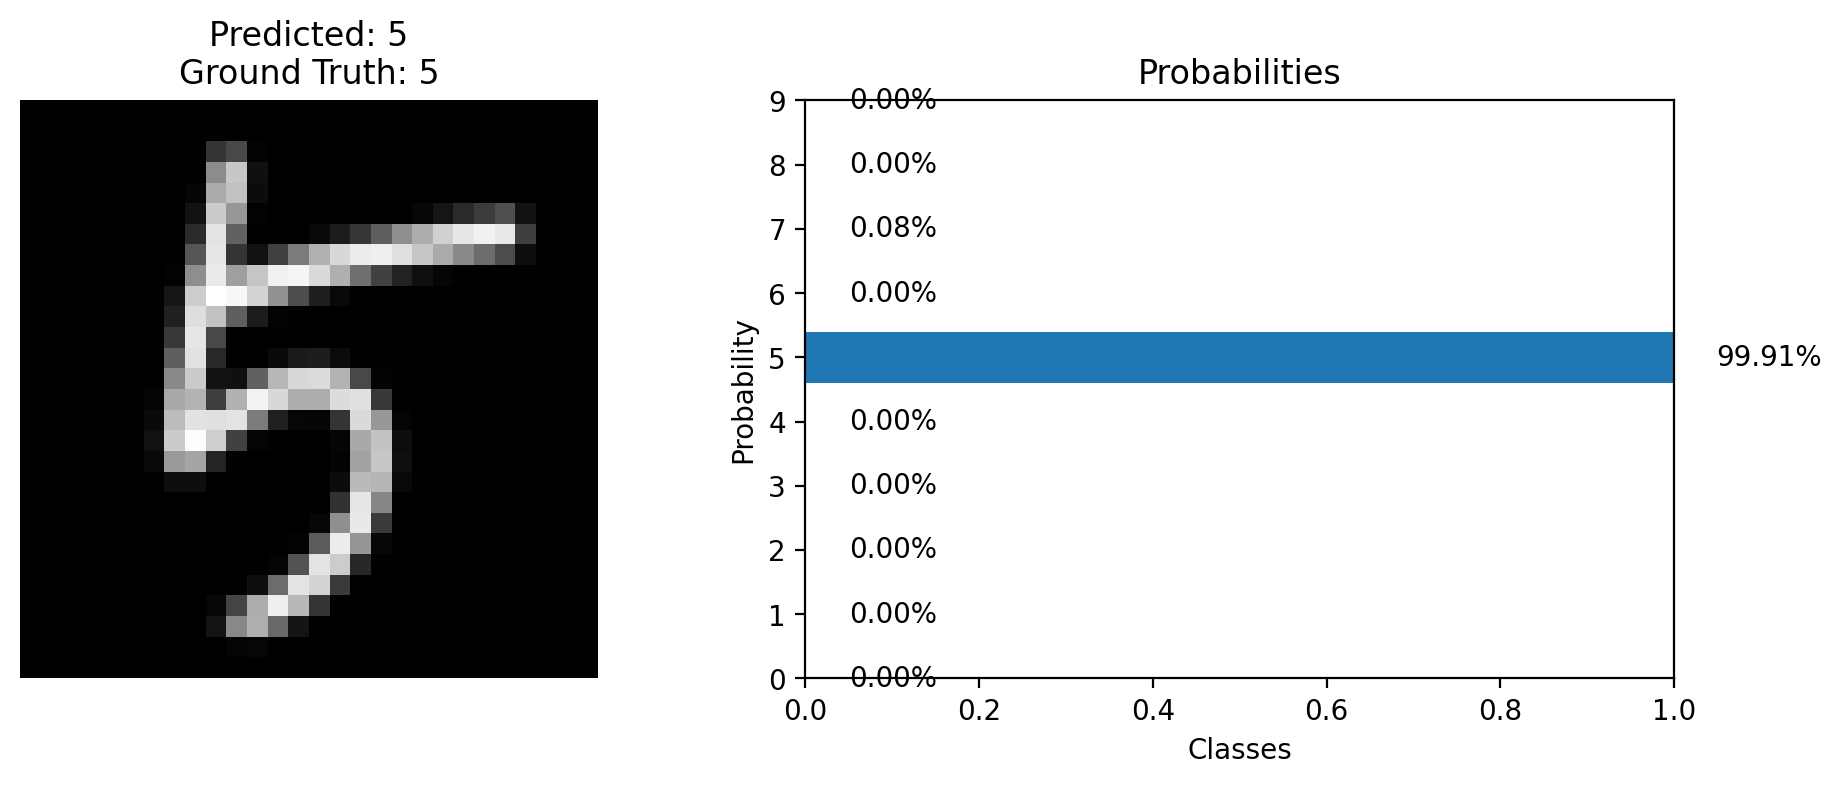

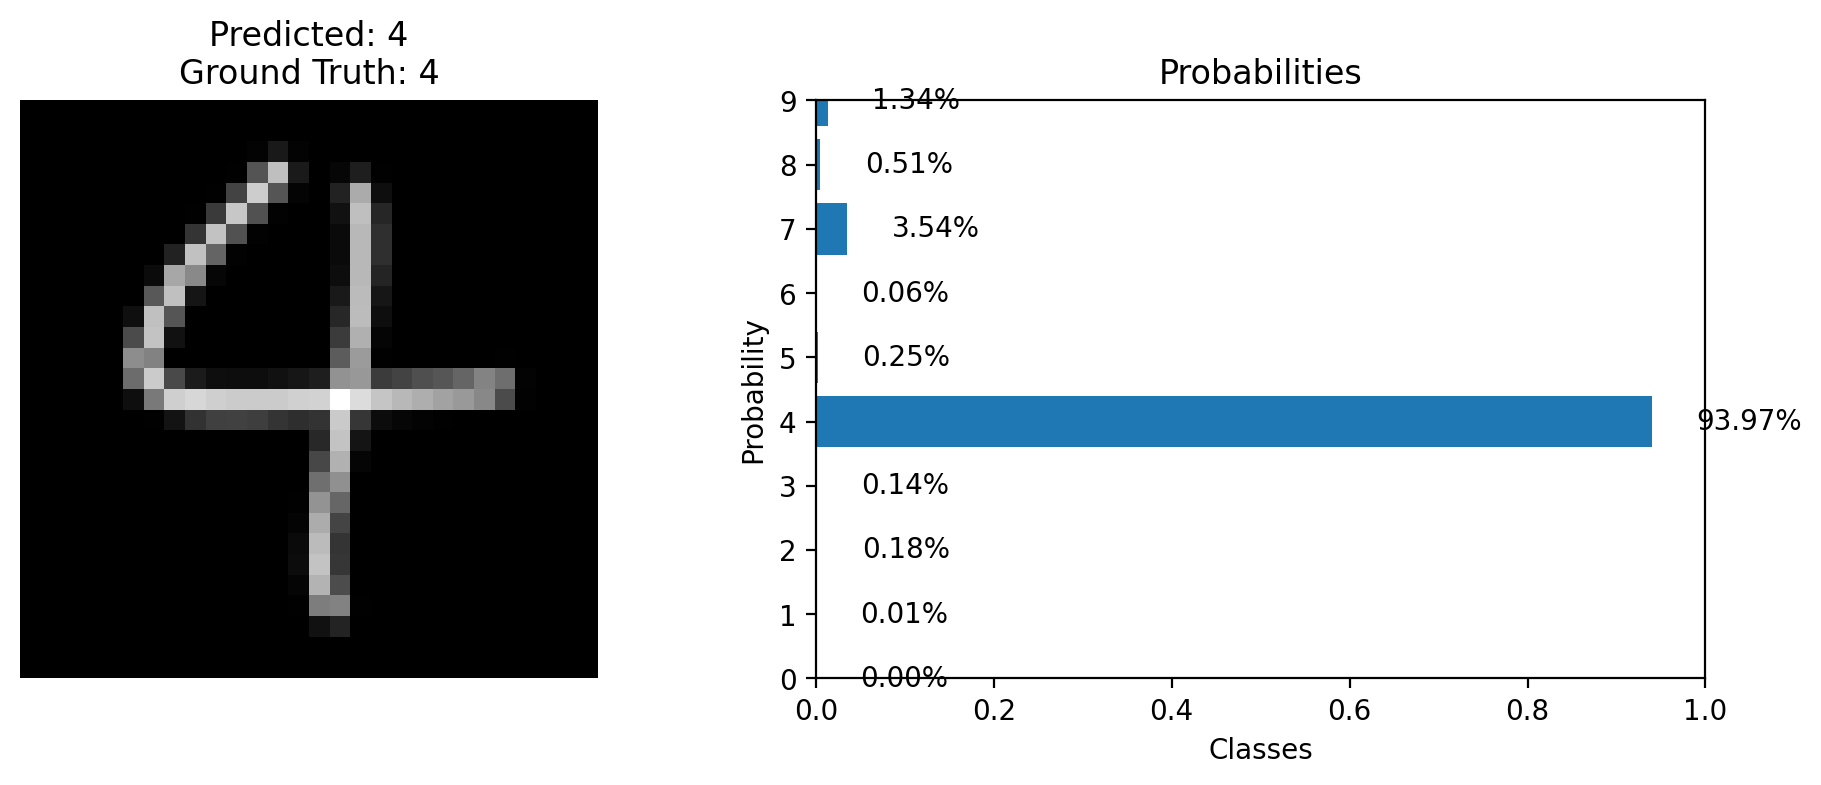

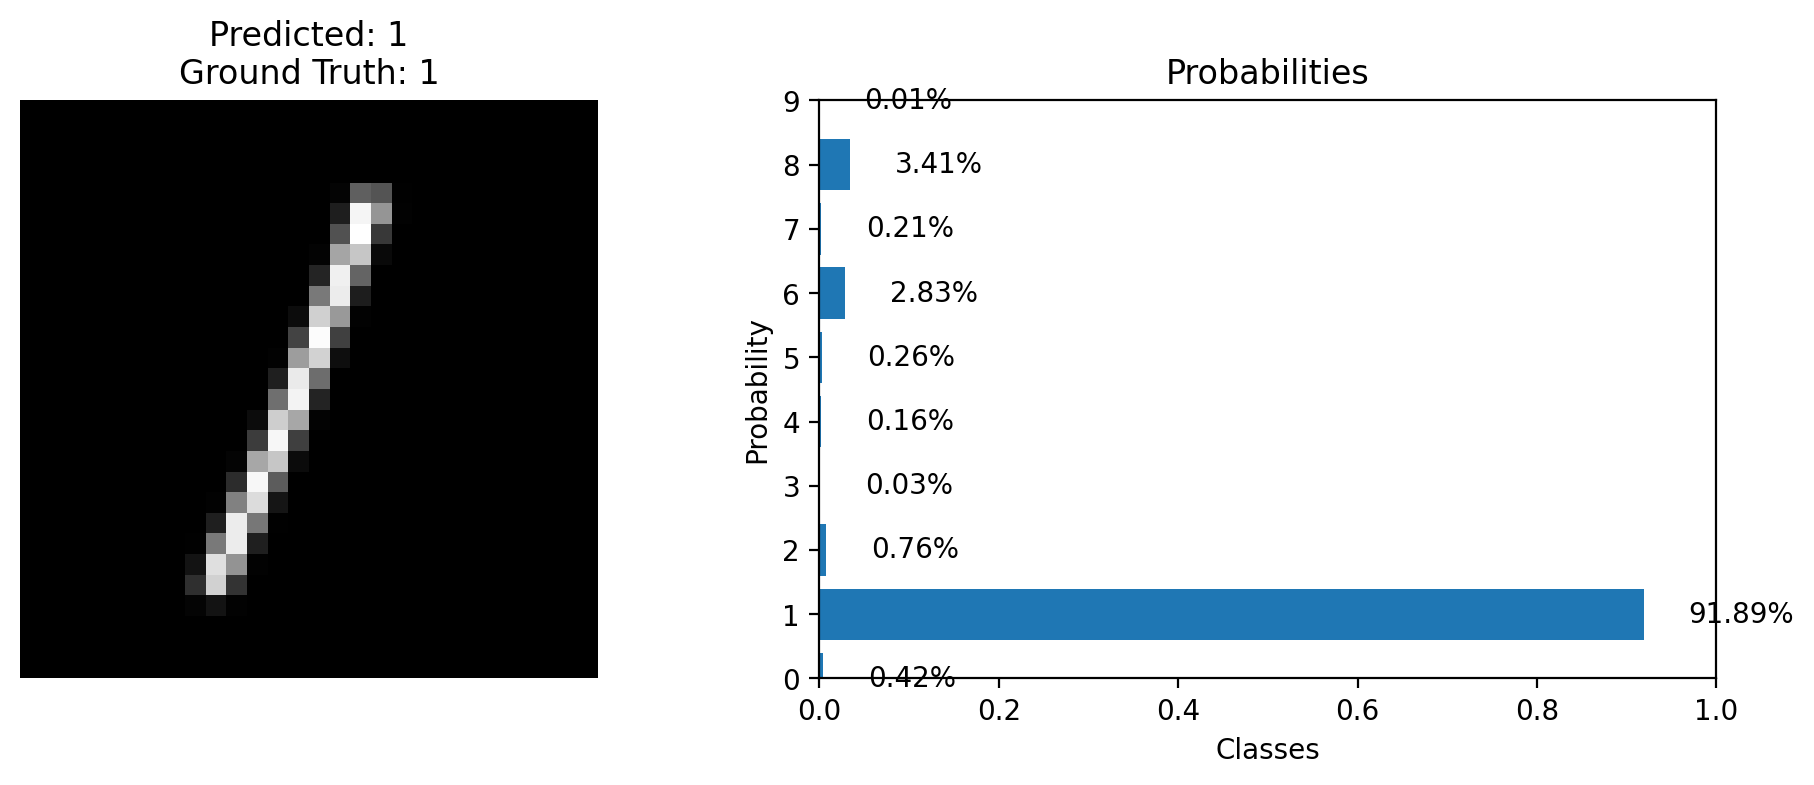

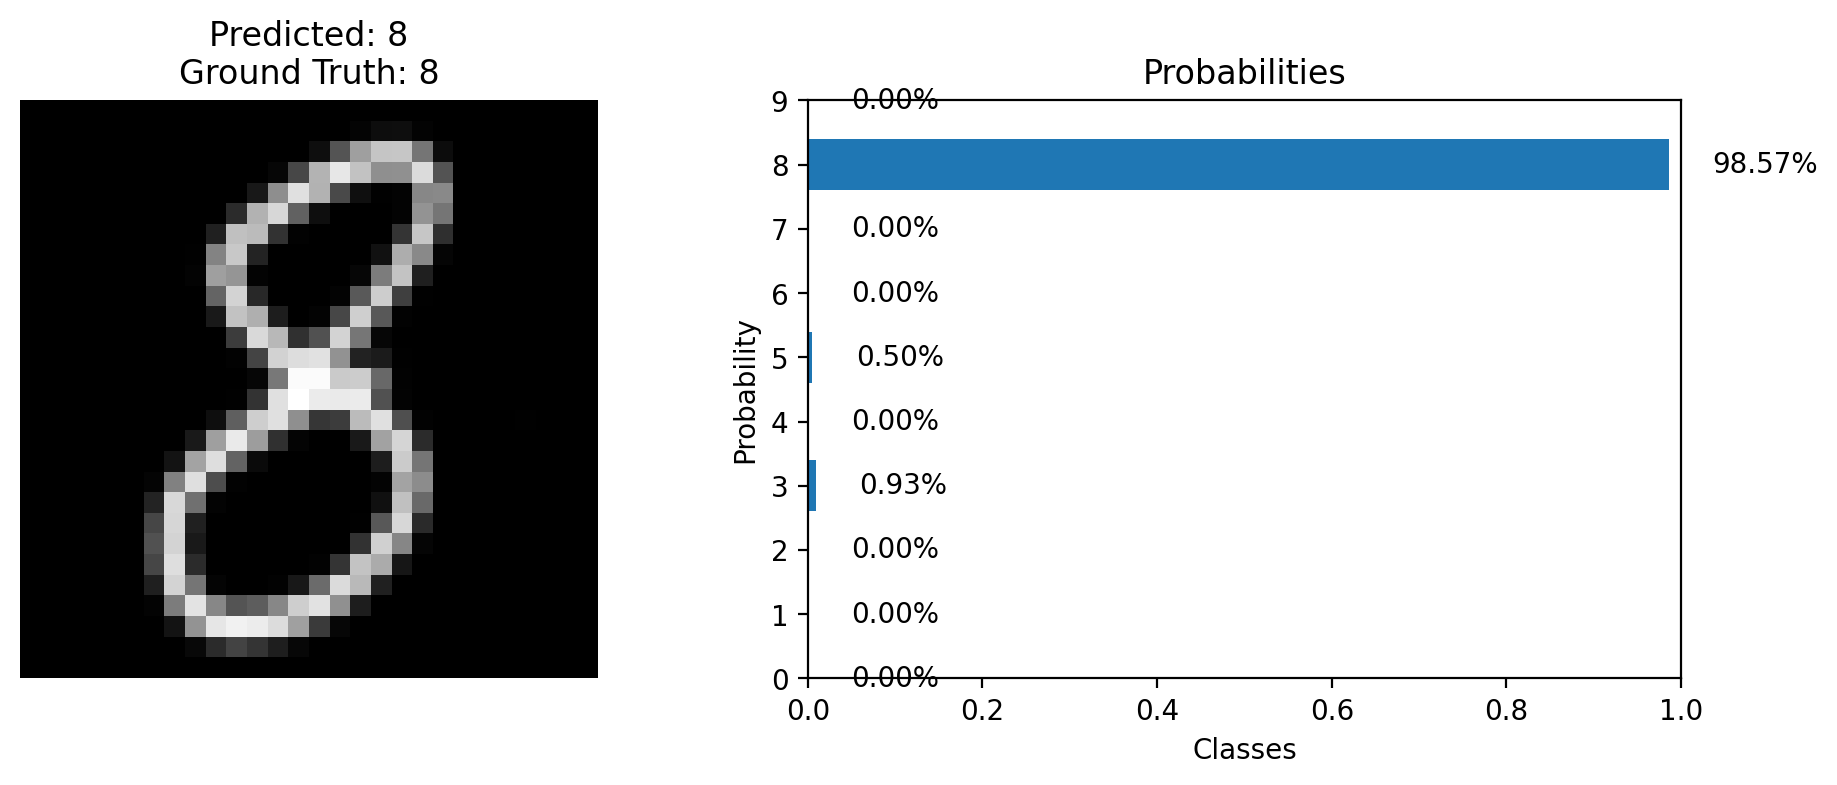

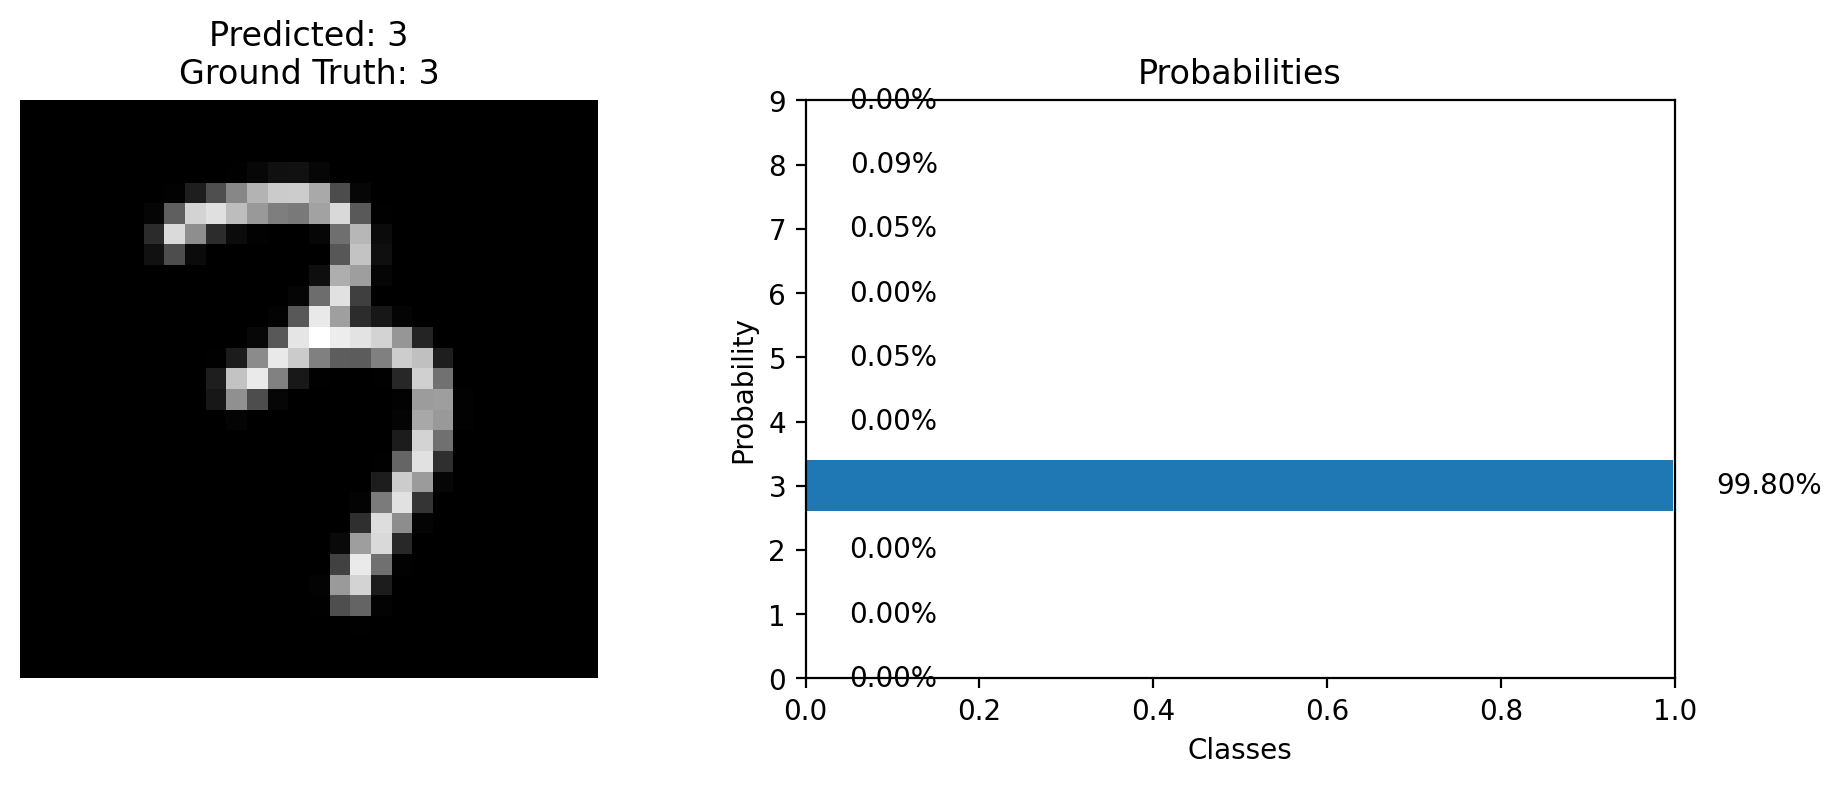

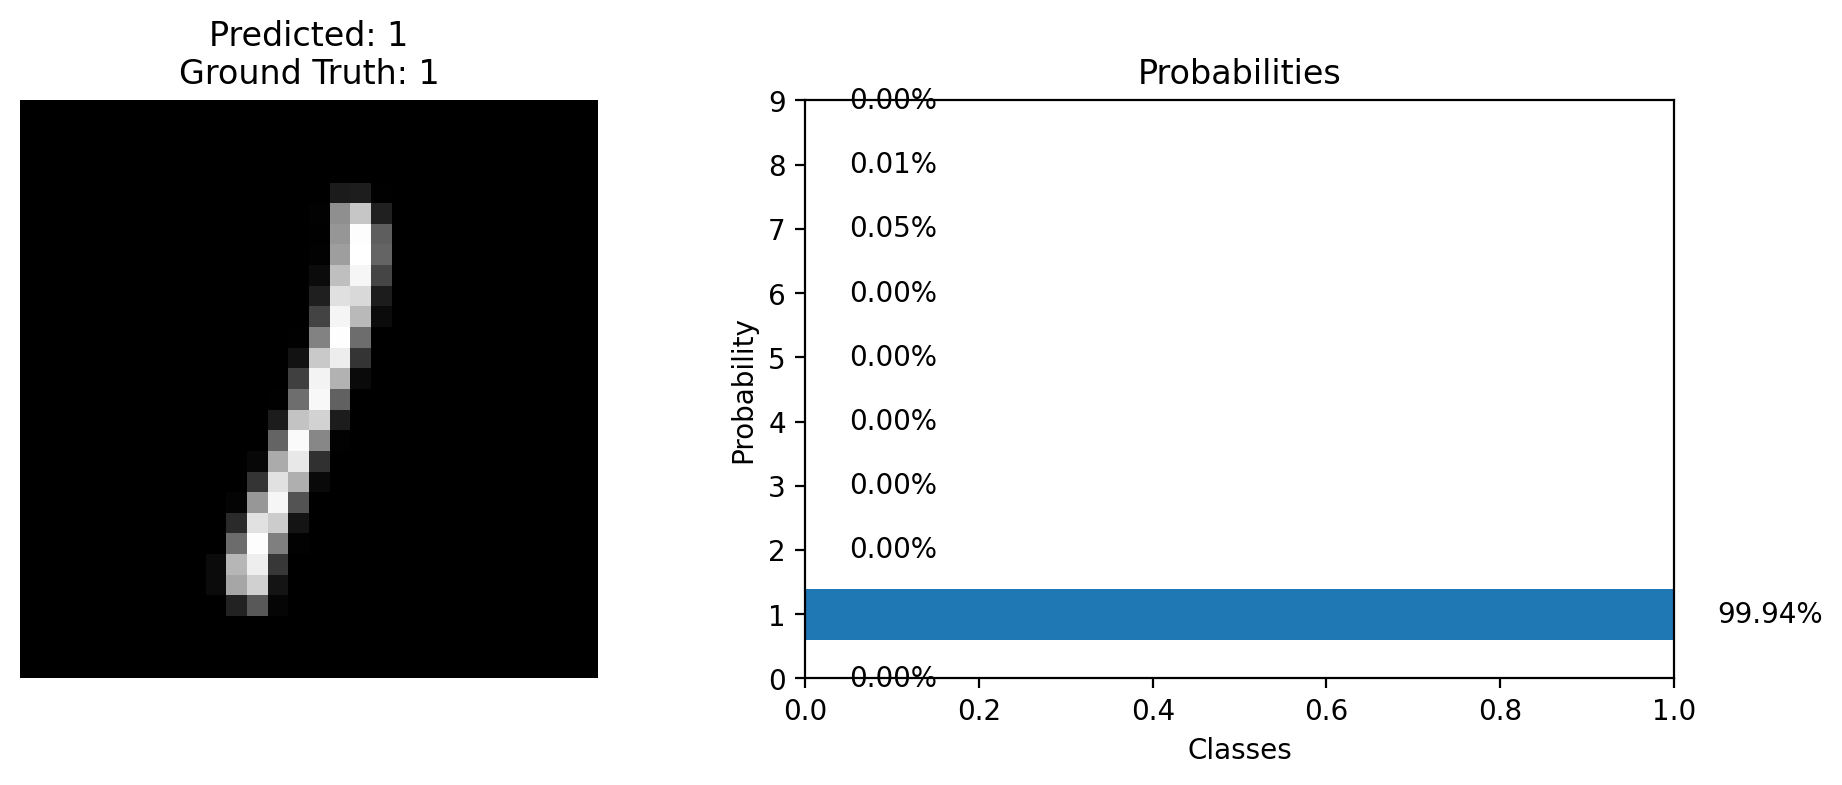

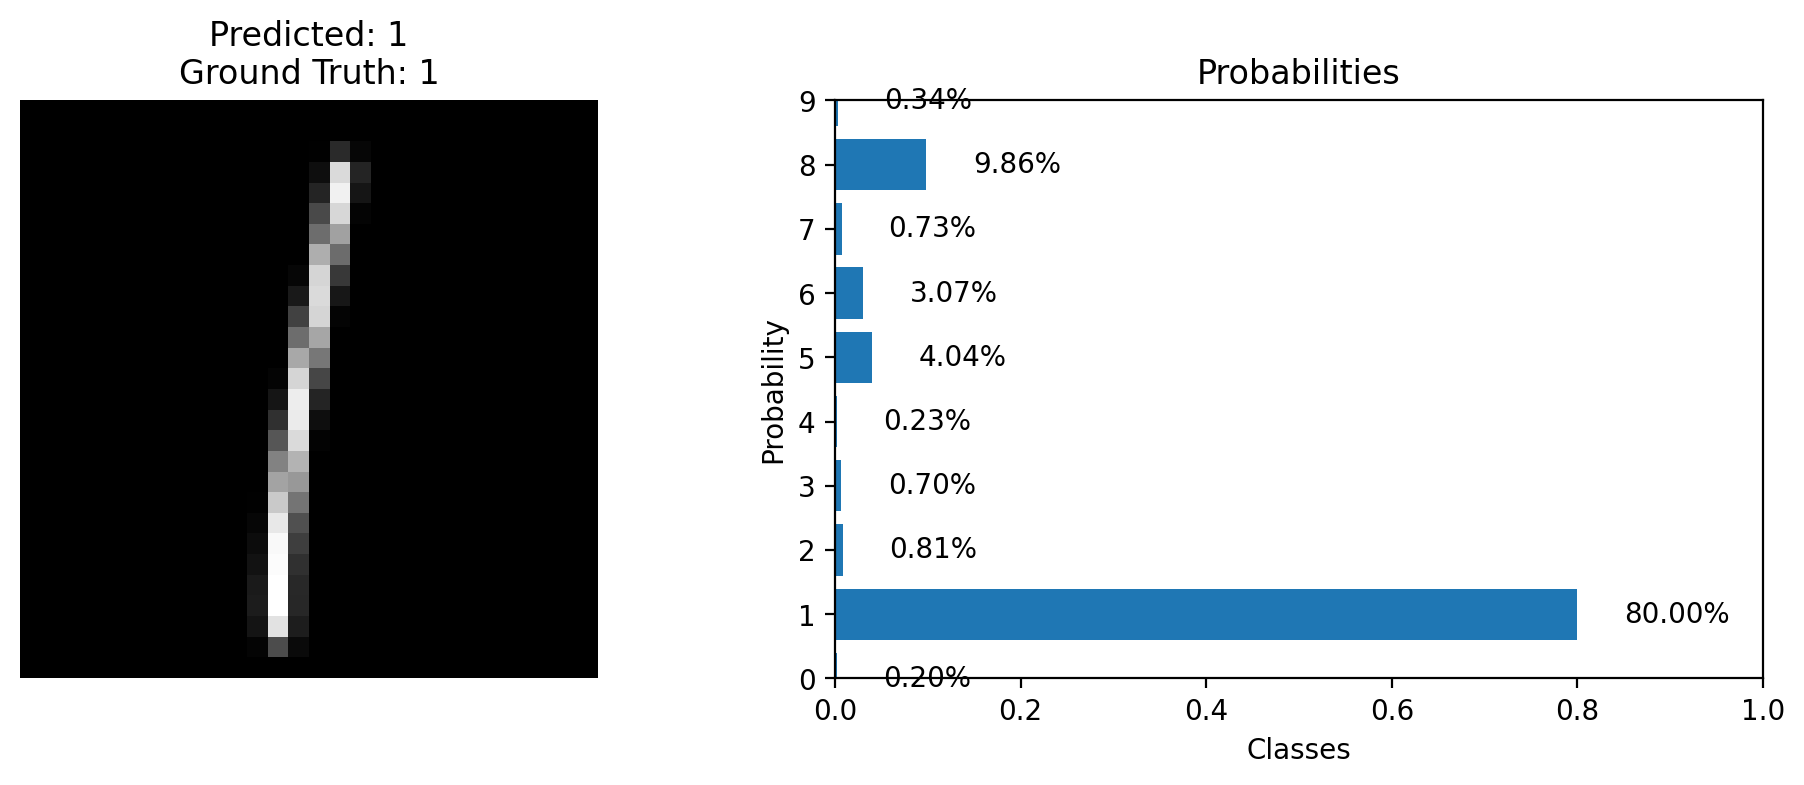

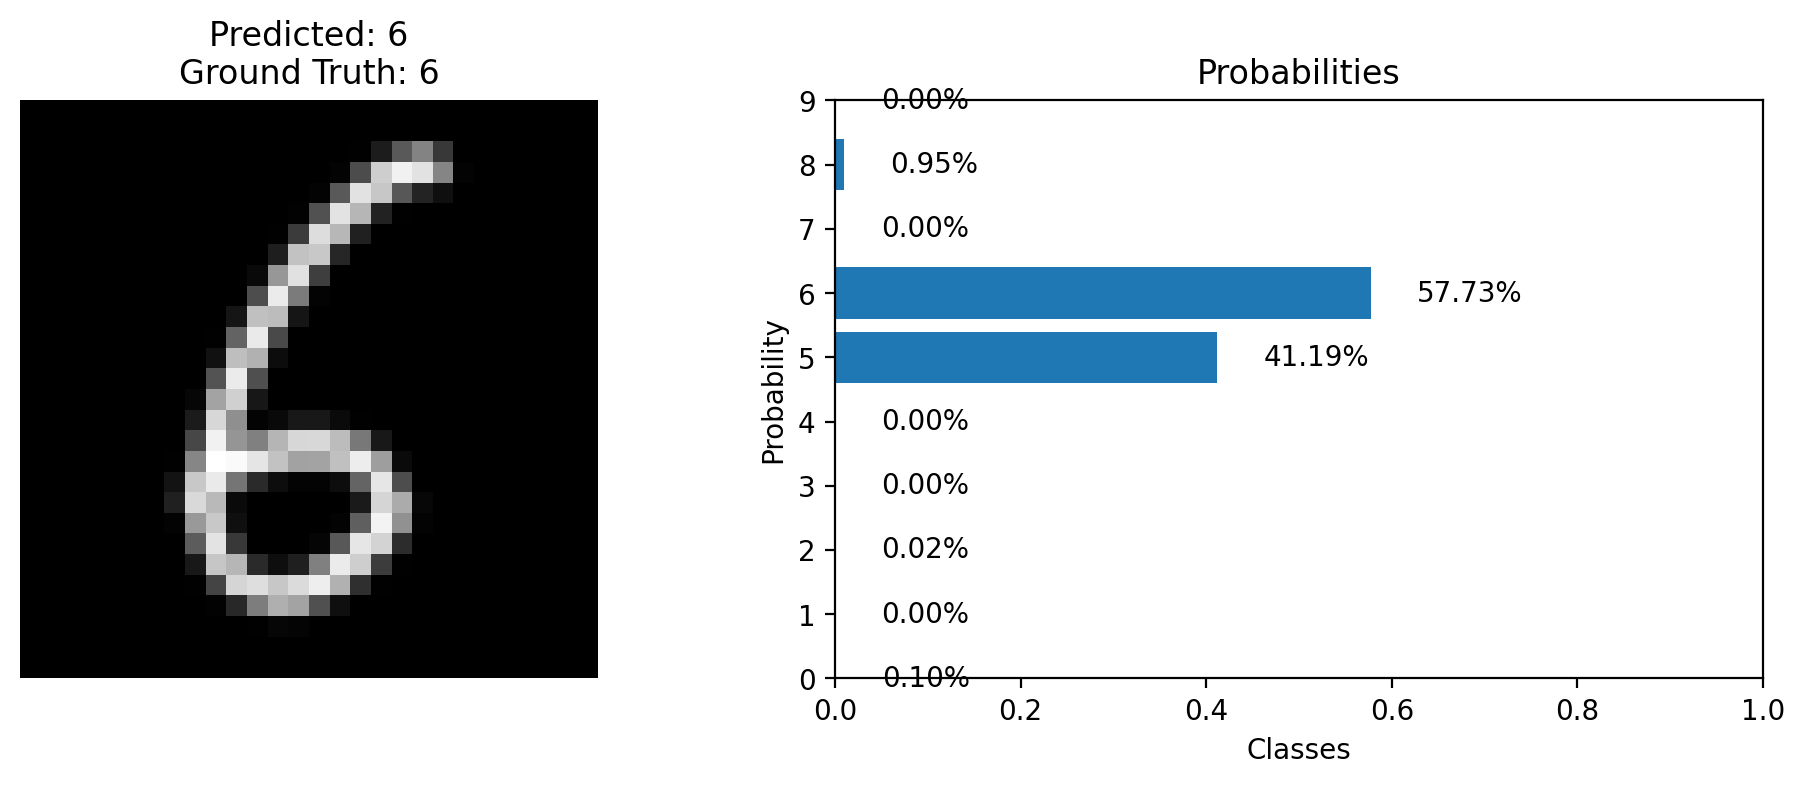

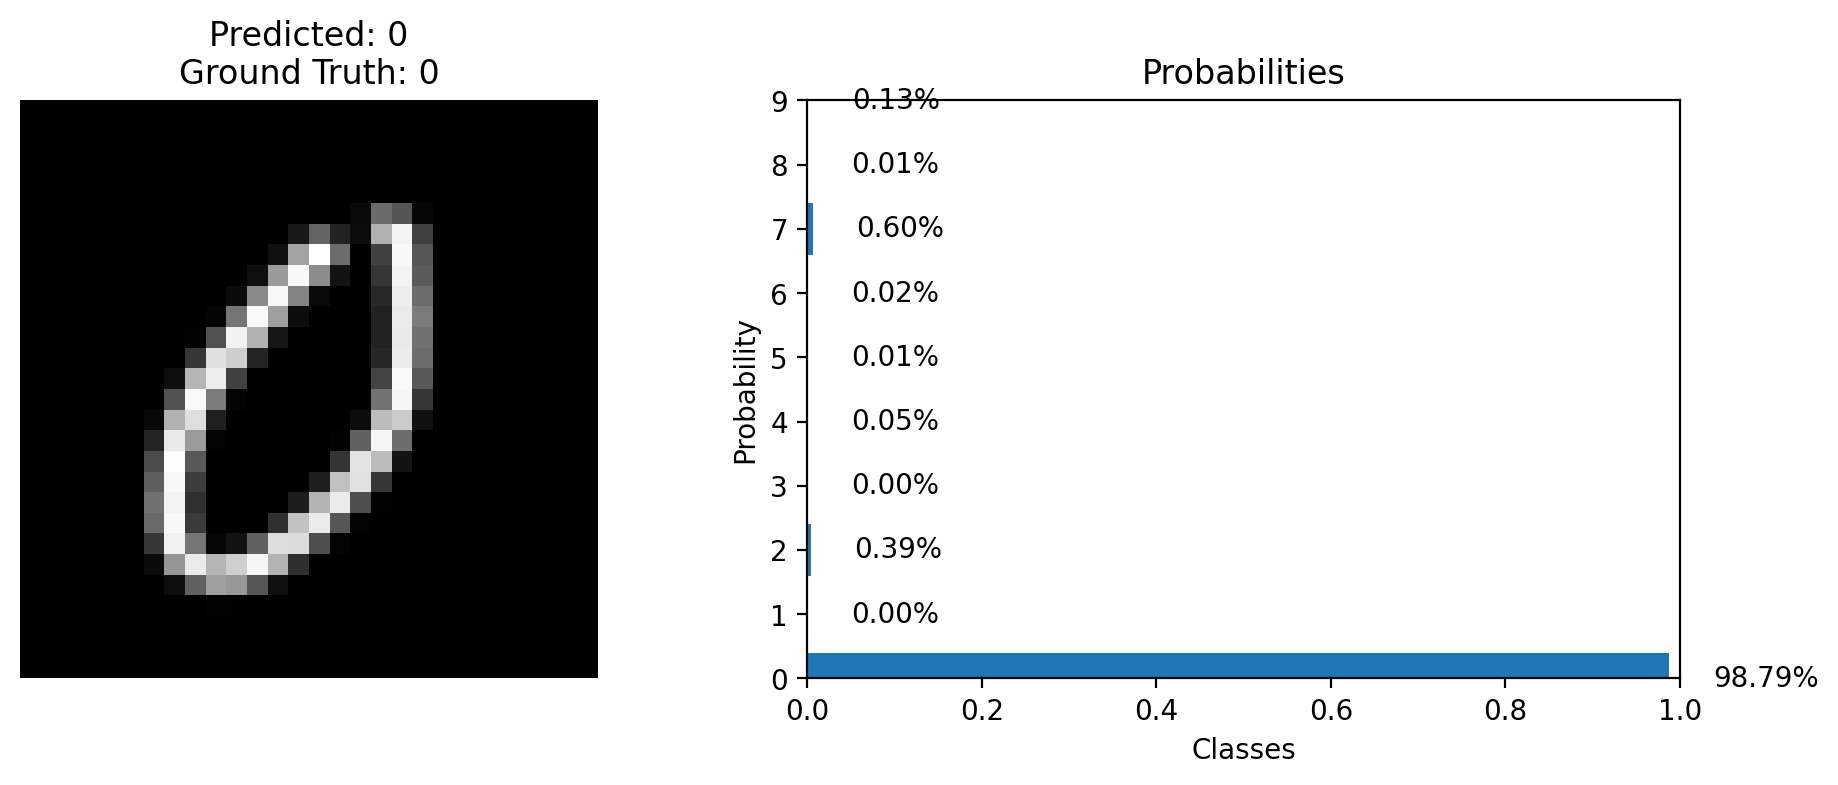

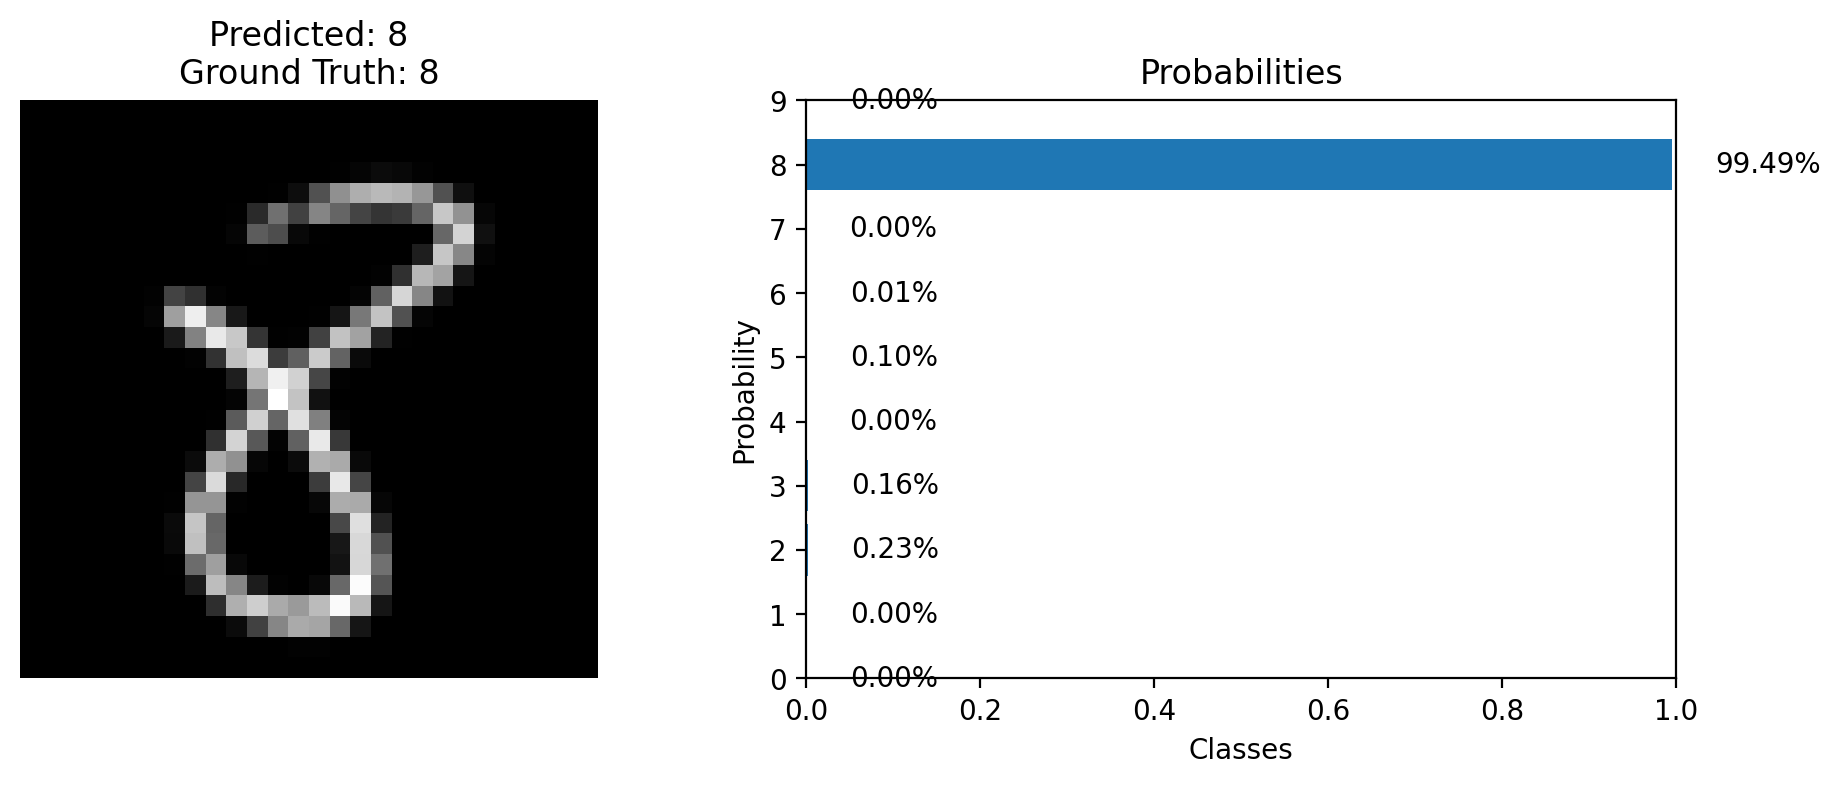

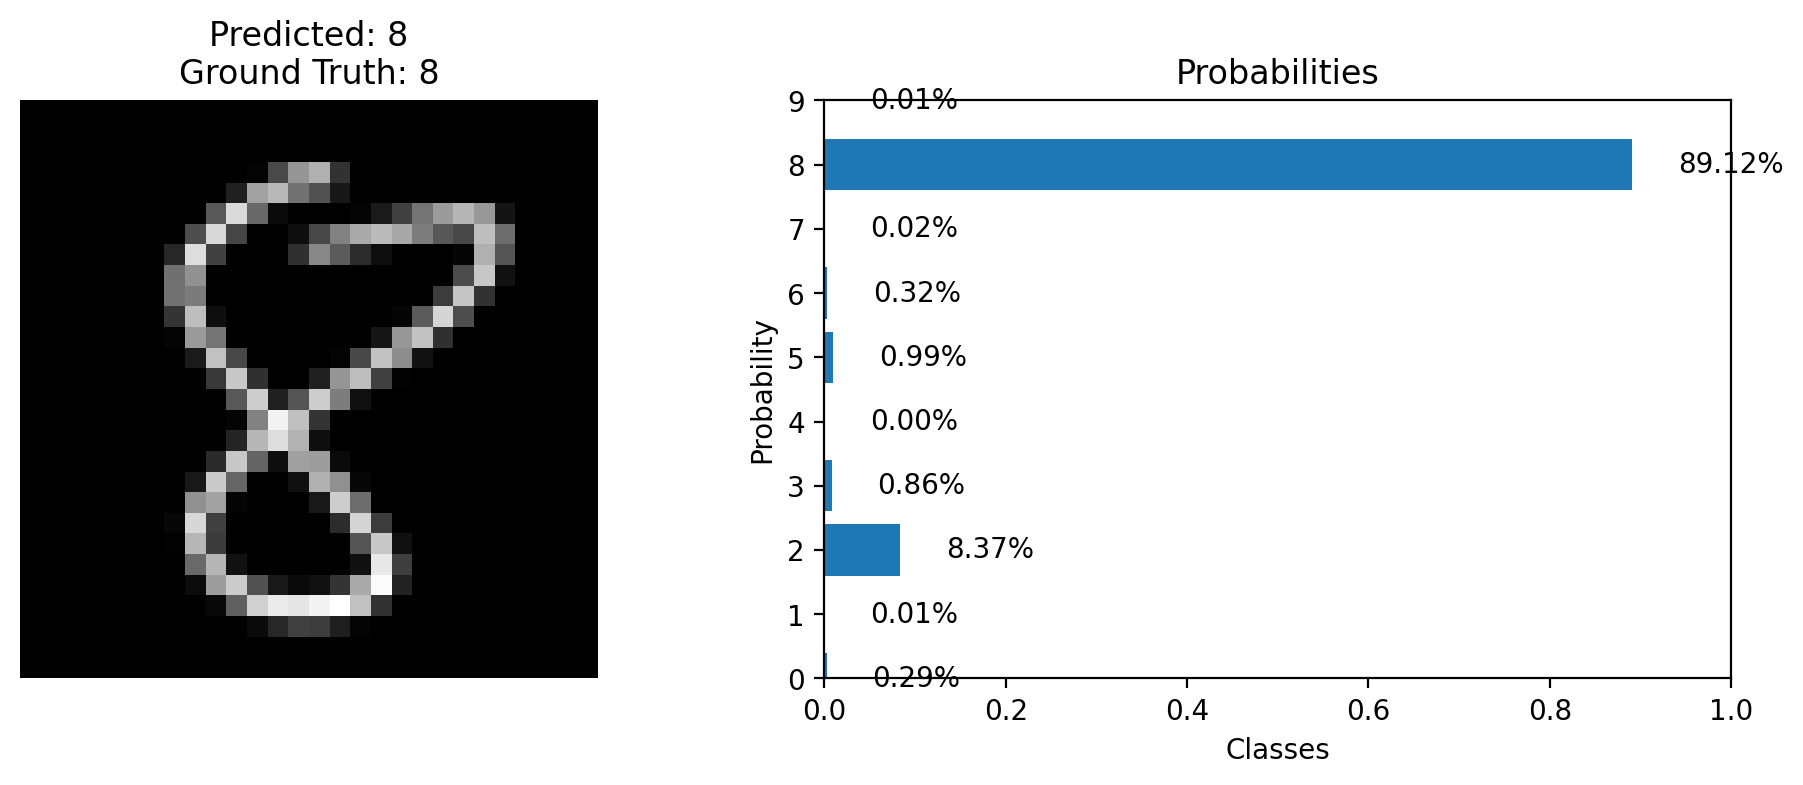

In [21]:
# 정답인 이미지들, 확률, 라벨 시각화
num_corrects = len(correct_inputs)
ncols = 2
nrows = (num_corrects + 1 ) // 2 

correct_labels = labels[corrects]
classes = [0, 1, 2, 3, 4, 5, 6, 7, 8, 9]

# 정답으로 예측한 이미지에 대해 전체 클래스 확률 표시
for idx, (input, probs, pred, label) in enumerate(zip(correct_inputs, correct_probs, correct_preds, correct_labels)):
    plt.figure(figsize=(10, 4))

    # 각 input에 대한 예측값과 실제값, input 이미지 출력
    plt.subplot(1, 2, 1)
    plt.imshow(input, cmap="gray")
    plt.axis("off")
    plt.title(f"Predicted: {pred}\nGround Truth: {label}")

    # 각 class에 대한 확률값 출력
    plt.subplot(1, 2, 2)
    bars = plt.barh(classes, probs)
    plt.xlim(0, 1)
    plt.ylim(0, 9)
    plt.xlabel('Classes')
    plt.ylabel('Probability')
    plt.title("Probabilities")

    # bar 옆에 정확한 확률 값 출력
    for bar, prob in zip(bars, probs):
        plt.text(bar.get_width() + 0.05, (bar.get_y()+bar.get_height()/2), f'{(prob * 100.0):.2f}%', va='center', ha='left')

    # 그래프 출력
    plt.tight_layout()
    plt.show()

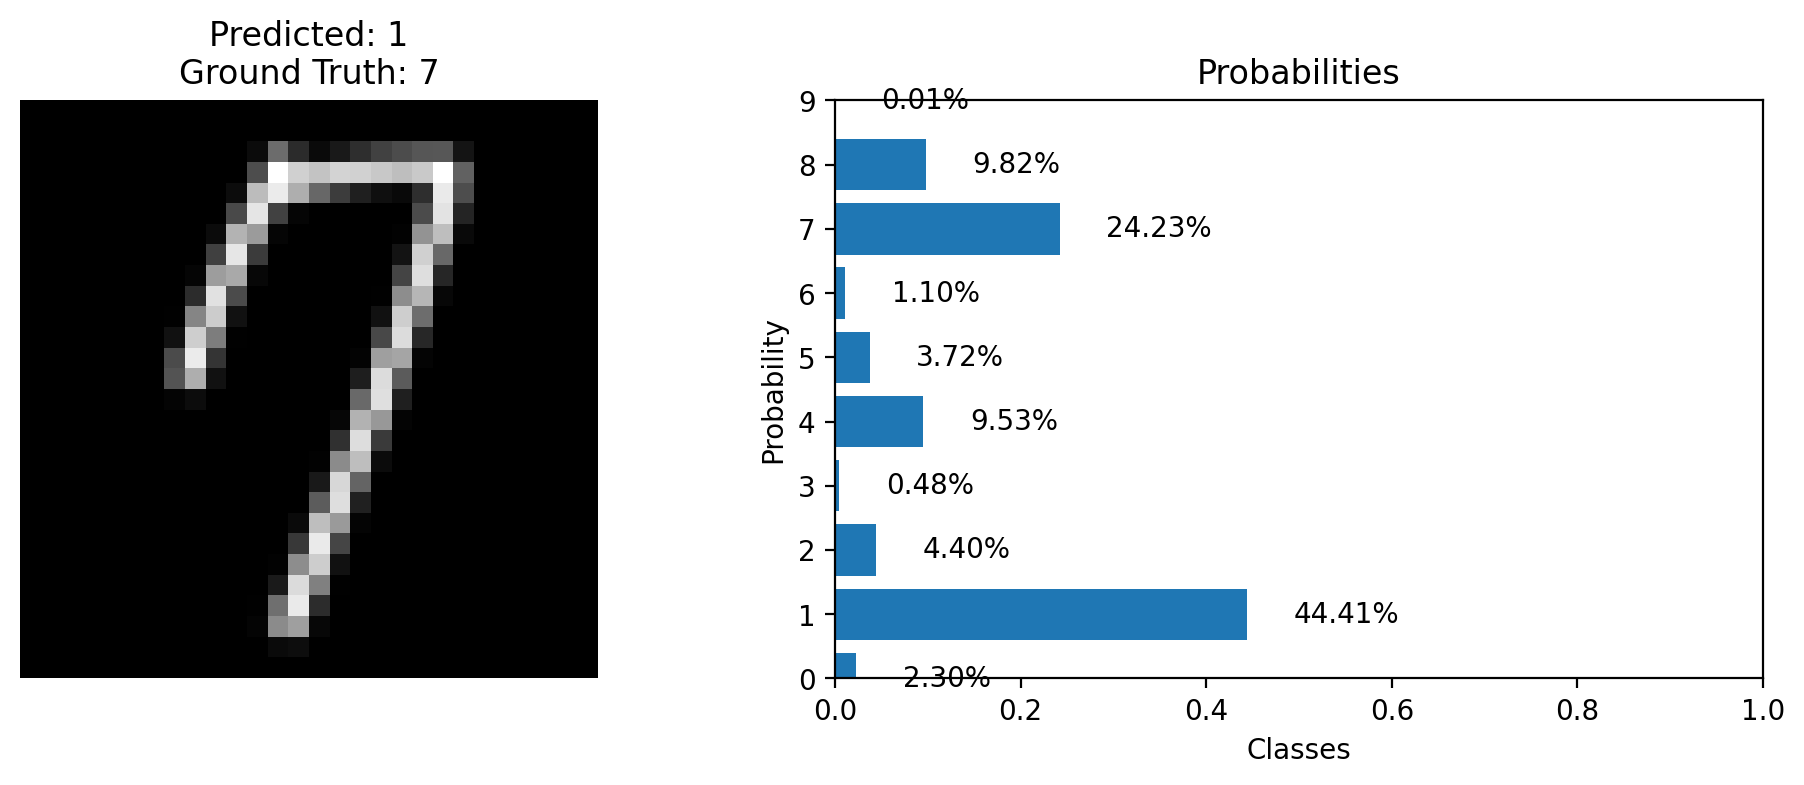

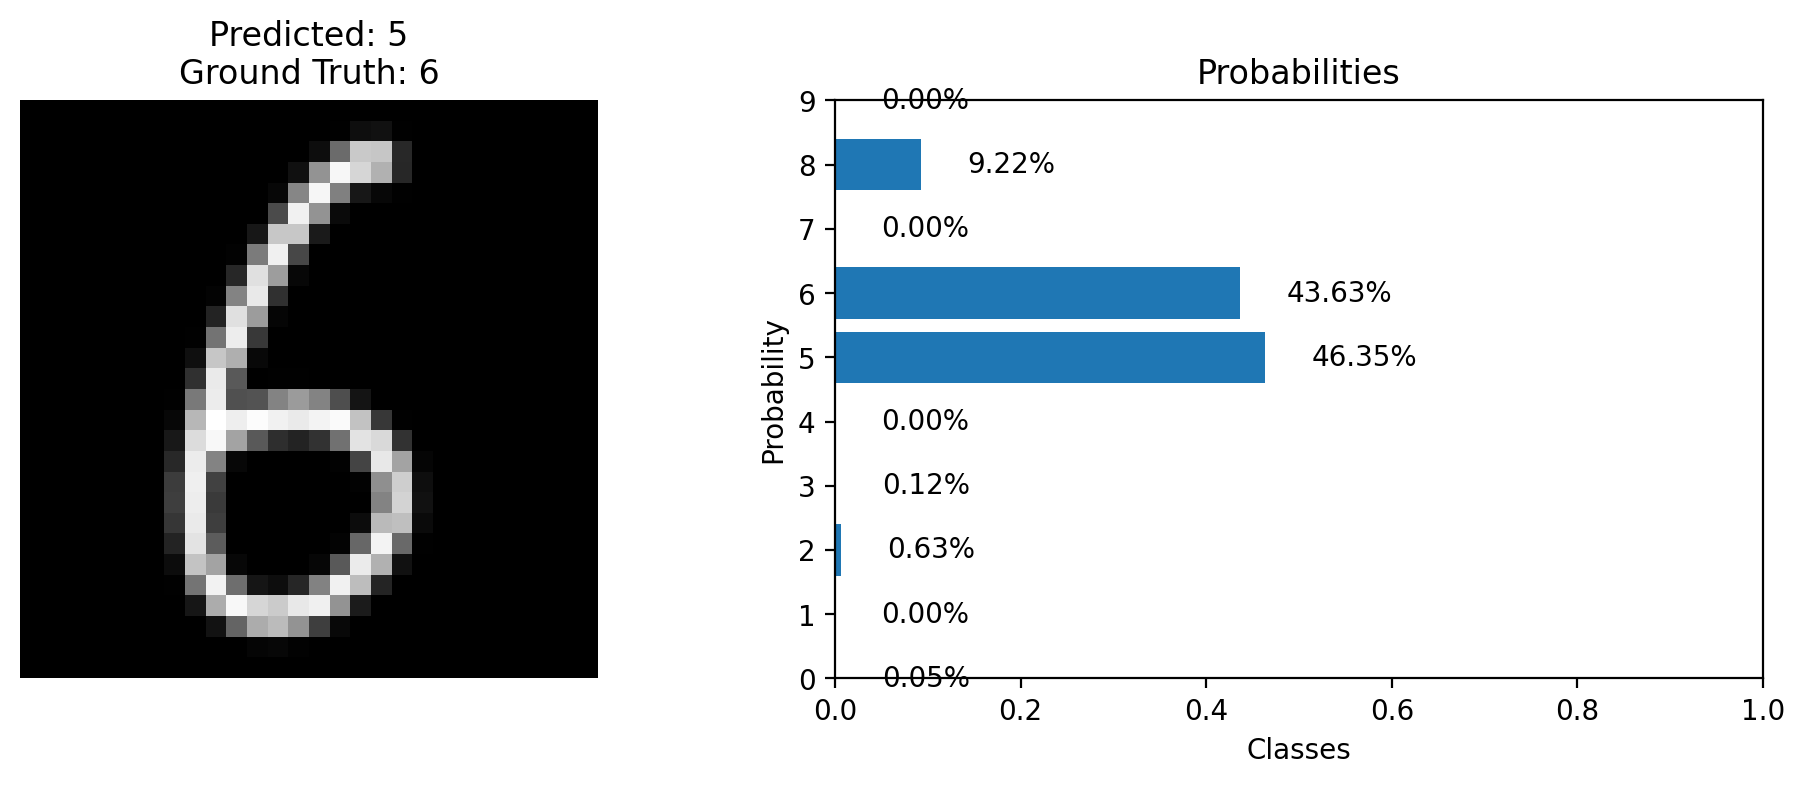

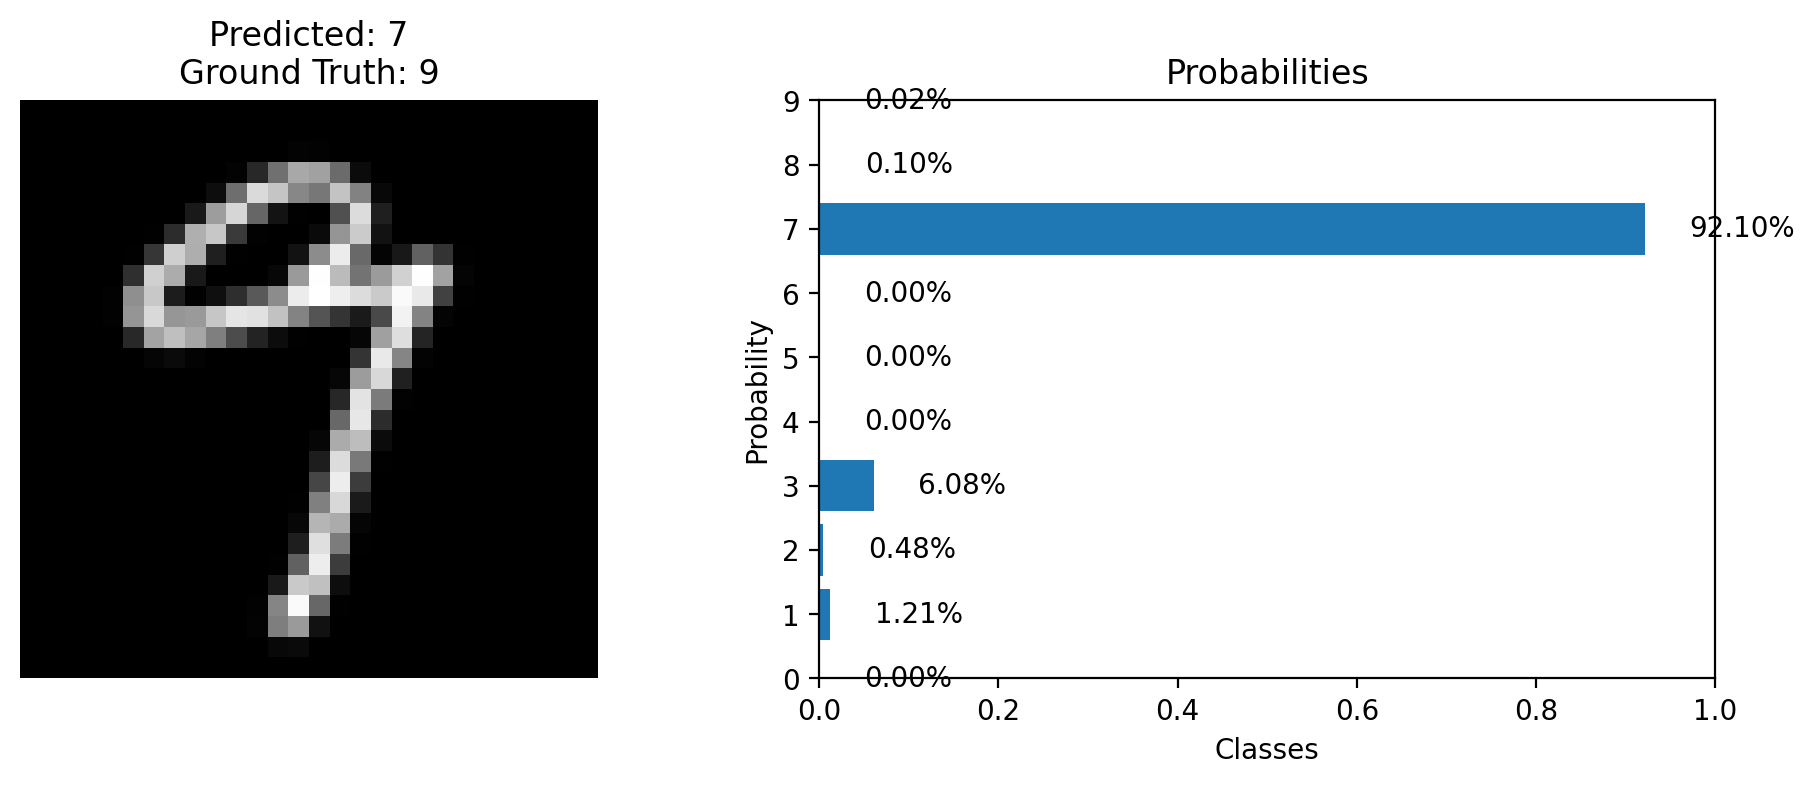

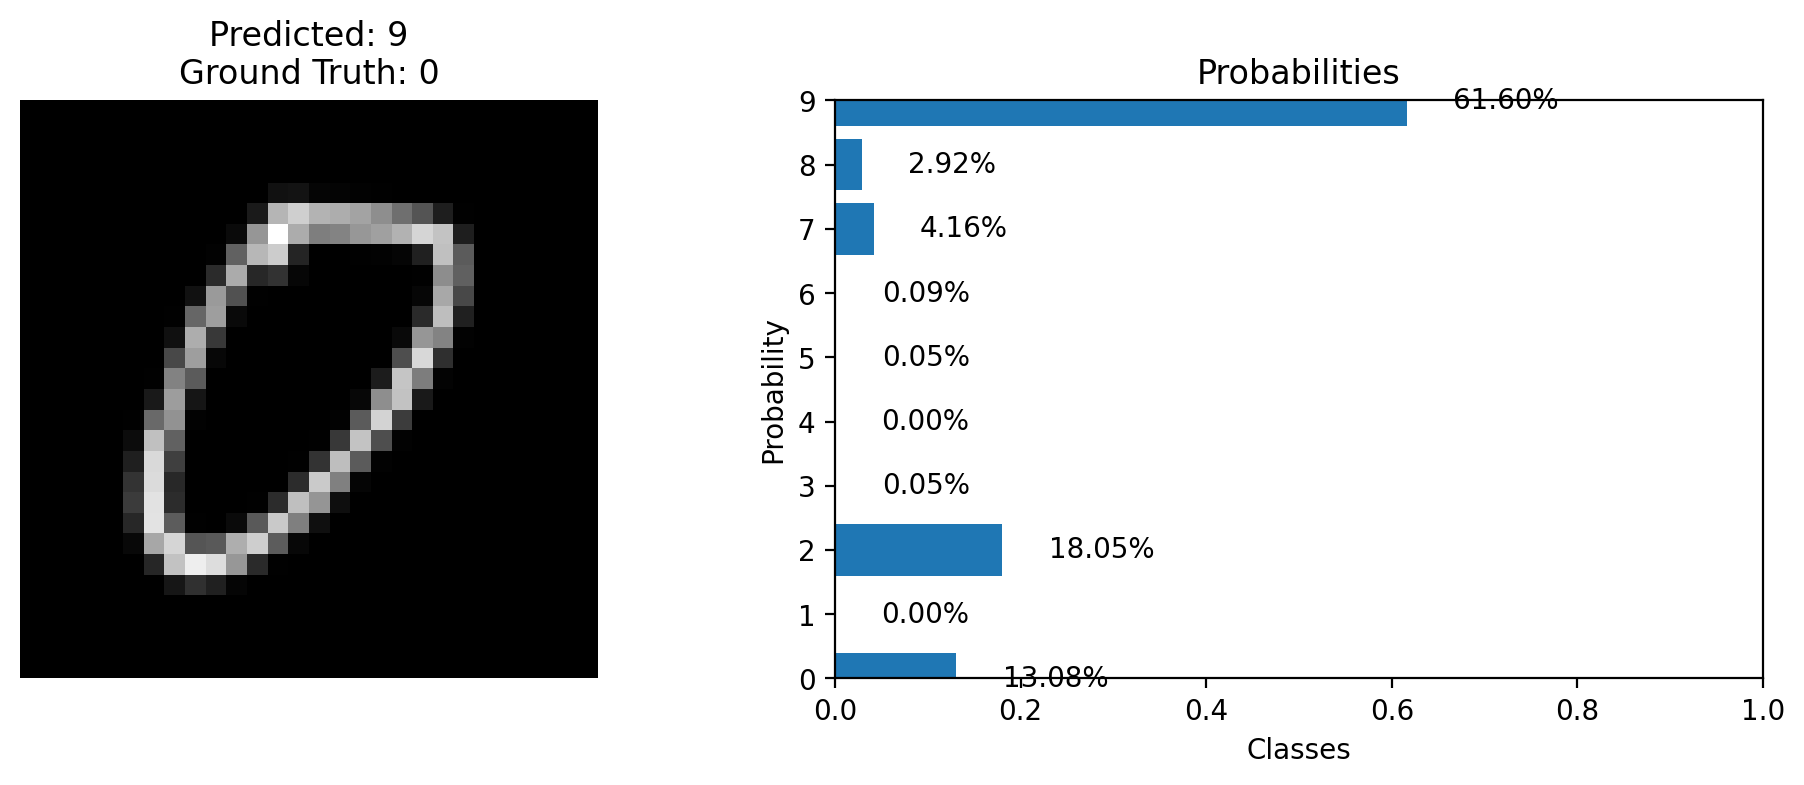

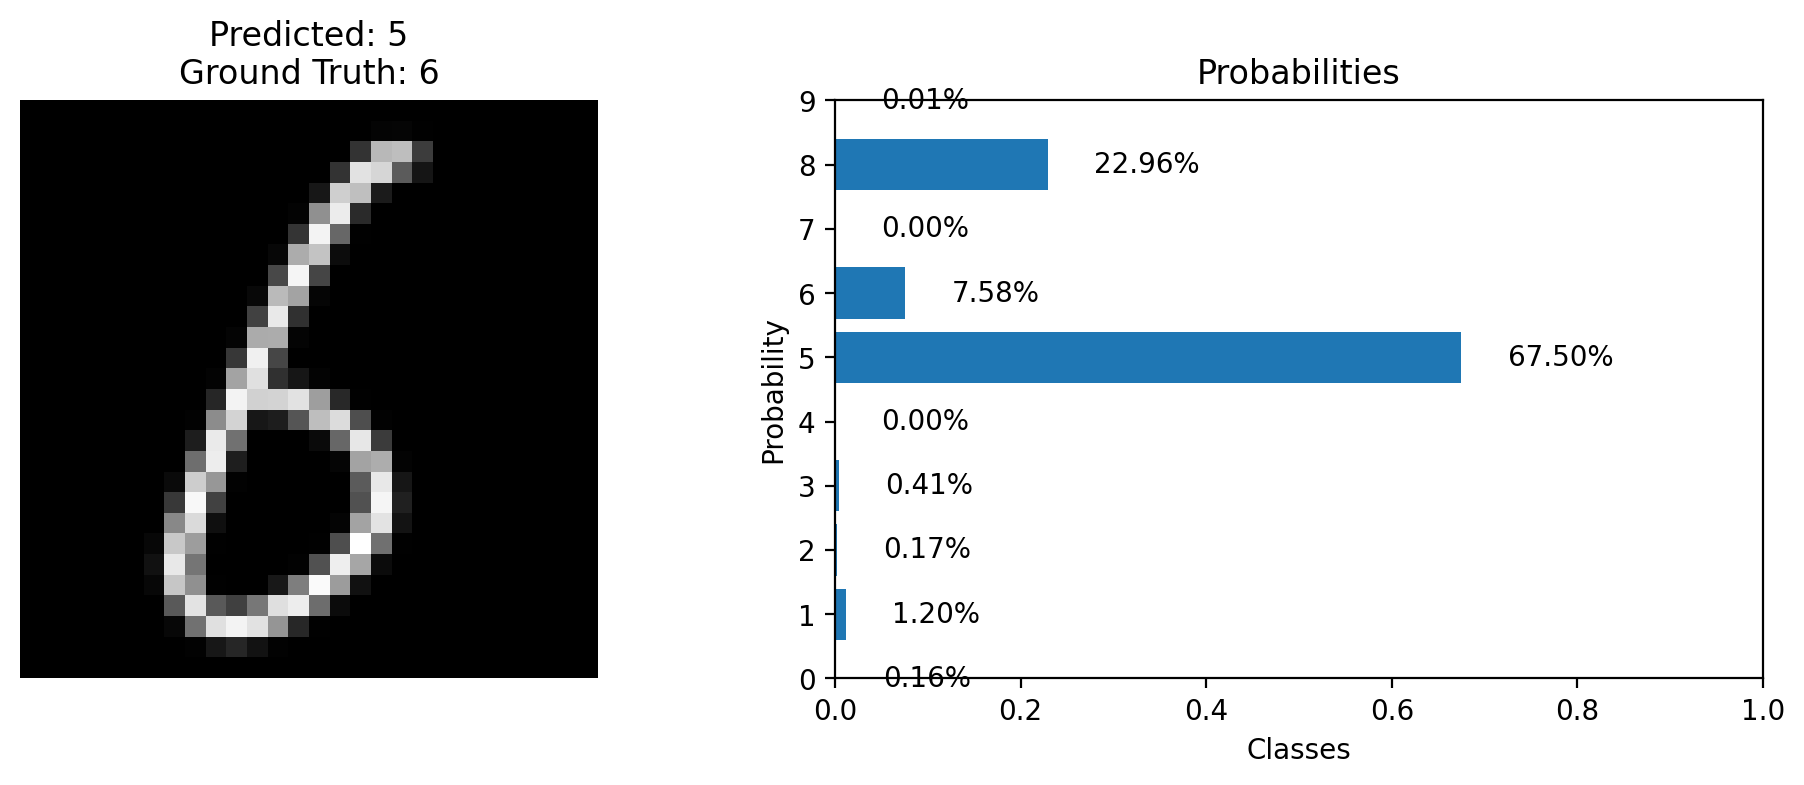

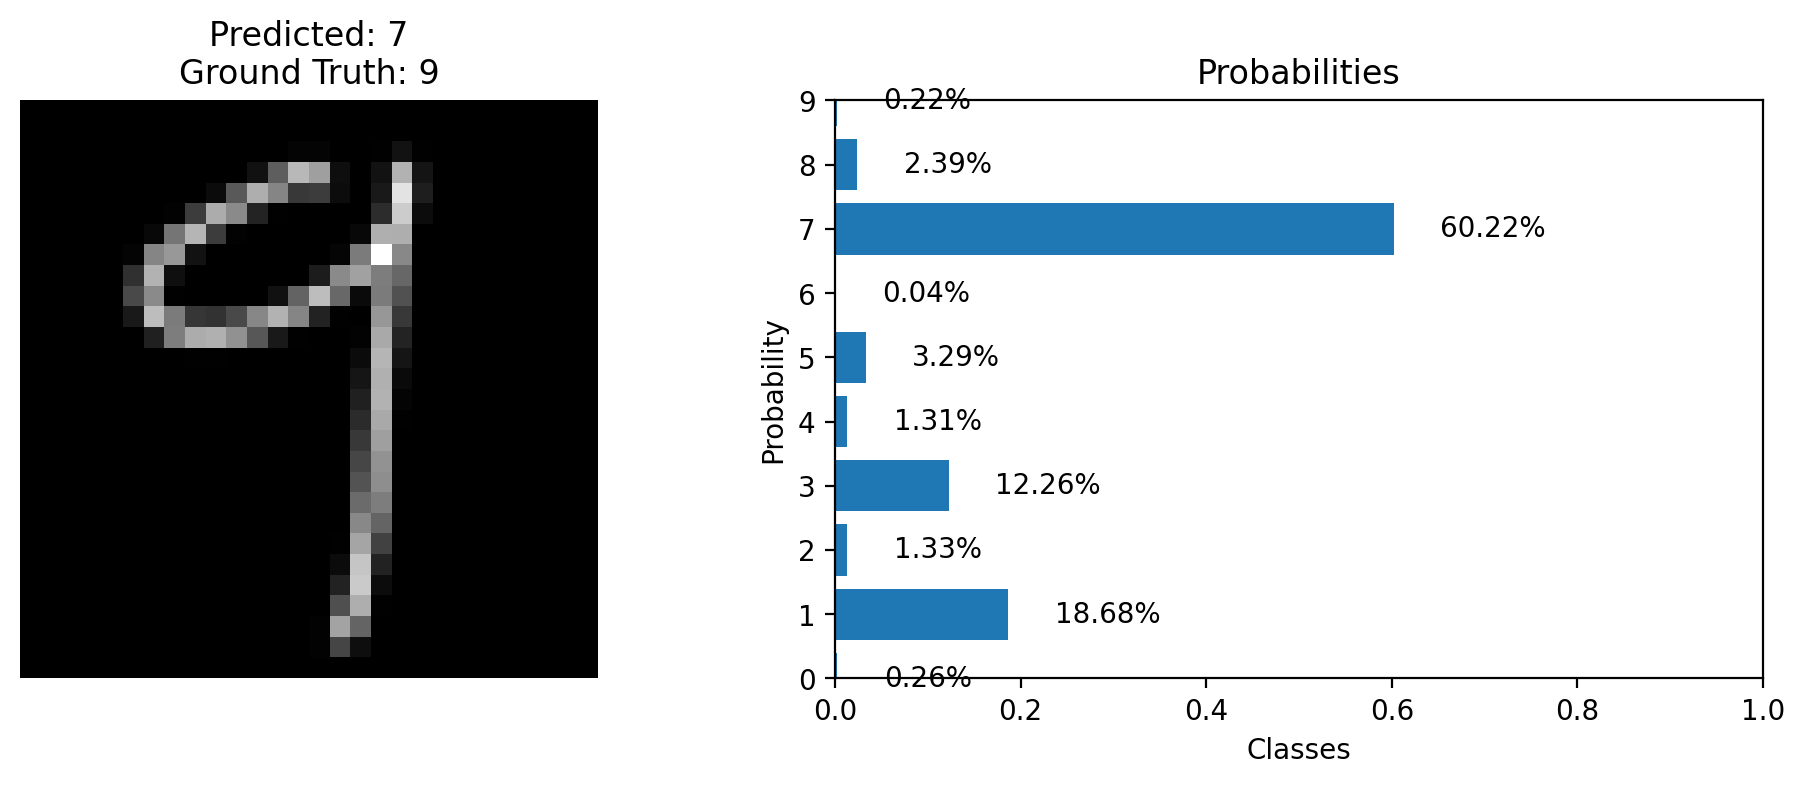

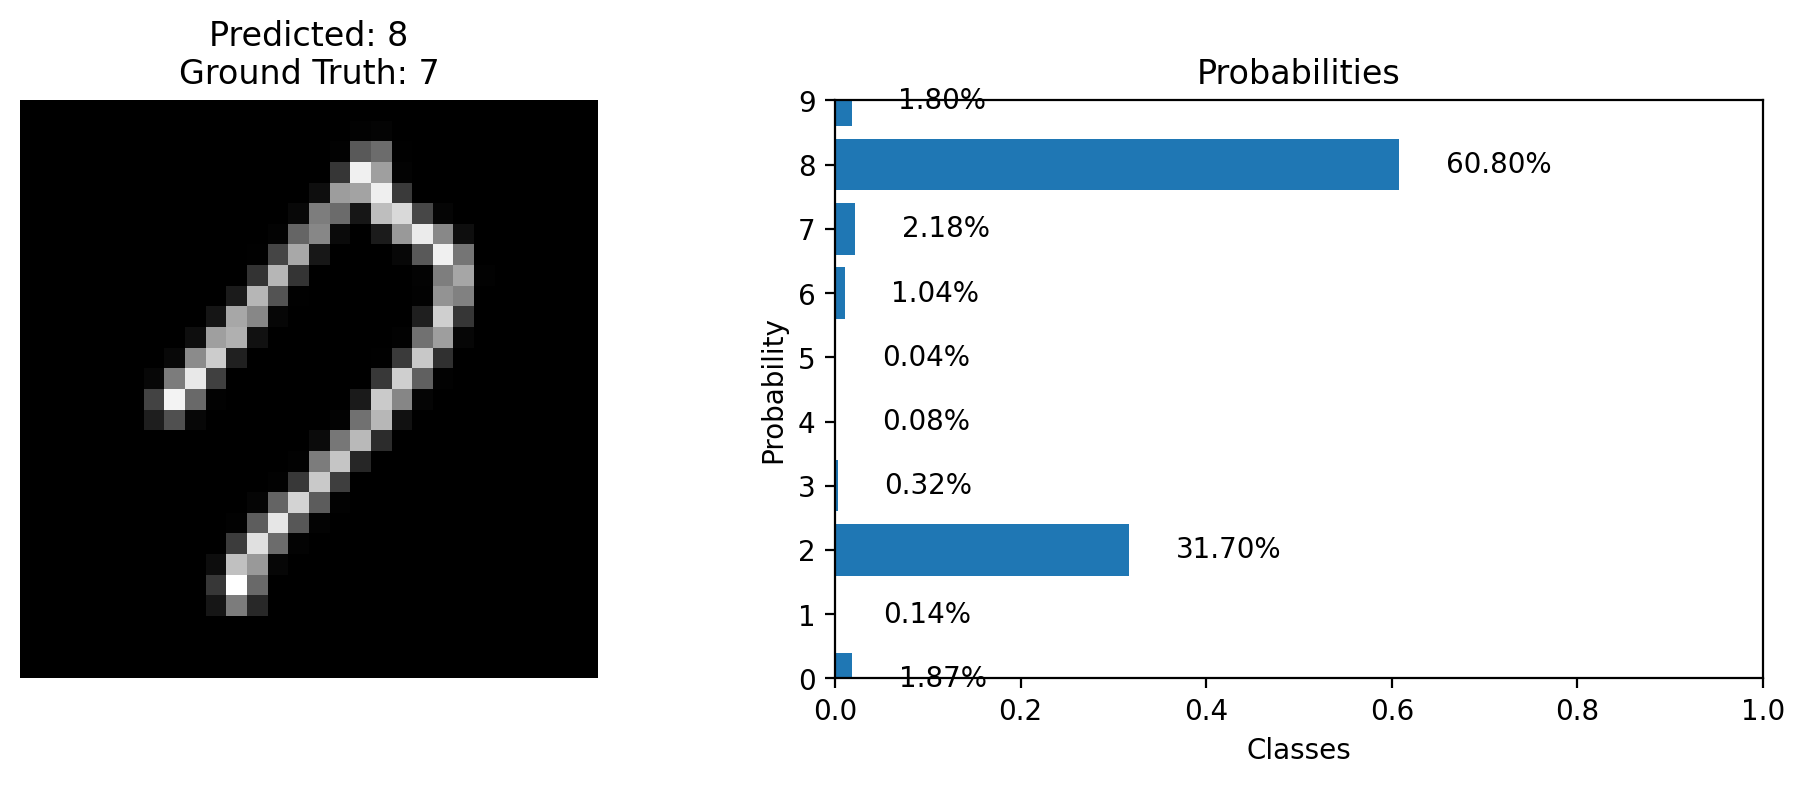

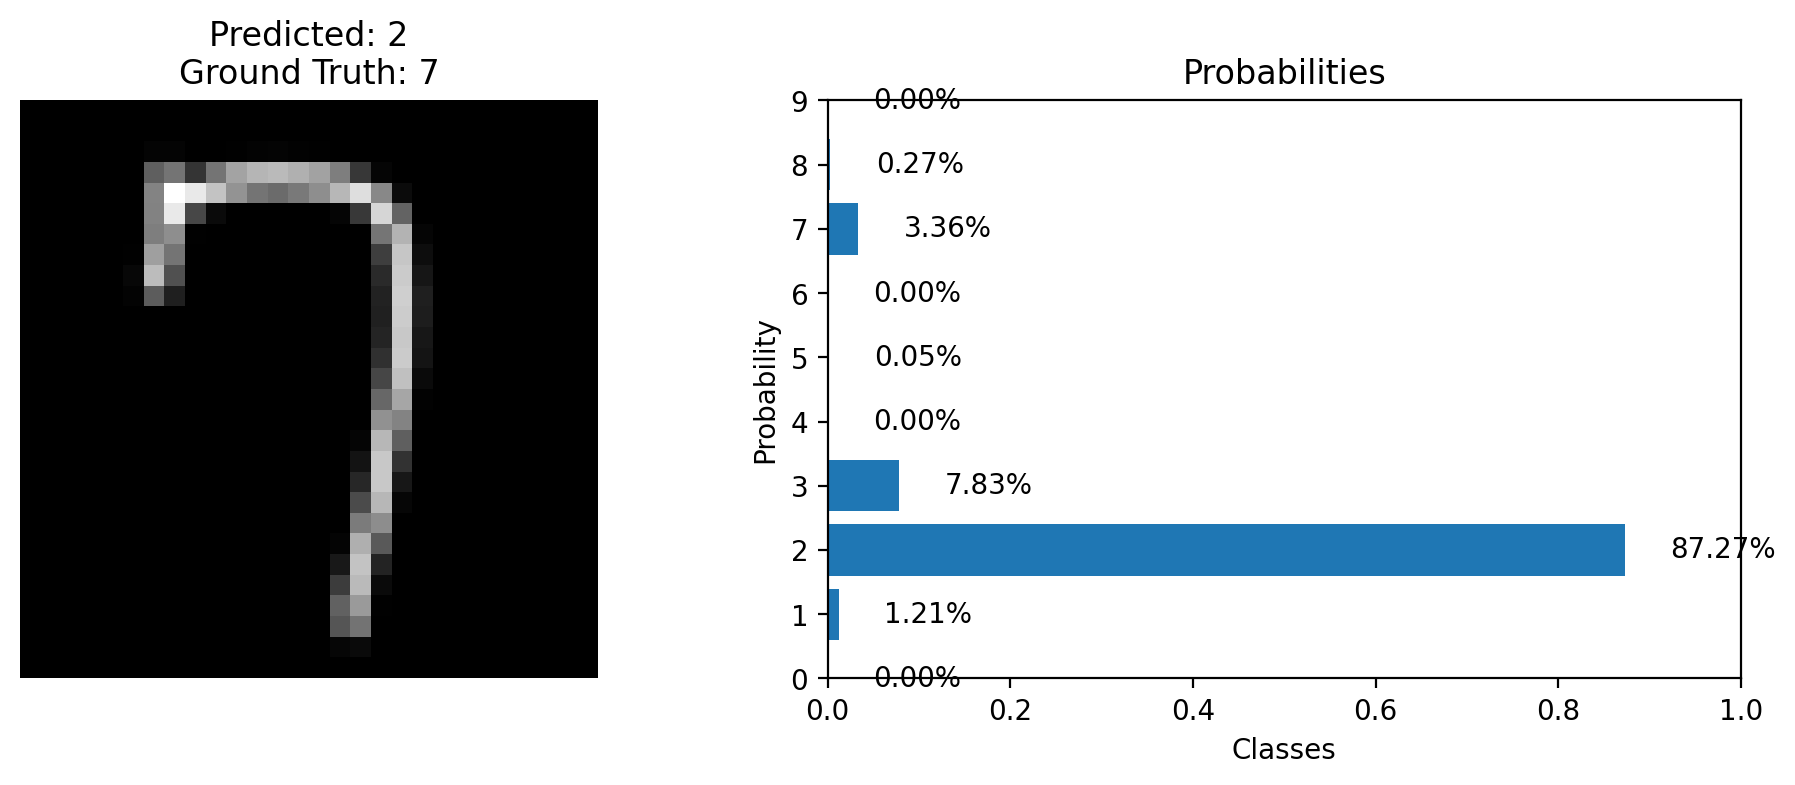

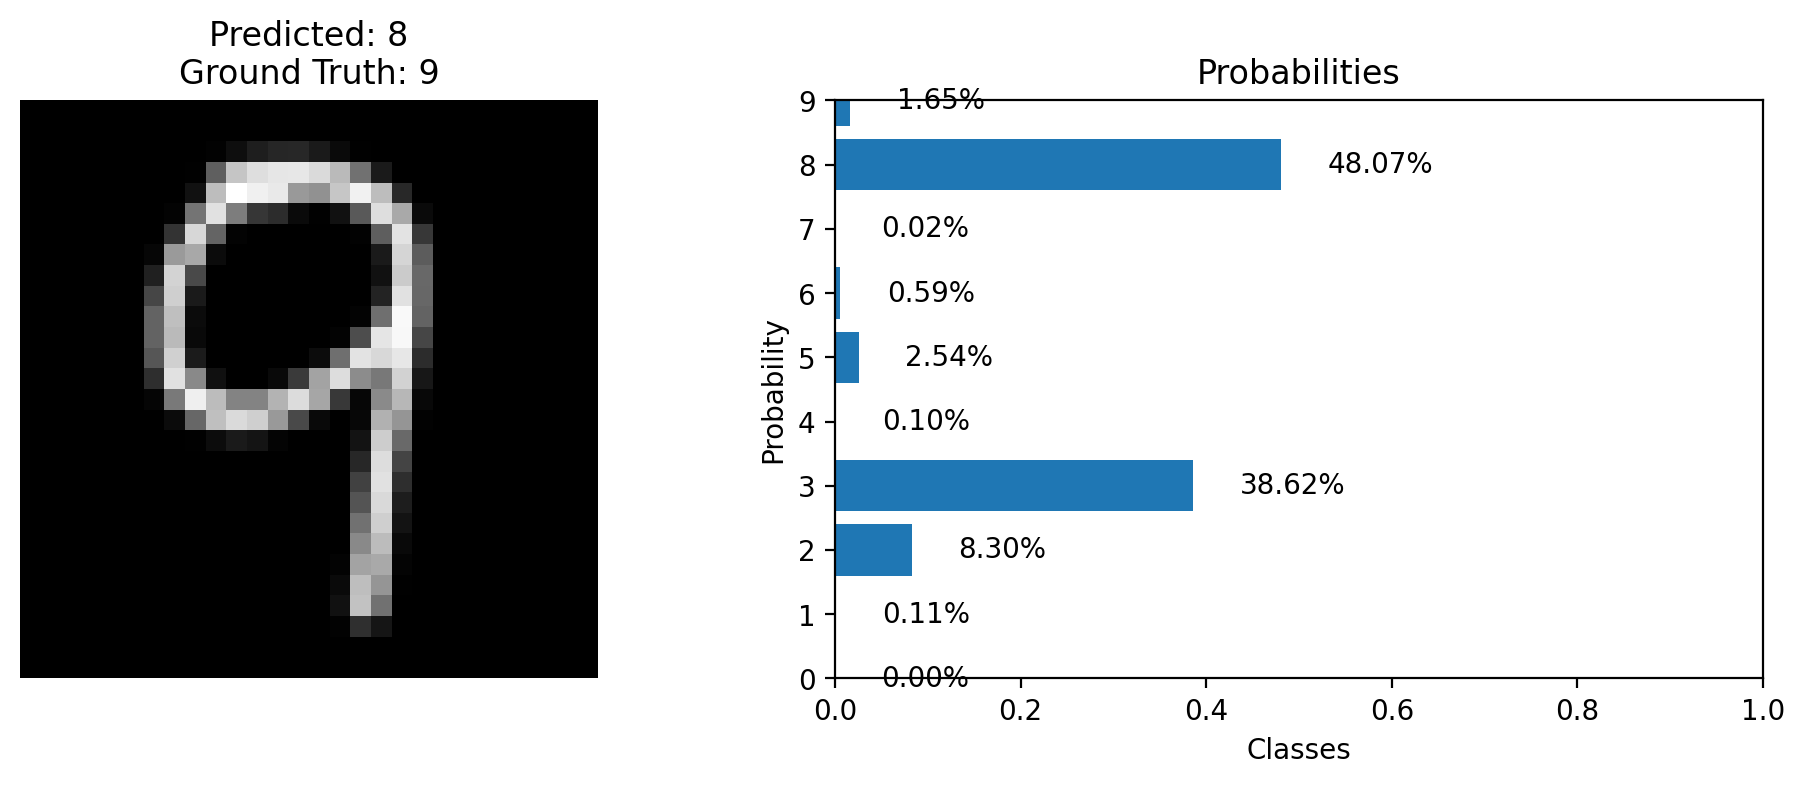

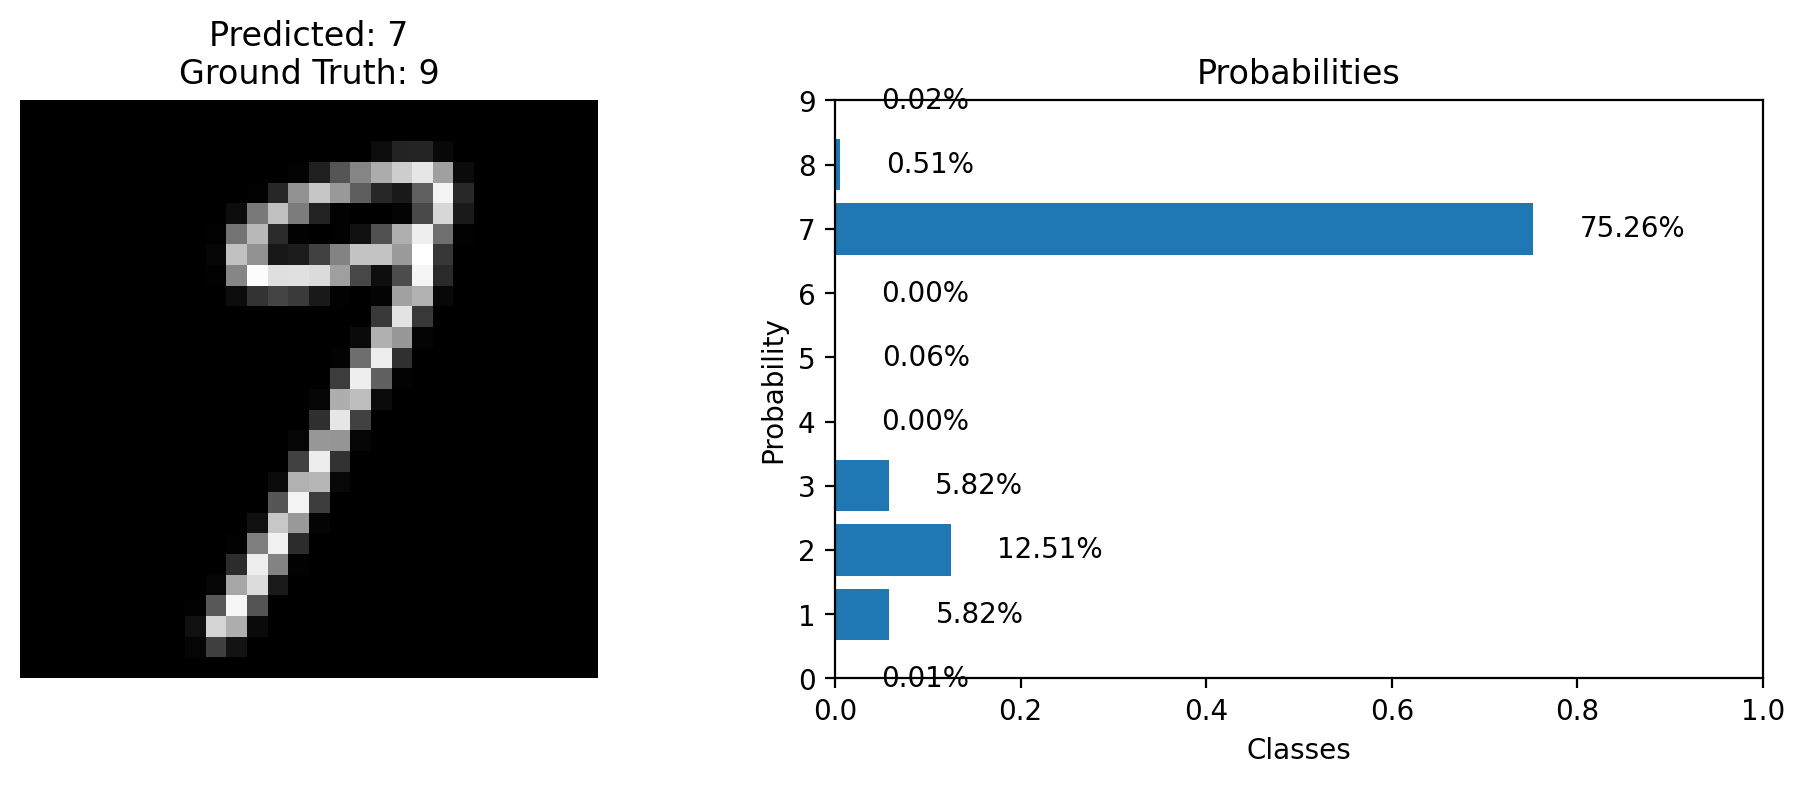

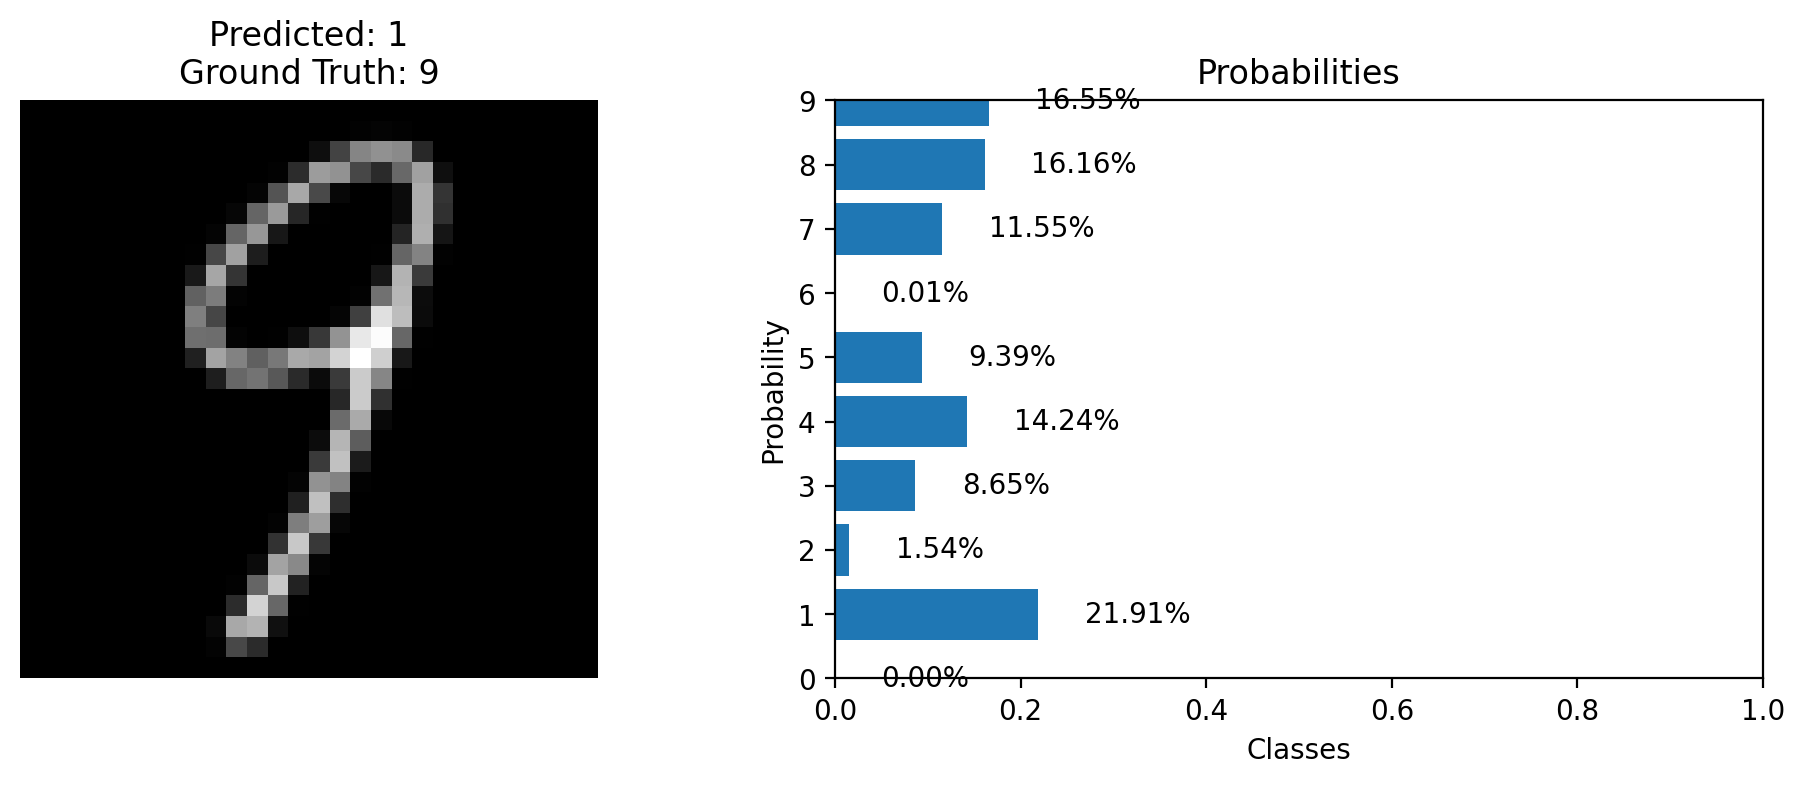

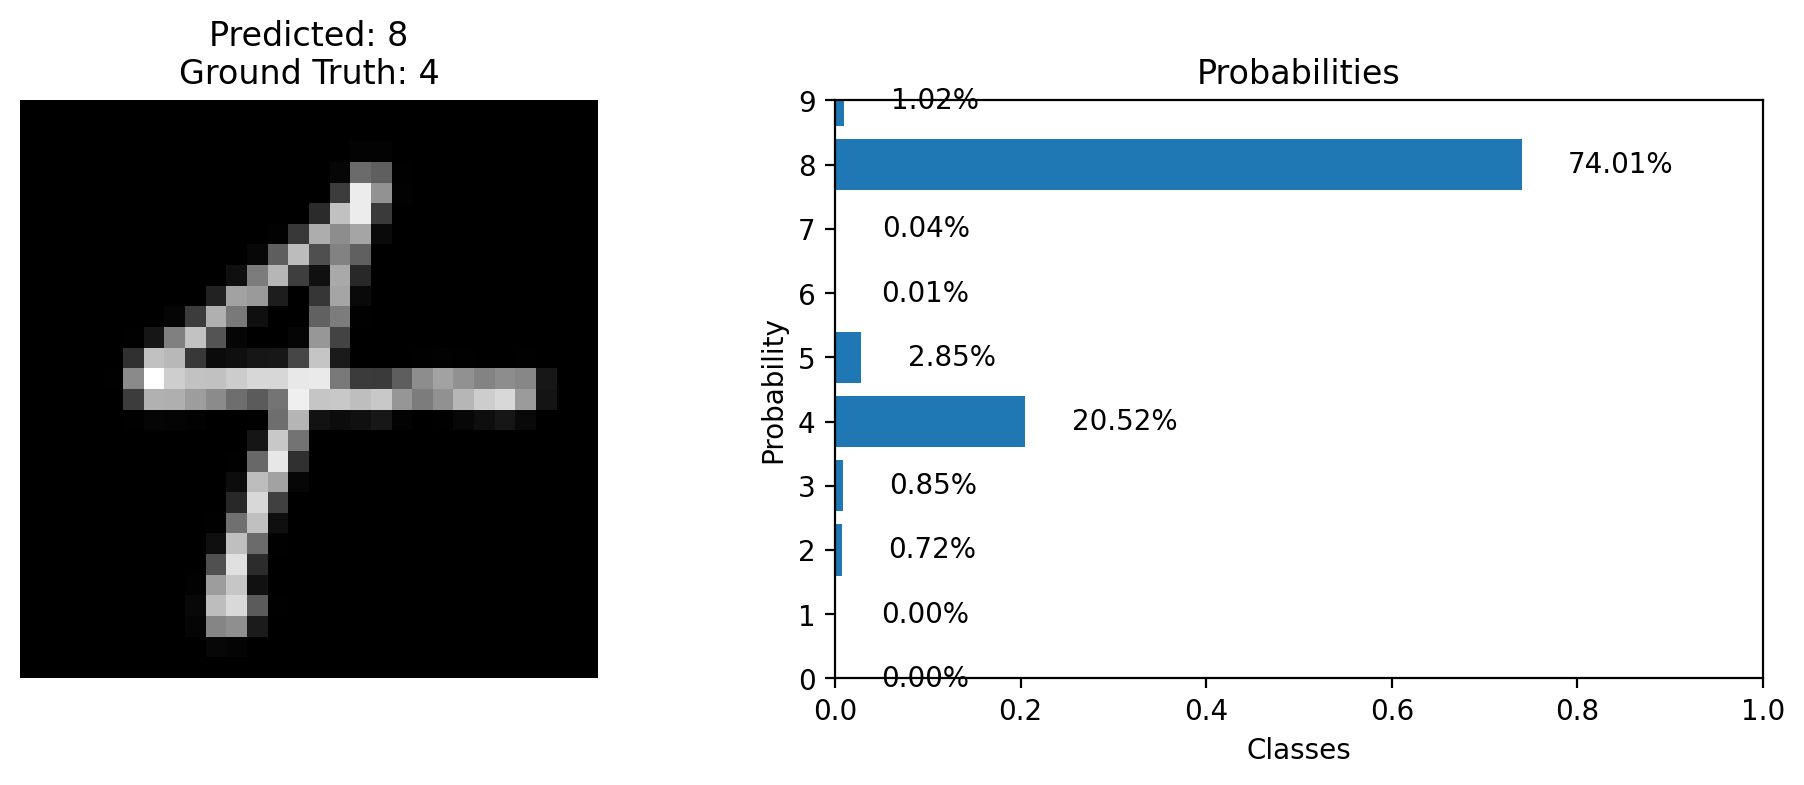

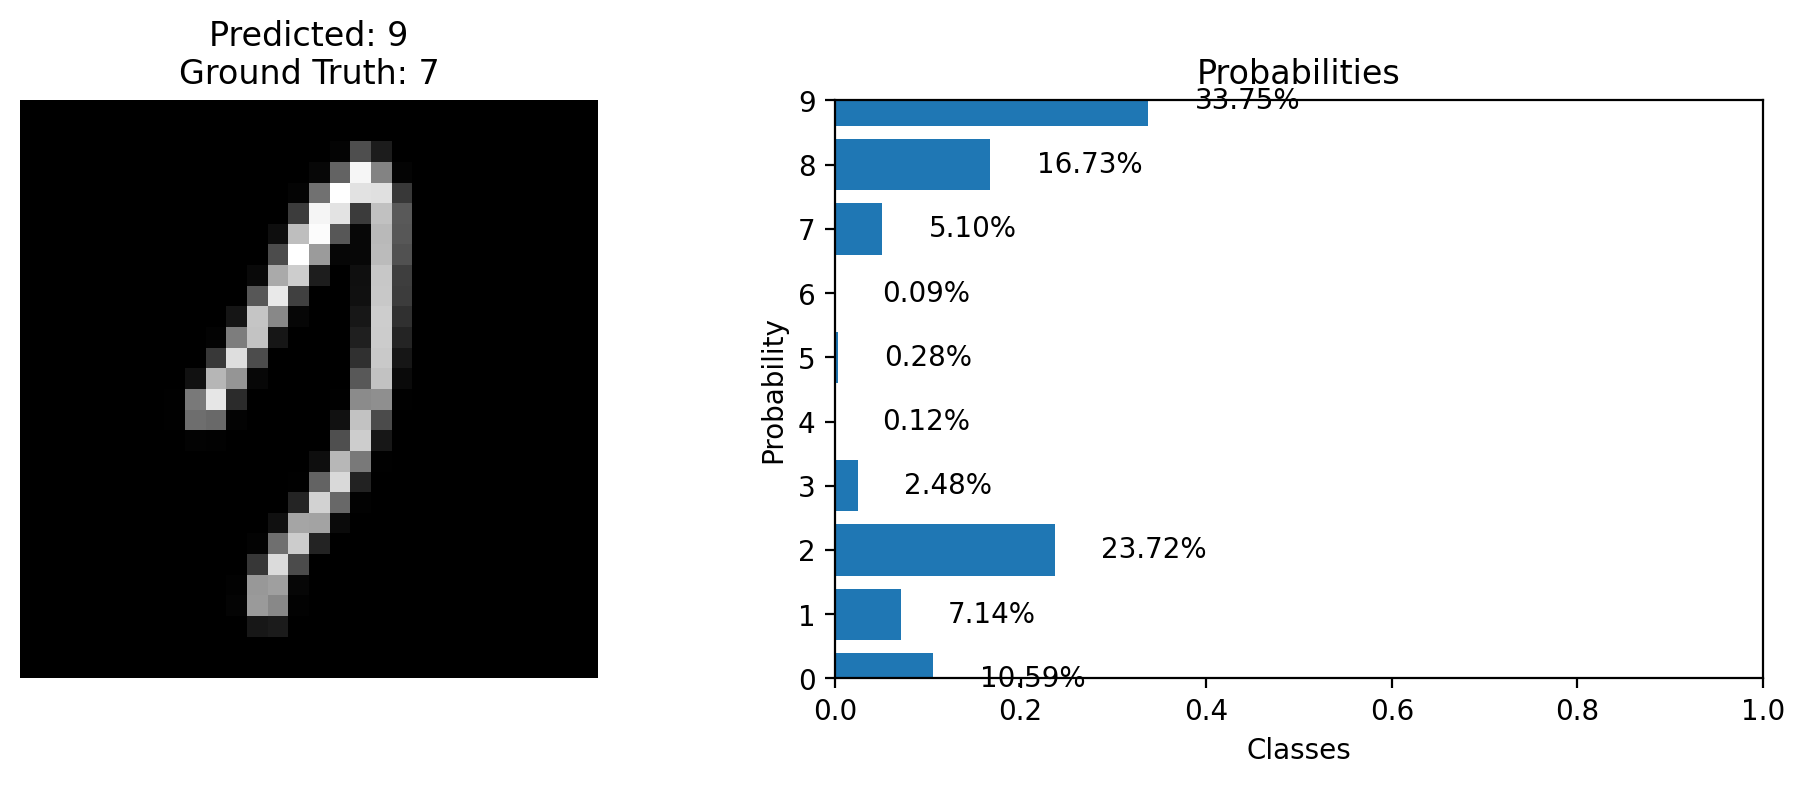

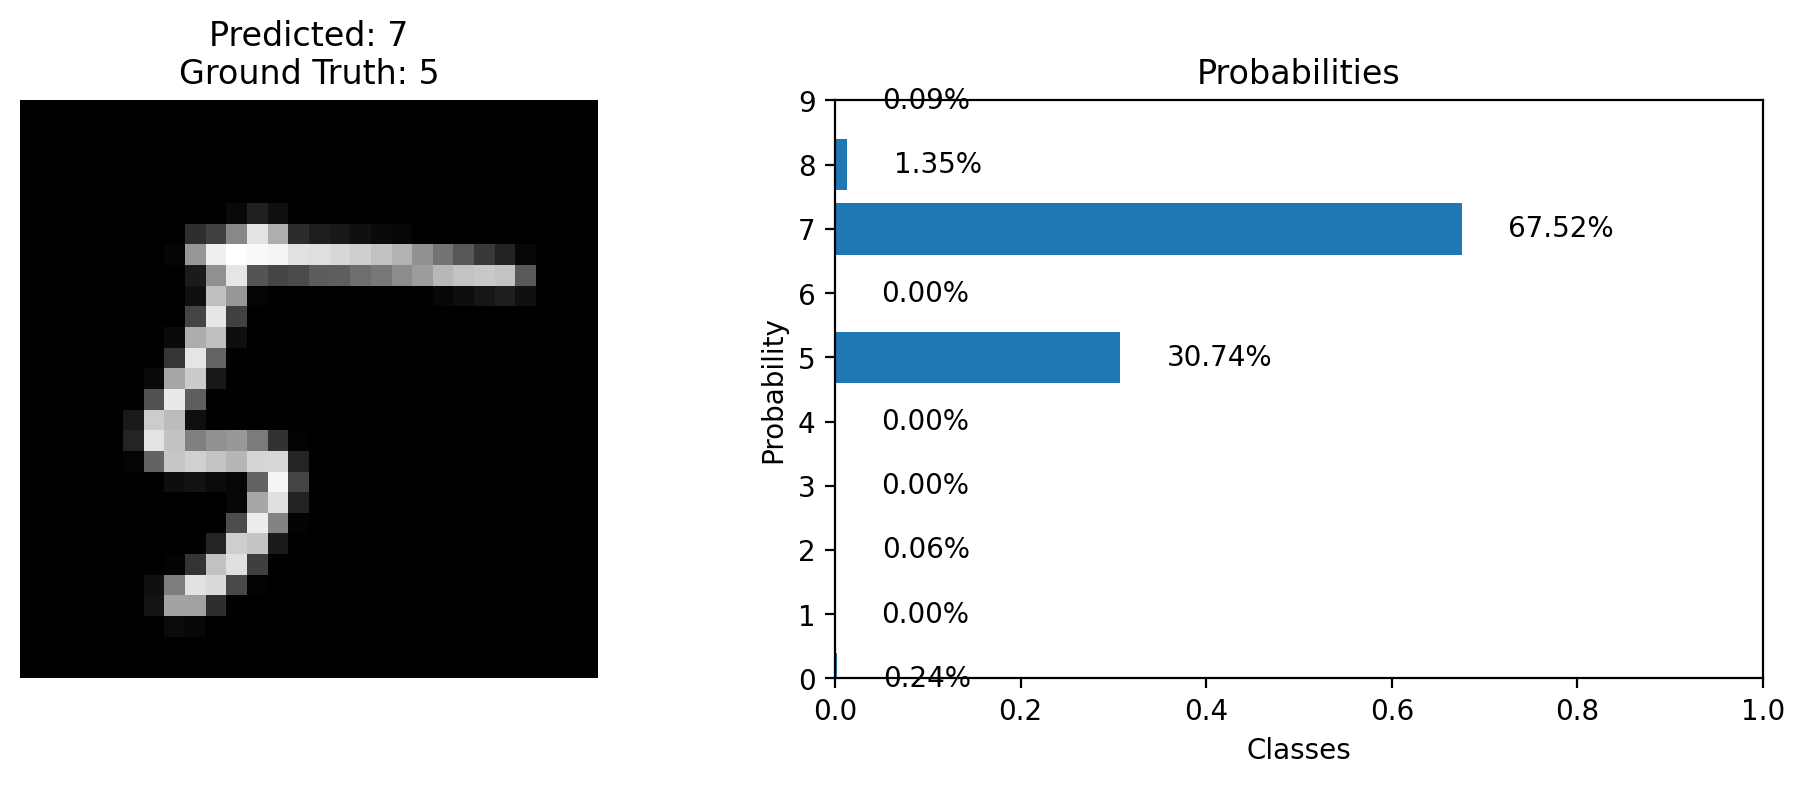

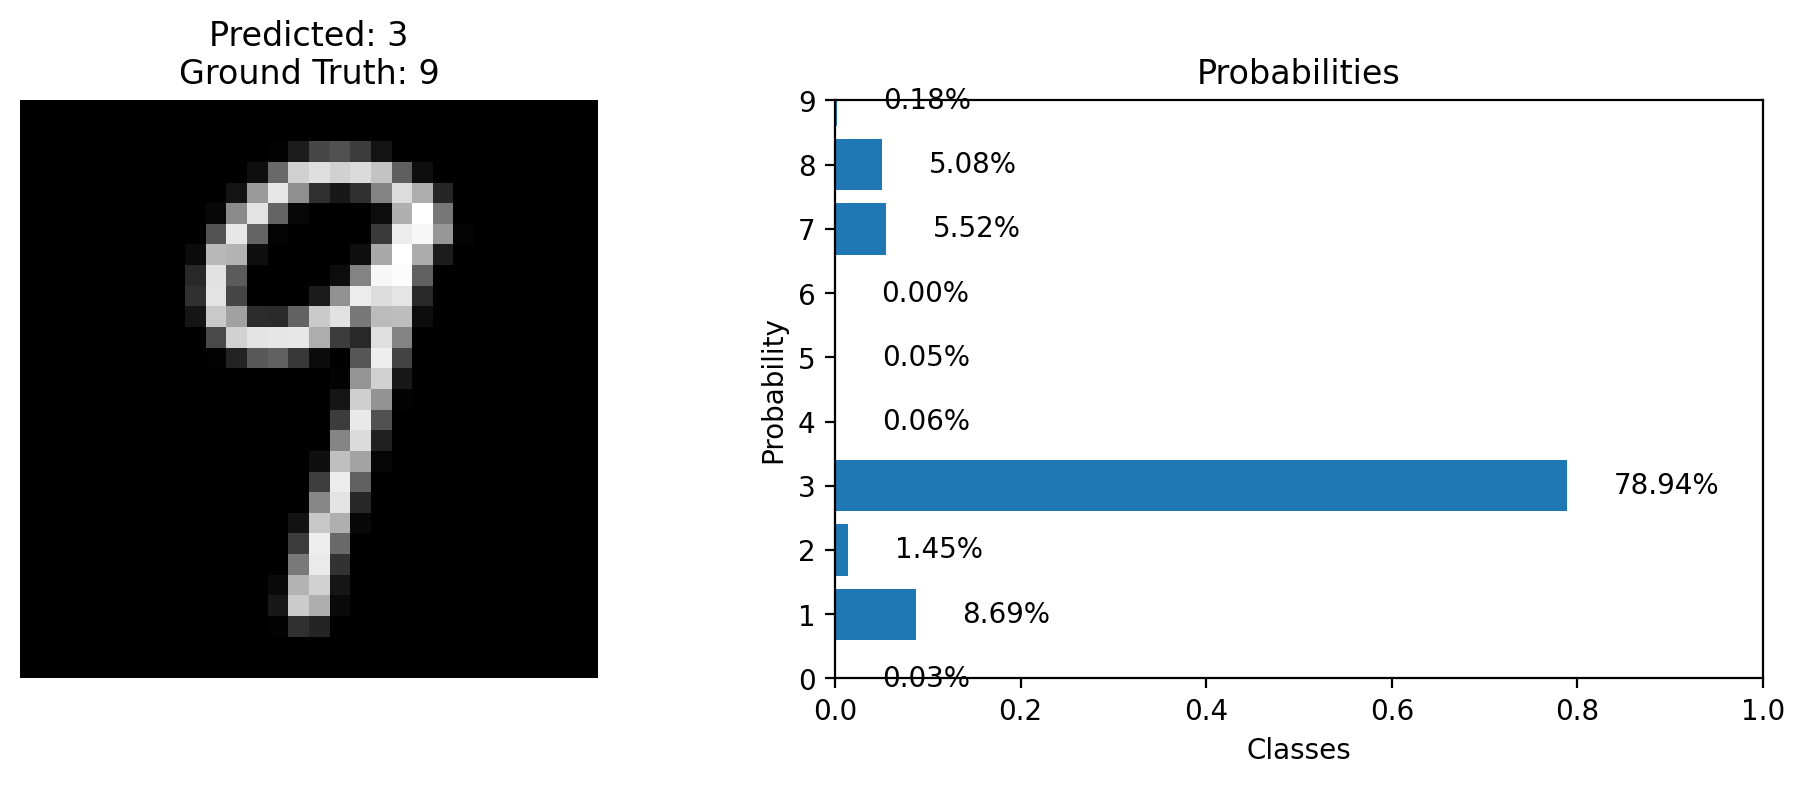

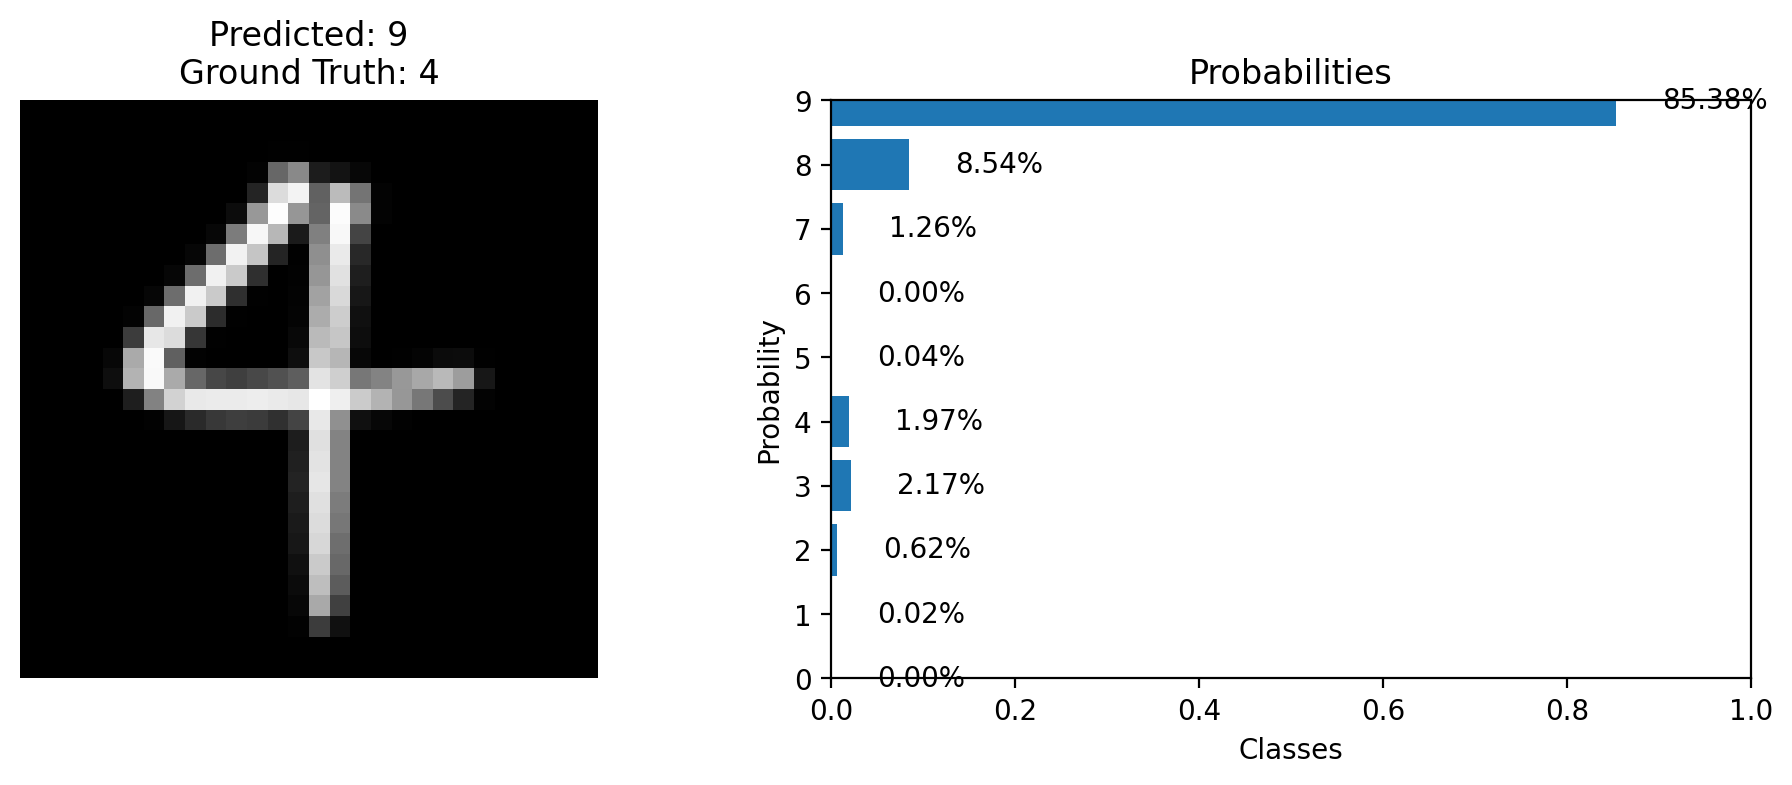

In [22]:
# 정답인 이미지들, 확률, 라벨 시각화
num_fail = len(fail_inputs)
ncols = 2
nrows = (num_fail + 1 ) // 2 

fail_labels = labels[~corrects]
classes = [0, 1, 2, 3, 4, 5, 6, 7, 8, 9]

# 정답으로 예측한 이미지에 대해 전체 클래스 확률 표시
for idx, (input, probs, pred, label) in enumerate(zip(fail_inputs, fail_probs, fail_preds, fail_labels)):
    plt.figure(figsize=(10, 4))

    # 각 input에 대한 예측값과 실제값, input 이미지 출력
    plt.subplot(1, 2, 1)
    plt.imshow(input, cmap="gray")
    plt.axis("off")
    plt.title(f"Predicted: {pred}\nGround Truth: {label}")

    # 각 class에 대한 확률값 출력
    plt.subplot(1, 2, 2)
    bars = plt.barh(classes, probs)
    plt.xlim(0, 1)
    plt.ylim(0, 9)
    plt.xlabel('Classes')
    plt.ylabel('Probability')
    plt.title("Probabilities")

    # bar 옆에 정확한 확률 값 출력
    for bar, prob in zip(bars, probs):
        plt.text(bar.get_width() + 0.05, (bar.get_y()+bar.get_height()/2), f'{(prob * 100.0):.2f}%', va='center', ha='left')

    # 그래프 출력
    plt.tight_layout()
    plt.show()